### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Learning over Actions

In [5]:
# Parameters for the environment and learning model 
n_players = 50  # Number of players
n_strategies = 2 # Number of strategies for each player
payoff_matrix = np.array([[32, 12], [50, 25]])  # Payoff matrix for strategies
delta = .95  # Discount factor
alpha = .1  # Learning rate
lamb = .1  # Temperature parameter for softmax in strategy selection

# Initialize players, strategies, values, and policies
players = np.arange(n_players)  # Array of player indices from 0 to n_players-1
strategies = np.arange(n_strategies)  # Array of strategy indices from 0 to n_strategies-1
values = np.ones((n_players, n_strategies)) * (1 / (1 - delta)) * (payoff_matrix.max() + payoff_matrix.min()) / 2  # Initial value estimates
policies = np.ones_like(values) * (1 / n_strategies)  # Uniform initial policies

# Main simulation
np.random.seed(123)  # Set seed for replicability
max_interaction = 10000  # Maximum number of interactions
results = np.zeros(max_interaction)  # Array to store results
interaction = 0  # Interaction counter
supergame = 0  # Supergame counter
while interaction < max_interaction:
    print("=" * 50)
    print("Supergame #", supergame)
    print("Values:", values)
    print("Policies:", policies)
    np.random.shuffle(players)  # Randomly shuffle the order of players before each supergame
    period = 0
    # Loop to simulate decision-making process under uncertainty
    while np.random.random() < delta:  # Continue with probability delta
#         print("-" * 25)
#         print("Period #", period)
#         print("Values:", values)
#         print("Policies:", policies)
        
        results[interaction] = policies[:, 0].mean()  # Record the average policy for strategy 0 (i.e., cooperation)
        
        # Pairwise interaction between players
        for n in range(int(n_players / 2)):
            # Define player pairs
            i = players[n]
            j = players[n + int(n_players / 2)]  
            
            a_i = np.random.choice(strategies, p=policies[i])  # Select strategy for player i based on their policy
            a_j = np.random.choice(strategies, p=policies[j])  # Select strategy for player j based on their policy
#             print("Chosen strategies:", a_i, a_j)
            
            p_i = payoff_matrix[a_i, a_j]  # Payoff for player i
            p_j = payoff_matrix[a_j, a_i]  # Payoff for player j
            
            # Update value using exponential recency-weighted average
            values[i, a_i] = (1 - alpha) * values[i, a_i] + alpha * (p_i + delta * values[i].max())
            values[j, a_j] = (1 - alpha) * values[j, a_j] + alpha * (p_j + delta * values[j].max())
            
            # Update policies using softmax transformation
            policies[i] = np.exp(lamb * values[i]) / np.exp(lamb * values[i]).sum()
            policies[j] = np.exp(lamb * values[j]) / np.exp(lamb * values[j]).sum()
        

        interaction += 1  # Increment interaction count
        period+=1
        if interaction >= max_interaction:
            break  # Stop if maximum number of interactions is reached
    supergame += 1  # Increment supergame count


Supergame # 0
Values: [[620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]
 [620. 620.]]
Policies: [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5

Supergame # 13
Values: [[607.80751493 621.6340947 ]
 [610.31149909 635.52402164]
 [602.71802596 616.0344887 ]
 [607.22346925 619.54181555]
 [614.19350899 626.38857532]
 [602.86384605 618.06075101]
 [601.4312677  611.9729507 ]
 [594.21690028 610.12898122]
 [615.74658531 634.89268756]
 [600.14267661 611.17506895]
 [605.39621534 616.13748766]
 [590.69561858 605.70338312]
 [602.16885959 609.94698956]
 [596.39621982 604.59822971]
 [602.53195901 614.02683007]
 [598.47443849 610.16010854]
 [613.15844517 621.14489293]
 [596.04118246 608.02324239]
 [616.33142243 626.22128663]
 [604.20372011 616.72843306]
 [591.63798496 602.43108979]
 [605.34835688 617.61121705]
 [606.06737008 618.91594381]
 [586.68009621 593.52963729]
 [601.7829962  612.82296197]
 [612.48398045 637.97213571]
 [592.74832546 598.86359073]
 [610.06889086 621.4468224 ]
 [608.98972932 623.58892194]
 [623.239594   638.19412563]
 [597.87743135 606.46122293]
 [609.70386861 624.70160855]
 [623.4017283  648.56716974]
 [607.59648798 616.3

Supergame # 20
Values: [[589.89963281 595.89423916]
 [610.99610274 623.35808793]
 [583.30108819 593.70909552]
 [600.50664068 612.46164372]
 [605.0506914  624.52897971]
 [596.20275531 607.65368137]
 [591.93531543 595.56353311]
 [596.85127811 630.20376802]
 [625.16182973 649.18157812]
 [591.88881384 602.7419431 ]
 [597.20964515 606.22682389]
 [586.80151509 598.39974488]
 [590.13757861 597.89493164]
 [573.0630295  585.97574912]
 [605.95346563 608.61991654]
 [578.32060816 588.38028489]
 [592.40810915 605.70610418]
 [593.97050064 607.47808581]
 [605.14692835 618.93758676]
 [604.81971338 625.97217443]
 [581.49452446 590.0775546 ]
 [598.97778589 609.74702769]
 [608.00808737 622.52117838]
 [581.80069679 609.60054034]
 [588.98108193 600.39031241]
 [621.18226531 634.12545552]
 [583.44609676 589.17342751]
 [597.76068182 616.62465417]
 [598.11242162 612.51308509]
 [607.32673376 619.66043166]
 [590.74177741 602.36921297]
 [588.46412206 598.87599347]
 [625.21976987 636.17582264]
 [601.77768676 613.9

Supergame # 33
Values: [[596.58794316 613.46066983]
 [596.85101577 608.38030279]
 [589.84237966 624.52365502]
 [591.72105363 598.90402165]
 [604.03206266 615.42522149]
 [590.54995115 598.87471049]
 [563.68361576 580.78869483]
 [601.9369952  627.324037  ]
 [617.804276   630.6741518 ]
 [584.58528113 599.77037162]
 [582.65425572 590.29819546]
 [575.43650551 586.75722562]
 [578.32131188 589.43829431]
 [581.2532594  593.99266677]
 [590.1352027  609.95480482]
 [558.87159186 569.86395477]
 [583.95547209 598.75025148]
 [580.48707068 590.58047973]
 [589.43260807 600.37523415]
 [592.71744748 602.93150786]
 [572.92456706 597.5924282 ]
 [585.21967505 609.65532237]
 [600.23992089 605.93104042]
 [594.73404597 616.14967481]
 [591.95275248 606.25678742]
 [604.21306362 628.12922896]
 [598.51604139 619.41589247]
 [586.90730701 598.28575134]
 [584.27394523 587.11295709]
 [579.14536604 586.66257757]
 [590.95853268 611.11498614]
 [588.36972653 618.80446039]
 [599.70352353 621.25405007]
 [594.27397715 607.7

Supergame # 37
Values: [[581.38936465 594.3854112 ]
 [585.81523387 599.82778635]
 [591.91904876 632.4149033 ]
 [554.8318098  564.38554343]
 [580.7898628  591.1501413 ]
 [588.22677977 600.68731061]
 [578.66179774 605.37493592]
 [611.40193169 623.5953442 ]
 [581.31327269 592.11584022]
 [588.45179907 599.94802114]
 [570.44578591 581.90539643]
 [567.61362865 585.02540598]
 [547.8025987  557.7235533 ]
 [580.56814587 618.59717317]
 [584.77310586 596.47562731]
 [541.90026369 550.07551407]
 [592.24800525 606.19780157]
 [594.85650557 612.78345952]
 [588.40968457 612.97934121]
 [553.95174273 560.89872066]
 [582.16067596 591.57950545]
 [595.79460124 604.20229583]
 [600.62028552 618.88108935]
 [583.23289472 598.1300592 ]
 [589.17181224 602.24818675]
 [614.86235661 625.47927117]
 [607.57969824 629.24010563]
 [595.7506192  612.36250717]
 [556.93134017 566.84803173]
 [584.18967701 614.89586906]
 [594.37822124 611.41215889]
 [599.9074668  625.23934675]
 [594.69999124 604.81972658]
 [583.97393021 595.4

Supergame # 45
Values: [[565.63755609 584.48798264]
 [574.47609602 587.91526782]
 [602.93474682 614.19804801]
 [563.82434029 600.70122139]
 [564.83616076 577.50311701]
 [574.12973462 585.44488895]
 [589.10213406 612.59699622]
 [585.13295763 592.3943248 ]
 [570.23461529 583.69926425]
 [580.60478237 602.79609906]
 [557.07696547 591.97293619]
 [575.44921072 590.12433836]
 [553.36670341 584.29306974]
 [584.30497971 615.33893849]
 [574.56877811 588.38488729]
 [548.84530231 574.2951812 ]
 [581.89968616 595.27799456]
 [592.61476579 610.27513088]
 [603.49684037 625.78887462]
 [556.12965795 567.97600128]
 [586.84336826 614.6565579 ]
 [578.64427264 590.8102548 ]
 [577.94224514 584.89388814]
 [578.16747499 589.76912389]
 [579.02792511 589.33957491]
 [603.54429474 617.70675489]
 [609.29932274 623.51609749]
 [592.90103221 603.12271524]
 [557.0048817  572.00528528]
 [598.68716235 619.1567648 ]
 [590.48600008 601.1532399 ]
 [589.26802465 599.9555492 ]
 [562.56097344 573.87098846]
 [577.3861506  590.5

Supergame # 49
Values: [[568.69409696 588.97715182]
 [571.40248656 589.17761448]
 [615.27322544 637.71901314]
 [563.82434029 613.57352964]
 [553.96787348 566.58749842]
 [564.90459766 593.13752956]
 [592.5444382  617.202797  ]
 [562.53391455 574.12859621]
 [576.78042572 596.27581586]
 [584.00011879 599.13290624]
 [564.01117388 607.58022753]
 [567.76243633 580.10533107]
 [560.55235616 569.12178073]
 [588.01817921 600.29642022]
 [555.93718097 564.38089164]
 [559.60152668 597.18010267]
 [567.6708051  577.8921313 ]
 [586.10098748 595.68694742]
 [613.06528903 629.08972249]
 [542.90315233 552.1392227 ]
 [584.6843926  589.83839968]
 [573.04414978 593.31449566]
 [574.84610955 598.12893433]
 [566.68269114 586.04854467]
 [573.42107065 590.09585606]
 [593.30152496 599.75585175]
 [601.33588229 610.0195062 ]
 [599.6141712  630.89525183]
 [568.62133497 582.79253656]
 [598.81267698 609.19585136]
 [574.40733722 582.92439436]
 [572.30500265 585.13819102]
 [560.8662378  573.09431748]
 [574.74143901 591.8

Supergame # 60
Values: [[576.2313118  628.4857493 ]
 [574.03441714 586.87401129]
 [601.7013538  610.77218677]
 [566.84475142 611.53772923]
 [565.19498398 585.95895898]
 [575.34943085 587.68290895]
 [589.876768   601.94306907]
 [560.02504413 571.90892736]
 [579.86097238 600.17296875]
 [596.97390395 627.36151186]
 [566.94559236 599.34954224]
 [564.88646423 579.61851932]
 [562.45766685 586.85391293]
 [580.1810204  589.16306522]
 [548.80431087 561.84961799]
 [561.24361454 617.18497491]
 [579.36898694 604.18038321]
 [560.3005197  570.78604726]
 [602.19312788 616.59259781]
 [558.00143921 580.1988521 ]
 [579.68113823 595.70214697]
 [570.94492006 582.96877986]
 [562.37961828 566.9989511 ]
 [582.56965907 598.44830961]
 [559.07469431 568.25222214]
 [591.47046326 599.17878676]
 [579.58328454 591.15487675]
 [601.32635332 619.18798177]
 [568.59098146 583.97087434]
 [593.30983664 601.65397244]
 [579.08259521 599.22330502]
 [573.16946473 584.45714154]
 [555.71783014 571.46852585]
 [579.69345646 594.3

Supergame # 69
Values: [[587.52865567 613.62916347]
 [587.55602607 627.88647013]
 [589.86469146 604.35423137]
 [582.86972103 598.01052814]
 [550.53594106 558.82644009]
 [550.43540507 561.19165018]
 [572.24933686 580.92720176]
 [558.57839991 582.07563992]
 [591.73690374 617.31408596]
 [598.30547729 631.39872869]
 [563.97846169 579.36110653]
 [567.12091615 579.98772877]
 [574.97216258 596.9273596 ]
 [576.47289401 587.42174582]
 [536.49046942 548.64503574]
 [569.83429568 618.46181789]
 [584.79474936 601.38511753]
 [556.46698366 582.84970502]
 [581.9147409  589.52798756]
 [564.60732351 583.33069211]
 [576.93271241 593.37367585]
 [559.38970199 573.85664604]
 [554.08648749 564.49915738]
 [575.57541949 593.68038951]
 [552.31145758 595.61637787]
 [569.19914381 580.34348083]
 [582.3449144  597.3415916 ]
 [581.3716477  590.41758106]
 [573.98262128 602.13510826]
 [565.60116323 577.00551979]
 [574.99494169 581.73794306]
 [576.17817719 598.23900731]
 [568.01433407 599.57333905]
 [559.4423318  569.9

Supergame # 76
Values: [[578.90510995 590.10167709]
 [599.16207018 614.02836403]
 [584.34768578 598.09342448]
 [584.82244961 610.03801367]
 [551.58970121 571.068668  ]
 [552.19645533 564.87687177]
 [565.96109221 580.23022044]
 [566.58787286 580.9140254 ]
 [582.55795871 591.58259406]
 [602.6910505  615.84772403]
 [567.89786613 587.16745008]
 [554.48178295 564.74930039]
 [575.64942602 581.01084765]
 [562.01443274 581.32119749]
 [543.23573575 562.69273976]
 [578.65850017 612.65619552]
 [591.57391681 610.38256027]
 [566.50578294 585.58961611]
 [568.52764282 580.64895322]
 [567.0711075  589.53398055]
 [571.07092015 579.92470427]
 [553.76822746 564.63162741]
 [550.07904776 570.67180633]
 [571.89508046 591.24854877]
 [560.71191822 618.69688117]
 [567.70126753 583.59208837]
 [574.82617217 586.07988283]
 [582.56699528 602.32603717]
 [586.04017232 601.36423865]
 [554.85190487 570.73331045]
 [561.71363832 575.43366775]
 [576.92244503 584.898131  ]
 [583.32776718 604.85780883]
 [553.68481119 582.6

Supergame # 89
Values: [[578.39853181 588.30269128]
 [581.42373868 596.59668029]
 [562.76294362 579.1695145 ]
 [586.52533653 600.84410513]
 [553.60596211 618.33652947]
 [562.91592441 585.21040673]
 [569.01750878 580.67912108]
 [567.81403076 585.00669496]
 [569.66604718 581.5014543 ]
 [590.83702646 599.99355264]
 [578.79770531 599.13188419]
 [548.1149166  561.22130521]
 [589.17142761 604.99155753]
 [569.11173304 623.78300535]
 [556.46716546 590.42385561]
 [571.34616573 579.13149577]
 [584.87343668 603.57447876]
 [566.31072592 586.25939789]
 [553.90527013 565.82526931]
 [559.15936738 580.61461214]
 [573.73290463 595.09584863]
 [559.90614546 577.34158876]
 [547.9263555  558.00411658]
 [582.47595218 599.31658978]
 [565.80741675 618.51098585]
 [572.82171121 603.45580841]
 [550.57852732 561.25983271]
 [588.4093762  622.33416815]
 [584.56840382 602.6725917 ]
 [550.21956027 564.38023264]
 [572.54849294 594.23376874]
 [567.61095076 590.24717566]
 [574.2259829  584.55353   ]
 [569.77736082 599.1

Supergame # 98
Values: [[569.16878154 579.97758893]
 [586.76070216 599.30107991]
 [546.2317914  562.85674153]
 [569.39396157 580.16806426]
 [553.60596211 607.5793442 ]
 [558.40218345 568.54953186]
 [574.1574084  591.44211594]
 [558.93285716 577.88084446]
 [564.63230283 585.6395741 ]
 [569.48748202 577.93470576]
 [582.32699627 593.08779774]
 [542.61989788 563.6625281 ]
 [593.64366239 608.50710061]
 [580.11259336 601.22560272]
 [557.18260451 573.36559576]
 [561.78566042 577.48128412]
 [588.8748841  599.10995802]
 [563.51470564 573.92437615]
 [548.1409546  562.67798728]
 [557.50984509 573.2962463 ]
 [581.7153221  591.50703588]
 [564.22399171 576.66463992]
 [550.44843865 578.77037204]
 [590.80872904 597.44756163]
 [568.86926576 614.22289149]
 [576.3387521  591.92443635]
 [550.50518317 563.38658632]
 [595.65143696 606.25998253]
 [592.47305703 614.71804953]
 [540.00392017 547.30905955]
 [576.69596193 593.31172725]
 [572.15567102 597.35085471]
 [576.50259175 586.9725335 ]
 [581.54133308 595.1

Supergame # 107
Values: [[556.2034504  567.6181528 ]
 [556.35131138 564.08013126]
 [552.73026356 597.67227278]
 [565.47518506 587.41371705]
 [559.7887991  578.95998458]
 [560.98111715 575.10081206]
 [588.04099945 628.21855446]
 [570.14358589 590.15605373]
 [583.19139091 609.76750979]
 [566.39133582 583.64067049]
 [585.98518954 605.92126218]
 [567.37127116 592.7520525 ]
 [579.41403485 593.84170419]
 [571.9068924  582.88692802]
 [576.4026417  591.03808086]
 [559.95410301 578.27217664]
 [578.29955892 586.13132371]
 [552.44133998 562.60956887]
 [562.07602832 598.48700744]
 [552.72654913 572.89420384]
 [572.24712594 580.72441225]
 [572.87235765 591.4411275 ]
 [567.18993648 598.1265847 ]
 [564.60991224 579.00207589]
 [572.2714704  584.05101073]
 [575.13264613 581.48417727]
 [549.19485619 557.62989603]
 [568.02163309 578.09511001]
 [576.57040459 589.55999376]
 [553.61076791 583.48119118]
 [572.27040614 587.35778876]
 [559.03084621 566.15563101]
 [560.76894016 570.60198212]
 [569.63508334 587.

Supergame # 113
Values: [[554.73712413 569.214105  ]
 [553.49439788 565.47028477]
 [561.26994284 581.40528703]
 [573.09216961 589.37482667]
 [552.68276813 565.6775242 ]
 [558.44646081 567.39520455]
 [597.95805172 614.38330158]
 [571.70684037 579.99562984]
 [583.21576307 599.87124301]
 [557.9733348  572.25997744]
 [579.59149865 588.78005185]
 [572.85437359 589.812889  ]
 [576.06228364 595.740048  ]
 [571.92452878 586.48437013]
 [579.47612153 592.03430183]
 [567.84064733 590.93939358]
 [576.04765572 602.22513007]
 [556.76140264 567.67892423]
 [583.87706285 606.04280182]
 [558.13919951 586.05410546]
 [565.42015729 586.84335676]
 [569.6928568  578.87484125]
 [567.18993648 604.41718279]
 [575.66292743 591.22832062]
 [564.76823767 594.87906885]
 [562.94684264 576.07139346]
 [549.902638   564.52982742]
 [563.25164089 573.70029164]
 [578.68874891 607.60734379]
 [564.24632738 581.44258443]
 [563.96072814 576.22218054]
 [556.70179288 571.39734972]
 [553.93868182 569.58031448]
 [565.59441508 570.

Supergame # 119
Values: [[562.4635025  584.48958614]
 [536.32320757 545.7636506 ]
 [560.6134028  571.88772938]
 [575.72913736 589.2860662 ]
 [550.52397683 562.99189129]
 [566.82702457 581.81917979]
 [569.46313195 575.47288966]
 [579.05305624 600.00649566]
 [586.23924123 593.77620046]
 [577.68050676 599.84949736]
 [559.13386146 572.73242253]
 [575.8658364  626.40418134]
 [584.64554154 592.81161883]
 [539.87290918 547.86974949]
 [564.74269548 576.18128648]
 [571.46112009 583.7198216 ]
 [581.56260383 593.95424676]
 [571.03807068 605.58132132]
 [555.3871109  564.90745527]
 [558.61208914 568.28464222]
 [580.29735882 603.4464972 ]
 [570.21093176 590.3837051 ]
 [580.79265084 616.13730701]
 [556.62228817 564.6648363 ]
 [567.7058091  620.25552526]
 [569.69808755 597.46407551]
 [559.68496395 585.96501911]
 [576.23173658 593.14634676]
 [593.14362149 629.59661584]
 [571.02550641 586.01717824]
 [547.42678082 557.28744113]
 [566.69215475 592.13549015]
 [557.34572215 612.12156748]
 [548.56681935 561.

Supergame # 123
Values: [[574.50697086 608.27534651]
 [546.83153716 569.20774162]
 [547.28244036 561.30613771]
 [566.81654962 583.63166176]
 [551.64421306 572.73981533]
 [569.66388939 591.22398543]
 [543.97782651 555.70491939]
 [596.08571532 616.15817109]
 [586.60870563 599.72838277]
 [554.51742918 561.40563158]
 [552.0222019  567.20732142]
 [579.12387452 625.00256468]
 [572.49520374 585.57233354]
 [526.49599122 537.45475958]
 [541.34947333 551.57141688]
 [552.10111917 566.33063022]
 [562.73887607 570.86808264]
 [575.06379622 615.28147663]
 [562.01720656 590.69536257]
 [557.97154192 570.71531877]
 [565.76419814 581.37480451]
 [557.67160414 567.53503607]
 [584.67441272 614.62350154]
 [545.97713814 568.70267537]
 [570.60303165 610.95023576]
 [576.37567928 595.75950912]
 [572.01147752 602.83937603]
 [579.93043639 591.77245092]
 [592.66534581 600.58361427]
 [578.91354945 595.76252682]
 [542.65553707 555.74650067]
 [567.19064856 578.44668689]
 [564.37542281 620.54827332]
 [542.90316559 552.

Supergame # 130
Values: [[585.45976337 600.68071785]
 [566.09351604 579.34804488]
 [550.08172371 591.85385543]
 [578.14532447 617.81541706]
 [557.98574449 576.28884357]
 [573.95261995 611.51292794]
 [550.11426078 561.96824037]
 [596.70591713 605.71398183]
 [575.23442433 589.33194411]
 [548.86466711 556.81941597]
 [558.78393917 577.41478333]
 [587.59975549 616.76792352]
 [556.02129993 566.73154282]
 [527.60776002 537.47984067]
 [540.67938311 550.22872708]
 [560.86026409 591.69632045]
 [539.33932561 549.1670335 ]
 [581.75014403 595.89244784]
 [570.04900233 613.61411405]
 [548.13070255 558.49773145]
 [568.1227716  606.0354293 ]
 [556.77268494 579.93721063]
 [579.3540217  597.20757697]
 [547.66968711 560.21690855]
 [575.29466401 609.1678066 ]
 [575.74629203 583.32186407]
 [564.03937977 572.3545477 ]
 [558.74177929 567.87882118]
 [560.77026067 570.0491394 ]
 [577.70647916 589.43771717]
 [545.44816059 555.31407942]
 [571.37701704 586.41539597]
 [567.27483771 611.29939963]
 [544.31869966 556.

Supergame # 133
Values: [[564.29685101 575.84273497]
 [556.72722519 568.93125216]
 [554.91842307 598.46242489]
 [595.49719098 617.96251689]
 [582.10533084 597.20390277]
 [589.70203257 615.5875641 ]
 [544.80719049 551.81468166]
 [581.06613372 589.84884454]
 [563.49984025 570.17748128]
 [545.71204343 572.60345452]
 [562.79314685 609.37467488]
 [584.15768856 592.30237342]
 [560.79393602 617.9089746 ]
 [528.54178884 540.96508605]
 [543.8561635  556.98888537]
 [575.30869319 600.78369665]
 [546.39035074 570.5714809 ]
 [583.22253192 602.82379734]
 [570.04900233 627.15723775]
 [554.34057625 590.24715862]
 [572.57674598 600.92660729]
 [546.01439485 553.553158  ]
 [577.24038616 592.33919938]
 [540.70743944 548.37397813]
 [579.80941204 621.21311676]
 [546.89365722 556.8328365 ]
 [567.93605412 583.91025155]
 [548.35991417 564.1025676 ]
 [565.90626558 580.10915832]
 [549.67920058 558.56394487]
 [534.29828927 543.36847512]
 [551.54688508 562.09962482]
 [575.80224788 615.45891337]
 [547.89438972 563.

Supergame # 136
Values: [[547.2702308  554.93216631]
 [557.55573424 573.5313132 ]
 [558.53949987 569.9807335 ]
 [602.79653658 624.51263002]
 [586.93906175 604.50971739]
 [596.67896472 613.14101259]
 [532.20031322 545.39307151]
 [569.25605391 576.6486767 ]
 [550.79712285 559.69402522]
 [553.35103019 586.86150403]
 [565.63464289 612.80963861]
 [569.18658811 576.73974133]
 [564.72929926 624.24348942]
 [525.09935369 536.14981838]
 [545.53084354 557.97928544]
 [578.71491614 617.39111397]
 [548.54438326 556.650429  ]
 [589.95548362 613.83541446]
 [573.66366347 595.04030861]
 [559.97016074 596.167593  ]
 [567.96026577 575.10896305]
 [535.35943338 545.3871621 ]
 [570.387951   579.59298511]
 [542.47982451 567.76526405]
 [580.25277873 591.39994509]
 [535.09883004 543.9356796 ]
 [560.96862127 573.19384536]
 [562.51231815 584.72718043]
 [553.97631642 562.26050243]
 [545.8661075  568.34910251]
 [539.81107844 557.85500902]
 [542.79609602 553.11136039]
 [580.70493331 590.73428476]
 [554.85311743 586.

Supergame # 139
Values: [[530.38204776 539.69546031]
 [536.51579033 545.34988015]
 [538.86685906 550.50633344]
 [610.428284   620.59850216]
 [569.36069237 578.32609945]
 [574.81763642 592.89130983]
 [540.10147396 560.3496185 ]
 [573.09458065 586.30962644]
 [566.46879637 588.7138014 ]
 [557.80709299 610.14288426]
 [565.63464289 618.99541355]
 [555.6295329  577.2000451 ]
 [566.26459582 595.07839043]
 [533.59622864 587.28891339]
 [557.4517462  586.30250014]
 [578.98530884 601.72354747]
 [533.19503078 543.5983781 ]
 [591.82259608 600.0841307 ]
 [580.00234439 601.87683047]
 [569.97677673 610.72398025]
 [540.03937738 550.79026608]
 [534.83124002 557.49312017]
 [553.4182463  577.46443661]
 [556.87713944 568.32202529]
 [566.48293176 579.52400412]
 [527.01632057 552.17270055]
 [546.50018917 557.16364109]
 [555.81175643 569.39466277]
 [555.60091938 594.62359596]
 [558.56984712 572.43343201]
 [553.9672363  589.65365461]
 [536.3249851  547.15421046]
 [552.63313203 559.28199295]
 [554.85311743 622.

Supergame # 149
Values: [[527.54713453 543.83389081]
 [530.38341722 549.19781907]
 [544.24346977 555.33512282]
 [596.84232822 612.00436631]
 [566.76400399 583.54135175]
 [581.29464369 595.03746442]
 [543.59991527 594.83665704]
 [575.30510036 596.7495459 ]
 [558.21894948 572.86404125]
 [557.17395013 567.70956623]
 [570.12588517 584.82781923]
 [551.90442669 567.26161571]
 [566.44437108 583.40122698]
 [545.45670078 589.54626341]
 [576.4722167  587.86756986]
 [589.28937204 602.06376708]
 [536.05517373 566.51841118]
 [579.44252038 588.75624639]
 [572.70825429 582.45942538]
 [581.10263478 593.33240624]
 [551.45206624 573.85773481]
 [530.0950574  562.68376134]
 [555.18849882 564.65337221]
 [552.2202433  561.56332247]
 [573.22468385 591.07145569]
 [527.01632057 571.88778919]
 [550.23020001 562.81560707]
 [553.6531326  585.93820127]
 [555.60091938 602.08794265]
 [548.48324708 567.28654259]
 [557.87445902 585.21707047]
 [540.50237334 569.33661919]
 [539.80115592 552.11519029]
 [554.85311743 614.

Supergame # 158
Values: [[525.55611391 535.44799895]
 [533.4626241  553.20055076]
 [537.24259851 564.12040103]
 [578.5515735  586.11253352]
 [579.50527703 595.96171488]
 [564.33587528 582.35671217]
 [543.59991527 616.73965017]
 [577.0390066  587.27805225]
 [549.54050623 562.87422306]
 [555.45990591 568.56568041]
 [550.25559852 560.02938104]
 [552.50082264 559.63957618]
 [578.8156314  596.15659925]
 [554.65019229 592.71212971]
 [573.71331656 587.74656075]
 [580.8688155  592.62737125]
 [540.82265609 582.52059773]
 [585.22896367 592.23548205]
 [574.94663225 596.70698386]
 [571.53502992 584.19987575]
 [550.00519213 562.23870866]
 [534.09229002 573.43555497]
 [564.91452748 597.15768552]
 [551.39250422 568.49589201]
 [569.04932775 584.33497201]
 [530.15222217 575.19624667]
 [548.77292807 568.93073735]
 [561.47494614 580.8773935 ]
 [555.60091938 588.94088729]
 [545.16603389 555.68430254]
 [570.21327394 596.45091051]
 [550.79020147 593.2214406 ]
 [543.98093196 559.37034984]
 [554.85311743 606.

Supergame # 167
Values: [[538.93934853 561.20561628]
 [537.2465724  567.61165028]
 [545.98233302 565.55566716]
 [572.29549192 594.77701567]
 [587.6000653  604.4064504 ]
 [559.39016708 571.84555143]
 [547.90446348 599.16466052]
 [561.73845812 571.54089187]
 [546.9732234  562.10428048]
 [554.58020606 564.88641556]
 [541.44587126 560.75715422]
 [551.48713398 567.68913277]
 [568.31330973 574.21839624]
 [559.00303487 586.19020337]
 [565.77839048 572.91387616]
 [570.33301384 582.07419112]
 [550.27018473 596.87674001]
 [564.28332274 575.96734747]
 [575.1097777  585.64761184]
 [572.20655777 595.71324182]
 [545.20162667 556.41063608]
 [547.09791522 598.80550345]
 [569.46002137 609.37391809]
 [563.29386243 590.44605457]
 [568.03895317 587.8025929 ]
 [530.15222217 588.63839227]
 [556.77653139 570.94585105]
 [564.9767632  574.2102207 ]
 [550.23077369 562.04886971]
 [551.90297804 572.90598653]
 [573.3063205  586.87169044]
 [564.4500004  584.14768362]
 [546.10978882 560.99878455]
 [559.19453775 580.

Supergame # 172
Values: [[557.91060587 576.35159397]
 [547.46522785 572.35205682]
 [559.96264045 594.8176716 ]
 [582.6015696  606.94259206]
 [578.04734401 589.02650316]
 [545.77941145 556.1188222 ]
 [557.55886445 576.38626747]
 [537.49588939 545.44241704]
 [551.14300837 604.0742231 ]
 [562.76079172 571.14829131]
 [549.17263894 580.01387943]
 [550.18484615 567.59348731]
 [565.63395582 594.91616934]
 [561.93143228 570.21461457]
 [544.41404814 551.94974306]
 [556.54968851 568.83210423]
 [550.27018473 595.79603449]
 [564.96737717 585.28445895]
 [556.44570966 559.93077645]
 [569.68440933 578.75631902]
 [541.87998317 551.91324815]
 [547.09791522 597.39398245]
 [572.76389472 587.28450438]
 [553.06230204 565.96483092]
 [571.52073793 590.76888268]
 [533.97309178 581.54714588]
 [560.63902295 576.84509999]
 [554.60333621 569.74634634]
 [540.01349314 554.18979229]
 [557.49871037 583.07618365]
 [561.75562361 593.56855351]
 [563.85460991 573.39995722]
 [537.76542349 561.77713135]
 [571.16312854 611.

Supergame # 180
Values: [[551.84323684 563.15950055]
 [553.39810394 591.06934811]
 [563.26570233 604.91679968]
 [568.12467561 588.38473545]
 [558.68581505 572.3275901 ]
 [543.44755477 557.83161435]
 [562.41033949 594.18213008]
 [538.79779387 560.73741353]
 [551.14300837 621.68001006]
 [546.39913835 555.12007176]
 [556.56322523 595.25384699]
 [554.37075473 584.83521945]
 [567.05576685 577.82444565]
 [546.31889817 556.85821367]
 [530.23260933 540.33845772]
 [551.8509788  564.43963059]
 [550.27018473 613.01915076]
 [558.80034516 568.35619233]
 [549.26894936 562.35849356]
 [557.77011683 565.90911324]
 [534.17953007 551.42135231]
 [547.09791522 592.47915359]
 [564.19502018 572.81089872]
 [552.07427132 563.77272318]
 [559.34152954 572.25482946]
 [550.89393056 570.5751229 ]
 [567.08545301 597.73160984]
 [551.96362572 584.26559147]
 [558.00804092 580.34927997]
 [564.04430657 588.02925826]
 [569.21940593 604.03934362]
 [553.65423286 566.38039004]
 [542.45143499 560.36199719]
 [588.31535134 602.

Supergame # 187
Values: [[533.5700266  542.65903876]
 [570.65550476 592.82244423]
 [570.31930289 611.68140568]
 [558.71608985 576.35478091]
 [560.92378427 588.0305815 ]
 [550.23821002 586.20422537]
 [578.52033129 601.60372405]
 [539.30194999 579.08826054]
 [551.14300837 587.4305089 ]
 [553.63161713 571.13997978]
 [558.42478987 595.00796712]
 [554.37075473 589.40906998]
 [545.73273655 558.48975853]
 [538.0006634  553.98580744]
 [520.10938829 531.23980459]
 [544.92732707 550.71368057]
 [550.27018473 612.29064528]
 [539.82465682 554.96538528]
 [553.82819001 571.56826939]
 [538.50227551 555.42446563]
 [530.24438475 541.71946509]
 [547.09791522 613.00134073]
 [557.68024494 568.04843576]
 [536.77507704 550.41323671]
 [561.87218381 594.13247617]
 [546.51479772 563.52569865]
 [577.3341522  591.83342302]
 [565.54078275 588.35234573]
 [562.20013221 596.72849469]
 [558.38954925 574.99512569]
 [569.21940593 622.97475059]
 [550.93198565 566.91268473]
 [551.51161634 561.05464024]
 [587.41286431 596.

Supergame # 193
Values: [[534.03931614 550.79144251]
 [571.40941843 584.49782473]
 [574.8274268  585.32594981]
 [555.72117218 566.86978211]
 [572.43466098 593.41289551]
 [559.51481717 580.27233019]
 [570.85360247 579.36864883]
 [544.35711587 590.93685836]
 [552.51402231 600.89814002]
 [559.80151682 590.6049822 ]
 [563.50905404 583.24908747]
 [558.38329084 599.93534774]
 [537.85756548 549.18590835]
 [540.58989916 557.92831143]
 [522.78733327 541.8577773 ]
 [554.09326011 570.84639982]
 [550.27018473 603.41316584]
 [547.86383656 563.4369413 ]
 [557.02072157 573.80947045]
 [541.61243669 557.5910206 ]
 [528.42291311 546.45268564]
 [547.09791522 600.03241831]
 [552.87863914 565.69130701]
 [534.61122695 544.73214188]
 [561.87218381 601.33165345]
 [559.14628418 580.9000714 ]
 [556.46654268 571.37346925]
 [573.25462586 588.56586996]
 [567.45896656 587.12112087]
 [566.63661639 588.21668504]
 [571.12034272 607.21490059]
 [549.55760529 564.14542799]
 [551.30148914 567.26588077]
 [569.70467051 579.

Supergame # 204
Values: [[538.82023517 555.82019313]
 [561.96234481 581.27822669]
 [574.87002641 582.84839291]
 [559.50871436 567.74618622]
 [556.85213408 561.04188224]
 [566.56484272 590.67144188]
 [576.51999832 593.68271024]
 [553.16773343 586.3302092 ]
 [552.51402231 616.61000057]
 [559.80151682 621.21938278]
 [575.37503906 613.38236126]
 [561.10733978 599.18074154]
 [535.59043453 556.06493895]
 [557.86204088 573.57461559]
 [530.55698468 574.56833549]
 [557.03287654 570.60398639]
 [556.85544625 576.73601485]
 [554.41991047 582.13148146]
 [539.65032313 551.4713154 ]
 [552.38993054 571.78185461]
 [531.44025331 555.31814638]
 [558.89191648 600.37989384]
 [551.60907009 563.17636132]
 [538.34018594 567.66014488]
 [565.68311765 594.80659616]
 [568.52480619 591.00266994]
 [570.79595635 592.3066133 ]
 [555.48193126 564.7471983 ]
 [557.65645608 566.76843052]
 [560.50919276 575.21262085]
 [580.49331221 600.78436489]
 [538.16472594 546.73110186]
 [546.88380241 559.31019307]
 [556.1878376  578.

Supergame # 214
Values: [[545.51486325 554.75018269]
 [572.96405867 597.62745205]
 [555.90333338 566.24483148]
 [552.57307136 561.54569864]
 [541.31000451 553.27848306]
 [579.76397812 596.67546847]
 [553.83986794 568.94715556]
 [561.81175142 594.67064306]
 [557.1879836  616.71242446]
 [559.80151682 610.44067288]
 [581.92733281 597.63409115]
 [573.41878327 589.17044064]
 [527.82329328 538.59403828]
 [544.15101019 553.04915627]
 [530.55698468 604.54315766]
 [560.29840722 581.08333757]
 [554.19640262 561.6877158 ]
 [568.21933292 598.91900972]
 [525.89904326 537.90810548]
 [563.56175083 581.53812533]
 [545.58127788 580.43946297]
 [561.57893065 595.57894694]
 [542.03674564 555.48787474]
 [538.34018594 594.51764741]
 [583.74611771 613.39315433]
 [578.14464167 594.23170384]
 [556.97766029 566.05964493]
 [544.4885975  564.25772295]
 [544.46766816 556.42250697]
 [554.4249144  569.01631684]
 [587.03529272 600.86280975]
 [538.39646756 582.06268289]
 [545.70621296 566.44665436]
 [557.69990192 572.

Supergame # 219
Values: [[545.40628537 559.45658407]
 [583.21672801 606.94433824]
 [537.04649276 552.34667994]
 [547.54762353 558.13225212]
 [550.11250621 569.12095307]
 [577.31946501 594.68504535]
 [542.83711602 553.97781653]
 [564.77275042 586.16267667]
 [566.18397937 612.47878883]
 [559.80151682 628.80935515]
 [585.27297161 595.17057852]
 [565.75330238 578.90178965]
 [524.36562822 532.82969823]
 [526.6464993  537.0742987 ]
 [535.86857199 603.04082287]
 [563.90984039 574.17557998]
 [546.65932044 566.3826353 ]
 [570.95926147 587.09291664]
 [524.53400499 536.34697375]
 [559.7303659  579.50704175]
 [549.3084786  593.90867999]
 [564.4753154  570.53655533]
 [536.00765197 545.94084847]
 [543.43145522 578.06208268]
 [583.45511005 597.49158089]
 [561.72512599 576.56430518]
 [541.68621863 559.60463269]
 [551.74067482 577.76643892]
 [549.2902924  570.9047035 ]
 [537.81597516 548.62419747]
 [586.2867094  616.84964613]
 [538.39646756 592.64232904]
 [552.22539152 578.28370415]
 [564.98975026 599.

Supergame # 228
Values: [[549.07818088 564.80189896]
 [587.44829903 601.62549743]
 [545.35630748 579.79154506]
 [547.08666362 563.40628594]
 [553.78916489 597.92983943]
 [565.63053423 572.28657675]
 [548.25674734 564.75231226]
 [571.26494669 605.36184227]
 [566.18397937 623.73011714]
 [568.07117507 598.83783954]
 [583.6215101  610.42030735]
 [546.64229094 555.71197805]
 [520.50161498 539.58255336]
 [516.18948677 526.4767603 ]
 [535.86857199 619.82621074]
 [560.27488319 579.8796234 ]
 [541.9182895  552.03819434]
 [564.89766192 577.96895191]
 [528.25305071 560.28674717]
 [546.83478472 557.06252617]
 [571.28485909 599.95016772]
 [556.1852731  574.76952686]
 [537.79138526 547.78112438]
 [545.20851009 608.13390461]
 [566.42096499 577.38955416]
 [563.99128599 588.57701467]
 [543.27770057 556.8495828 ]
 [537.33142648 546.02752373]
 [555.62450398 570.42317722]
 [528.51214404 539.23579524]
 [583.26537496 589.92751719]
 [538.39646756 608.1066096 ]
 [566.49716058 598.1001529 ]
 [566.27259872 609.

Supergame # 234
Values: [[545.27416103 552.87374017]
 [578.74303734 599.66320364]
 [553.22365737 576.68832018]
 [538.6395328  547.3988878 ]
 [556.27043637 595.46121154]
 [545.56247301 555.01579207]
 [571.88027588 590.06475478]
 [578.29161163 590.63233908]
 [568.24591985 589.56114646]
 [576.65709824 602.92286823]
 [587.03828506 597.06770248]
 [537.70600441 560.61184328]
 [540.46457283 569.54128641]
 [510.44022524 521.61494404]
 [535.86857199 613.35632383]
 [569.21989039 582.7375377 ]
 [541.34537087 577.04155528]
 [568.68707711 584.46831248]
 [528.25305071 567.7788417 ]
 [550.9308493  564.66452343]
 [570.71196353 583.36774917]
 [548.44087544 558.66312669]
 [543.05423352 562.56495758]
 [552.84535103 594.74049144]
 [548.1919719  559.07381816]
 [572.89046634 592.44377934]
 [542.93197093 562.56309078]
 [533.03509395 552.43030412]
 [556.48515721 587.55677794]
 [532.35071231 557.51345282]
 [573.13007907 584.15354386]
 [538.39646756 616.64115245]
 [575.23518594 595.28246402]
 [571.16555268 580.

Supergame # 238
Values: [[547.10994145 566.74526213]
 [588.52909246 604.72833051]
 [565.67644967 575.86699865]
 [540.35347593 569.16018191]
 [557.5624692  568.87469449]
 [548.99112919 588.82087071]
 [555.30700726 565.58701905]
 [568.96132987 585.68989298]
 [553.82539428 564.82947282]
 [581.09250505 602.89109315]
 [573.44195487 587.03616555]
 [545.34096272 567.18308749]
 [562.3288826  584.48769758]
 [511.17250565 553.98830257]
 [535.86857199 616.16408207]
 [572.62118265 588.95439234]
 [547.21265071 563.0941736 ]
 [551.06645879 561.41082388]
 [534.70509838 603.29816754]
 [533.72842911 542.25324058]
 [574.40737067 592.5392955 ]
 [553.18759379 568.44515915]
 [555.06363086 581.95779739]
 [557.50944887 603.87913761]
 [551.47658963 569.22041081]
 [562.9776357  570.95179033]
 [547.41802284 576.21899209]
 [538.8014777  553.01602591]
 [562.91247154 600.25317143]
 [529.96197978 539.22274748]
 [562.27649708 578.35963496]
 [538.39646756 624.53716296]
 [569.84013629 579.97053174]
 [569.1571132  595.

Supergame # 248
Values: [[553.51829588 568.02407425]
 [580.87271584 591.08394847]
 [553.59411213 570.03485337]
 [563.71087735 589.06540809]
 [543.87670227 561.41750011]
 [556.74689473 568.8558671 ]
 [555.40748076 571.14723579]
 [565.51179034 585.20440579]
 [550.96847575 566.75185622]
 [584.87461535 600.94913825]
 [568.94101724 577.53201754]
 [550.82659573 568.85570274]
 [569.96149932 587.32276092]
 [511.17250565 574.77050021]
 [535.86857199 612.43719536]
 [554.55216728 564.72473679]
 [554.21765962 575.55116764]
 [554.43202736 565.77976827]
 [534.70509838 598.41812978]
 [541.25039417 580.39393599]
 [570.28919801 581.30769725]
 [552.7135457  563.70978568]
 [554.28352496 579.71392497]
 [560.26420256 603.15060856]
 [558.55347974 586.54829294]
 [553.26921816 563.55537304]
 [556.91913822 571.11071771]
 [540.69520842 567.37814453]
 [568.36659555 583.75797851]
 [535.00467683 554.69716548]
 [563.72370592 577.47644622]
 [538.39646756 597.28290456]
 [556.52203775 567.49495326]
 [569.41896048 583.

Supergame # 258
Values: [[566.68492179 583.54646319]
 [568.6619743  576.47599664]
 [544.46353899 563.50568532]
 [569.24786408 588.71832024]
 [555.37051662 567.35090022]
 [553.2100308  565.84800522]
 [561.49521904 580.7065623 ]
 [573.57904611 589.53801546]
 [566.60051833 582.39281911]
 [571.62228479 580.14034974]
 [559.91050876 572.93019416]
 [559.31407214 581.75184281]
 [564.84022948 574.98616226]
 [518.93450098 584.63859459]
 [535.86857199 617.40924679]
 [544.01535594 555.05587869]
 [559.56103609 573.44266605]
 [565.10795186 587.08789986]
 [534.70509838 608.8710927 ]
 [549.98181017 562.22337651]
 [563.80201727 581.39129655]
 [549.91415108 563.34409407]
 [560.65747024 582.76925162]
 [571.9470771  615.87194957]
 [562.63449939 574.78017892]
 [565.09021393 594.6073998 ]
 [551.79100635 564.83876135]
 [560.90923427 566.34932877]
 [581.16691051 599.30113897]
 [537.34361804 550.73313174]
 [560.14519858 575.43771986]
 [545.42855576 599.72300004]
 [546.4179031  555.52758656]
 [574.02546655 604.

Supergame # 267
Values: [[552.4440974  563.38801384]
 [560.27482609 580.11202492]
 [557.22176716 578.46179434]
 [572.55230388 584.25973307]
 [542.17792897 552.07149679]
 [547.92845046 563.31180908]
 [567.48187152 577.97382729]
 [581.15021884 597.15381071]
 [558.39745327 569.45804881]
 [566.94515575 579.60787882]
 [567.31863035 578.23864346]
 [566.00091288 585.90399539]
 [547.29488074 557.54830444]
 [518.93450098 611.75867138]
 [535.86857199 630.37564382]
 [532.93942405 543.82422407]
 [544.97939914 555.85146261]
 [573.43728001 591.94144653]
 [539.2576483  604.9865186 ]
 [559.24219388 576.04917791]
 [570.79687246 599.02941505]
 [536.434957   546.36288265]
 [571.22586017 596.84863872]
 [575.83360866 614.98808507]
 [571.00747511 583.32036085]
 [556.32593372 567.32464989]
 [533.82730926 541.85063163]
 [548.43739186 559.56487161]
 [585.60418274 607.91402307]
 [546.77720968 581.10448128]
 [564.41838165 578.76664783]
 [554.88620179 595.13700633]
 [545.21738568 578.33667761]
 [579.31019987 608.

Supergame # 276
Values: [[559.18451737 586.01903303]
 [554.2788985  568.16894689]
 [570.06776768 581.9385852 ]
 [564.54363677 575.49581587]
 [530.11683527 546.83084141]
 [546.95495244 557.61140805]
 [559.46664841 575.54511009]
 [565.77291726 575.85394935]
 [552.00425368 562.64977482]
 [559.81323358 585.78275736]
 [581.9975838  603.34017895]
 [574.84926906 582.9054236 ]
 [552.38357256 565.01268311]
 [518.93450098 601.29681055]
 [535.86857199 614.61115583]
 [539.87581418 562.2976902 ]
 [534.8797771  546.89802247]
 [566.01448668 575.29016059]
 [539.2576483  593.93469614]
 [569.2283121  597.47330762]
 [564.56793691 576.23665284]
 [544.32204905 560.79387182]
 [569.66669349 577.66493134]
 [586.06405309 593.77340885]
 [559.52064411 569.17657211]
 [552.00622756 564.00086221]
 [531.67134354 549.38761326]
 [542.87497537 557.92341071]
 [586.97917371 601.54383782]
 [563.82505724 593.77105272]
 [567.09708455 577.91232764]
 [562.1769222  596.99815955]
 [546.8549306  576.75697479]
 [578.67969759 603.

Supergame # 287
Values: [[560.9678137  573.49660542]
 [538.58815426 547.01094107]
 [558.04834127 568.71753332]
 [566.63179429 593.10547054]
 [540.38431837 598.85630952]
 [557.99779302 572.49651185]
 [567.58367194 589.02875432]
 [561.72795734 583.41271028]
 [540.25269473 552.163599  ]
 [571.51824594 605.83774371]
 [582.95829759 598.0200854 ]
 [571.1031836  585.3876963 ]
 [558.34725223 574.48690176]
 [518.93450098 601.50719686]
 [535.86857199 600.67941444]
 [543.72152829 558.53695298]
 [541.76802941 551.99864042]
 [539.46477876 546.45635445]
 [549.33483824 602.31253149]
 [582.31854225 615.80225087]
 [547.9841185  557.74876378]
 [529.61128435 536.91429925]
 [552.47505886 561.97947101]
 [581.68177527 600.03743585]
 [532.79311783 542.57797764]
 [541.35724282 555.23151905]
 [538.85737446 605.18998218]
 [558.84952179 593.96179829]
 [562.91711126 572.14318774]
 [573.4947657  626.51068539]
 [547.47126111 557.9444866 ]
 [563.92863626 619.45217878]
 [562.86764162 602.96838453]
 [554.24652208 563.

Supergame # 300
Values: [[562.01429731 575.93561964]
 [534.22830305 548.07308059]
 [556.41049541 574.36618393]
 [570.32768608 582.15184454]
 [548.51008698 573.52300049]
 [561.36912463 577.09279933]
 [573.79267044 602.84679474]
 [567.21403318 589.7106295 ]
 [538.33375848 550.72734748]
 [579.25229655 598.02959887]
 [563.55654417 580.54201367]
 [561.8327003  572.09716936]
 [557.71719601 577.38364032]
 [518.93450098 583.08913583]
 [535.86857199 600.78471356]
 [547.41319071 575.28254177]
 [544.76814133 588.37780875]
 [532.4987114  544.49362571]
 [549.33483824 601.13586773]
 [587.41844509 604.13375193]
 [548.55428511 571.1313321 ]
 [531.7727977  547.917731  ]
 [547.74659016 564.63364587]
 [588.07095593 597.90455152]
 [527.19222484 545.05204682]
 [545.84841267 557.11157838]
 [538.85737446 588.0781731 ]
 [565.32286213 580.42706974]
 [553.77370242 564.54988444]
 [585.47550893 632.37182858]
 [557.35210215 580.95571352]
 [567.37348741 607.0718506 ]
 [570.57459363 600.84686751]
 [545.28199419 559.

Supergame # 304
Values: [[543.22552692 553.08292278]
 [541.34470847 590.10240463]
 [561.43556093 582.97677146]
 [544.61072996 555.22814425]
 [550.50671002 613.16398506]
 [572.8310862  599.23943863]
 [578.67986158 603.57565481]
 [546.26873362 555.70465924]
 [530.65152536 539.90823117]
 [562.17617614 570.92043146]
 [572.92239889 602.15618692]
 [542.08059212 551.99861047]
 [539.20082495 548.50940458]
 [518.93450098 616.08508543]
 [535.86857199 608.02046817]
 [562.60225439 587.15225438]
 [556.63418308 618.67532957]
 [528.06493839 536.37467307]
 [557.27475096 620.3997434 ]
 [591.68075543 603.79645659]
 [555.97512049 588.47775165]
 [531.77889647 574.15922806]
 [557.78274342 580.17273057]
 [568.0025219  577.01882616]
 [534.29981146 546.80530903]
 [534.474791   544.34499913]
 [542.21847645 608.06135564]
 [573.26868092 587.44638429]
 [539.20843887 552.57718694]
 [585.47550893 626.0012888 ]
 [568.78357616 583.36527006]
 [579.20240008 593.48744053]
 [554.04264    562.5737616 ]
 [553.91859745 578.

Supergame # 308
Values: [[529.7871849  550.11487426]
 [541.34470847 592.11921536]
 [564.63320746 622.02327264]
 [543.58679533 570.64442211]
 [559.62041664 613.62932768]
 [563.06059349 574.26247608]
 [589.57691186 607.05714414]
 [541.00335222 554.14170272]
 [526.12639837 536.94457141]
 [553.17466698 567.06966827]
 [585.94228202 605.34976858]
 [546.58494384 573.9538688 ]
 [528.76919154 548.26414731]
 [518.93450098 601.35382688]
 [535.86857199 602.83837206]
 [574.10430899 594.52119856]
 [563.51087602 579.81593124]
 [526.18877285 551.59953974]
 [559.34563622 590.34524128]
 [570.78375789 578.48459787]
 [555.97512049 594.86336758]
 [531.77889647 606.01509885]
 [547.04380776 560.32628562]
 [555.18800592 566.40712078]
 [531.33463553 561.54656927]
 [543.925833   559.57264495]
 [542.21847645 594.97467486]
 [571.2508657  584.83095134]
 [525.72858178 540.162091  ]
 [596.9916335  605.26255387]
 [559.6774633  592.65344865]
 [572.84030483 583.52233224]
 [530.31877874 540.07796736]
 [567.7166152  600.

Supergame # 317
Values: [[538.1861055  555.09971781]
 [552.76608197 592.97583047]
 [570.85556114 581.75930085]
 [546.67207302 567.08565844]
 [559.62041664 602.1793993 ]
 [556.36173865 570.5884737 ]
 [583.39518472 611.36580323]
 [546.65914639 564.5791064 ]
 [524.21792095 571.09332827]
 [558.65426873 573.88960155]
 [551.64765921 561.79762846]
 [551.58019366 573.43526136]
 [547.80667246 573.88592188]
 [518.93450098 602.90904553]
 [535.86857199 593.54038745]
 [575.02418366 583.6427202 ]
 [563.24314151 569.8770482 ]
 [523.04107882 533.48024991]
 [571.89194691 627.27802352]
 [545.77502911 553.78153919]
 [554.51575724 593.94447863]
 [531.77889647 612.58313836]
 [556.73702759 569.92291339]
 [554.10217613 568.39760438]
 [549.70847712 588.22701318]
 [545.06088238 562.64622869]
 [559.17201348 589.14653985]
 [576.83462255 604.19408079]
 [527.80388521 538.41035977]
 [569.73807822 581.48351296]
 [573.38282175 597.76732137]
 [548.74072331 561.65311969]
 [540.23980237 555.08182757]
 [568.53696554 578.

Supergame # 328
Values: [[552.57588827 590.51237994]
 [563.99166544 583.34440872]
 [557.0411438  569.08805607]
 [548.44393505 559.8534826 ]
 [559.34744356 568.38724518]
 [563.66794056 582.07473889]
 [565.17701052 572.2338575 ]
 [546.48436681 564.6029781 ]
 [531.15766809 581.94386913]
 [562.32028512 594.10026519]
 [558.17028994 577.15047124]
 [562.29899063 575.18764316]
 [540.20216925 549.09594831]
 [518.93450098 623.20571632]
 [540.45490833 595.79822249]
 [568.19521885 581.23826622]
 [568.36381783 583.45911622]
 [528.49429612 574.56113943]
 [575.76798935 588.39329634]
 [549.01932994 579.53311841]
 [561.7904573  594.69934265]
 [531.77889647 614.48799229]
 [562.40326472 576.52962474]
 [551.21144598 563.34854551]
 [563.0983373  581.67860301]
 [550.50502463 563.86485399]
 [551.72886413 569.06823413]
 [564.74925773 578.18687344]
 [531.58167145 566.19586785]
 [574.53151291 591.48819026]
 [546.18074554 556.83735511]
 [553.43567549 564.04595256]
 [558.00074891 588.09704995]
 [555.19665336 563.

Supergame # 332
Values: [[555.38576907 608.18748381]
 [580.66380405 599.17571117]
 [551.88810068 573.82699307]
 [572.12742059 580.41698043]
 [552.18850995 560.17079724]
 [558.37955643 564.85115268]
 [551.40239636 562.58227477]
 [555.72813015 564.41213198]
 [536.02860174 566.53474567]
 [577.12488436 603.76607567]
 [543.09014626 554.49996777]
 [569.19420841 593.97893535]
 [526.98938718 534.77749416]
 [518.93450098 589.46202438]
 [540.45490833 615.31142395]
 [537.79586985 544.07339412]
 [578.77914325 596.13313515]
 [528.49429612 599.69242346]
 [562.29552278 573.39548321]
 [569.38048347 589.98448097]
 [566.7659714  581.60652871]
 [531.77889647 610.89700467]
 [546.25600319 554.60786627]
 [549.28194516 561.77380435]
 [582.69020733 610.84484891]
 [558.69957274 571.28693214]
 [559.91353664 573.98337712]
 [558.31265746 576.03159372]
 [540.93362355 576.89230569]
 [576.5608239  588.22524458]
 [532.08073663 543.54211347]
 [546.09959534 565.1923115 ]
 [571.82280603 594.38106884]
 [556.94926455 579.

Supergame # 341
Values: [[555.38576907 594.77072498]
 [562.21115591 571.81598499]
 [543.92985684 555.84516094]
 [562.43796382 577.27335993]
 [562.89231186 577.67354588]
 [549.10202595 585.2887459 ]
 [545.06912351 567.60909961]
 [550.38270176 575.70192189]
 [546.37312087 556.30764102]
 [578.26894697 595.71141586]
 [539.79940882 576.21119056]
 [568.22442011 575.92662124]
 [527.89273752 542.44257157]
 [518.93450098 583.80122636]
 [540.45490833 596.36282979]
 [536.77875855 552.06047431]
 [574.99120366 593.76487651]
 [528.49429612 574.93602477]
 [561.51150167 572.3755495 ]
 [564.26924194 579.33899732]
 [559.43094283 573.61623862]
 [531.77889647 570.2354786 ]
 [544.75406328 557.74228629]
 [563.88049799 584.70695348]
 [564.53501154 576.61454499]
 [563.30941022 591.4640563 ]
 [573.29218759 595.30985724]
 [556.33988363 571.8920079 ]
 [546.38269715 596.84648671]
 [557.46681144 575.22491834]
 [548.00155777 579.71794391]
 [539.49262043 562.70841778]
 [564.96044066 573.8442545 ]
 [560.19419391 572.

Supergame # 349
Values: [[562.41888752 579.76554411]
 [551.40945606 562.04601158]
 [544.20525794 561.02958843]
 [556.29296093 567.87070323]
 [561.2064078  575.49095555]
 [563.51186871 576.47742529]
 [538.97603548 554.05928358]
 [555.06788702 564.70543722]
 [552.22266102 584.5339927 ]
 [570.93159076 582.66074917]
 [549.00401272 570.2483336 ]
 [548.33772101 560.17727369]
 [538.77807466 561.72526493]
 [518.93450098 578.35625012]
 [545.04261394 591.09241538]
 [540.26778879 561.06254584]
 [566.3920647  575.9288018 ]
 [533.69597523 578.96651663]
 [556.35227109 566.87332613]
 [558.16265667 573.20753859]
 [563.66175888 585.35620082]
 [536.99789971 570.27105725]
 [544.35531215 557.17183847]
 [562.6182719  575.96291642]
 [575.18861851 598.19256343]
 [564.91633832 576.29949133]
 [582.79896026 595.76274193]
 [564.9613591  577.86790209]
 [546.38269715 569.91789164]
 [557.56614383 593.17759808]
 [550.82576532 585.08203799]
 [540.3303818  555.45591606]
 [554.29422785 567.92841078]
 [560.09083385 581.

Supergame # 353
Values: [[557.03988651 566.73410923]
 [540.9819059  560.8411233 ]
 [541.56590868 567.80926447]
 [559.43486747 582.30811468]
 [550.00458364 559.24141309]
 [564.66516185 578.05930901]
 [539.17582147 550.49589362]
 [542.57389859 549.49734052]
 [553.68133306 596.68118258]
 [574.3627559  589.40681068]
 [565.53143967 590.98477245]
 [551.24942754 591.64832698]
 [537.88369669 544.6713107 ]
 [518.93450098 578.93725786]
 [545.04261394 594.96846105]
 [539.73027712 558.89319724]
 [554.19358711 567.17059372]
 [533.69597523 589.79489643]
 [553.62895209 567.38527018]
 [553.30053227 564.24877023]
 [566.42086437 581.97605319]
 [540.96467308 575.97242867]
 [548.32144401 567.51484623]
 [548.82131223 558.1569817 ]
 [582.59756843 611.18296687]
 [568.61292992 577.21472498]
 [581.62324364 588.6902727 ]
 [565.78649159 577.24537139]
 [551.4628078  589.19316798]
 [560.71502995 581.93857627]
 [560.21823226 575.99830669]
 [542.0401624  577.64015248]
 [539.3508426  547.11252149]
 [565.97435557 583.

Supergame # 359
Values: [[542.84376885 552.81115859]
 [548.92899197 565.26345958]
 [544.22747672 590.41416011]
 [556.99338863 564.61741421]
 [544.20139638 553.61675328]
 [576.71353226 592.08275321]
 [534.16713959 558.1004371 ]
 [543.71005622 568.40552132]
 [550.23798686 558.2518075 ]
 [555.91725993 565.99777717]
 [563.29042222 577.16173912]
 [553.77220327 564.36416419]
 [544.82860804 567.82366493]
 [518.93450098 596.15532242]
 [547.67007494 605.61723816]
 [558.73602569 593.92348517]
 [549.27874238 563.78209233]
 [533.69597523 603.13615577]
 [562.09754589 578.81113409]
 [557.45244647 578.33888128]
 [547.36571542 555.86097306]
 [546.44541029 556.48452928]
 [562.88930587 589.62434036]
 [540.10726145 548.20604376]
 [564.97724355 576.11245207]
 [555.88265113 566.03958286]
 [575.67047031 599.50432421]
 [564.14808325 576.20190342]
 [551.4628078  626.55077304]
 [560.54840279 570.27172129]
 [567.19888151 586.40755052]
 [545.63836746 601.15285005]
 [527.27357631 539.02745538]
 [579.71978993 590.

Supergame # 365
Values: [[544.87615047 580.68765102]
 [541.3988297  549.78925385]
 [565.09595205 609.59685926]
 [541.66184828 551.47867896]
 [534.22215872 545.72936057]
 [560.51168702 569.74722903]
 [549.86809395 578.38066697]
 [537.9656796  545.8788731 ]
 [554.2030928  562.87927382]
 [568.87256967 601.08513828]
 [547.17748792 554.74695844]
 [551.14857008 561.66949268]
 [551.92963407 591.81975057]
 [518.93450098 607.17634488]
 [551.31047674 615.55247659]
 [554.8551555  565.46418869]
 [553.47236619 571.32056444]
 [533.69597523 614.33583347]
 [567.55616521 595.07338549]
 [543.89733693 553.55162935]
 [549.32654441 581.2431294 ]
 [529.05545606 538.3163915 ]
 [578.81227514 595.08297647]
 [535.18545307 544.21999951]
 [551.81404671 560.9193656 ]
 [535.38626616 545.06767887]
 [565.78321335 573.0241851 ]
 [564.94309756 578.09497341]
 [551.4628078  626.05691465]
 [552.71551025 567.89428521]
 [572.32401207 598.55449019]
 [545.63836746 611.26947451]
 [525.08290293 540.02386555]
 [566.86218045 574.

Supergame # 373
Values: [[544.87615047 589.70655034]
 [538.2078577  554.82435142]
 [573.66414925 586.75212886]
 [540.55196068 552.07066555]
 [529.48683685 538.82577836]
 [540.39073286 552.90743384]
 [561.51018474 587.05676817]
 [536.96276321 565.51963988]
 [557.17369953 569.38231467]
 [583.76656854 599.50645188]
 [536.28305107 548.35016527]
 [543.48279855 556.37772795]
 [555.37901721 583.4573828 ]
 [525.01825707 575.45791609]
 [551.31047674 606.58800774]
 [552.72472786 565.08913955]
 [559.33923271 572.06293173]
 [533.69597523 577.62331822]
 [565.21009701 576.65850565]
 [552.49815019 565.6113125 ]
 [555.31279506 587.97985523]
 [533.02452613 548.51998215]
 [564.49751412 574.12399417]
 [551.4203839  568.1882113 ]
 [548.52475576 562.57647147]
 [537.60435177 567.94719276]
 [558.36399142 570.28648723]
 [562.95622181 604.51357228]
 [551.4628078  613.33385286]
 [553.6837656  583.53487638]
 [564.4305274  579.82890024]
 [545.63836746 599.59182276]
 [526.98195233 538.7319786 ]
 [550.30557166 561.

Supergame # 380
Values: [[548.5251601  574.92993694]
 [547.67086835 572.24289392]
 [572.54153447 587.9046415 ]
 [533.91630376 547.81848795]
 [522.69349655 533.80576742]
 [543.70815992 564.07688663]
 [572.74740311 586.7250968 ]
 [544.322196   584.59583317]
 [548.932245   564.88771312]
 [573.09602897 587.23900532]
 [538.74257661 558.55060831]
 [534.69581096 550.53724757]
 [561.86465683 581.45956905]
 [527.74406037 565.87902373]
 [551.31047674 602.08688538]
 [558.68909551 577.08581204]
 [559.92514228 584.76872536]
 [538.50835554 575.43644571]
 [552.09523342 566.60839667]
 [547.49522701 557.55837023]
 [562.03639599 594.75631042]
 [544.27395068 578.28878247]
 [546.50742797 562.25513043]
 [555.86027999 579.68544194]
 [540.2277216  551.08787519]
 [537.60435177 577.98739034]
 [557.05297666 572.19366601]
 [561.7915182  571.42713194]
 [556.07642611 584.78616026]
 [559.88283659 588.27064949]
 [559.0683016  593.24761225]
 [545.63836746 590.7143132 ]
 [530.97374839 559.88229729]
 [534.1349824  543.

Supergame # 390
Values: [[548.29653927 559.83196778]
 [563.00010052 584.12184904]
 [582.43470074 592.32656419]
 [538.45359384 559.09690164]
 [536.83505207 590.67677812]
 [557.33146838 572.17354896]
 [553.6635404  574.83974844]
 [556.15047029 583.59457529]
 [547.37991337 562.07787608]
 [560.25504588 574.57359026]
 [554.83694832 576.68936884]
 [537.49906266 568.53132133]
 [548.38061275 560.05968294]
 [529.63213838 578.06198876]
 [553.09037083 599.88711479]
 [557.57708291 568.87188283]
 [562.04206415 575.6223214 ]
 [553.54046333 584.63457123]
 [563.4461013  574.11545236]
 [535.59215314 548.11281306]
 [567.55540837 593.82377832]
 [556.52182599 594.04923504]
 [543.90650423 579.22648589]
 [567.37670143 584.44399525]
 [551.88583911 570.39760244]
 [541.30000544 600.97626223]
 [556.59410395 569.08947368]
 [544.93919343 553.79693375]
 [580.56727744 605.00068961]
 [570.41688395 584.09057873]
 [560.18354443 572.91593353]
 [565.41749946 580.64005605]
 [534.42205299 574.7074429 ]
 [535.04693117 544.

Supergame # 401
Values: [[537.61930533 548.41029964]
 [574.38787557 585.04876676]
 [560.23670767 569.55260361]
 [545.84118564 561.41088274]
 [538.95509248 589.7969293 ]
 [547.85948307 555.57094116]
 [564.45290929 594.15854639]
 [556.14130397 567.88251464]
 [548.25777309 564.67157114]
 [538.50188022 574.1894966 ]
 [556.95732865 581.13622491]
 [532.89569448 546.1541827 ]
 [556.34745722 582.07999675]
 [529.63213838 602.90798692]
 [567.40310037 600.35811273]
 [556.65319423 580.93177401]
 [565.98236157 581.20433224]
 [559.22558562 577.90787946]
 [543.62975723 557.49488368]
 [540.37266907 586.53406509]
 [586.46691085 603.34929127]
 [553.46858127 560.73118884]
 [543.90650423 592.79572259]
 [580.71841752 590.23671877]
 [555.06952563 569.54972795]
 [541.30000544 585.44444294]
 [564.43395993 575.37313916]
 [531.32906736 543.21503615]
 [581.07414362 590.74215437]
 [558.51090094 570.38405756]
 [549.25467904 562.31190566]
 [557.42216962 579.84440297]
 [536.9246722  575.88000402]
 [522.56461988 533.

Supergame # 413
Values: [[543.05563146 552.43351299]
 [570.80896408 589.06304004]
 [548.26612175 557.93296484]
 [544.53646502 552.38746564]
 [541.3526039  599.17725708]
 [540.36223532 547.10063276]
 [571.31237105 605.3189672 ]
 [544.15790257 555.30471582]
 [565.90937278 584.80269408]
 [548.21076632 597.27422211]
 [546.33176552 553.55976312]
 [531.54548466 541.49217032]
 [547.14326971 561.64516799]
 [529.63213838 598.01802048]
 [574.32792891 584.18492778]
 [542.94074071 554.22012576]
 [569.56588585 583.42638773]
 [568.99567639 611.36415919]
 [549.27627772 580.58613339]
 [544.74979186 607.81850733]
 [575.54612682 589.99589295]
 [555.01963498 567.60475177]
 [543.90650423 613.89276612]
 [555.60184885 560.81843959]
 [539.7890112  550.05046277]
 [562.02482663 582.77545624]
 [553.66908649 577.70764072]
 [541.27589322 591.98545364]
 [571.22176534 583.79073041]
 [569.63231951 584.48137998]
 [560.64816465 583.81727404]
 [544.96364698 564.497184  ]
 [537.64498841 548.23465371]
 [531.98373432 563.

Supergame # 422
Values: [[548.38290576 561.06484392]
 [572.65492363 580.20416174]
 [544.30935713 562.44006204]
 [537.18028026 547.73446912]
 [541.3526039  600.40179418]
 [540.73731766 551.03679562]
 [558.08277187 570.16620891]
 [528.93431409 538.46123654]
 [579.5436445  603.75984959]
 [559.78824752 593.51759365]
 [543.07683424 567.66662065]
 [518.63915536 530.51328154]
 [549.59650235 574.33631772]
 [529.63213838 611.58423418]
 [558.81065877 576.21184017]
 [538.9045315  561.58462543]
 [557.88578968 573.2361907 ]
 [576.19723564 591.04552611]
 [552.00023085 567.47899159]
 [549.66780096 576.38307548]
 [575.52723734 584.71872992]
 [539.58768365 555.71245533]
 [543.90650423 610.90437341]
 [545.94415582 559.10448153]
 [532.19766861 545.14489   ]
 [570.92842815 585.4010292 ]
 [550.98564202 564.58420029]
 [541.27589322 588.70963684]
 [572.3859665  609.55893782]
 [554.01448885 566.33555873]
 [556.5829512  573.22175699]
 [542.81068068 556.79022807]
 [531.6366568  553.93712464]
 [539.43866059 596.

Supergame # 427
Values: [[533.87024892 543.68380289]
 [548.2144792  558.6220796 ]
 [550.11058946 592.43666413]
 [537.11809427 552.47573988]
 [541.3526039  590.88883611]
 [543.80250834 566.49440246]
 [545.09910565 553.13850886]
 [522.29894586 534.2714474 ]
 [579.04647701 584.26265379]
 [562.14243385 570.9199001 ]
 [559.07625056 590.77779642]
 [517.52381715 529.49736221]
 [551.8141672  607.42721332]
 [529.63213838 618.53698734]
 [559.73338575 582.99326179]
 [544.37236117 601.93139726]
 [546.28074807 557.98631484]
 [582.73071442 593.04942759]
 [552.97518546 560.49647243]
 [555.73164658 576.88215411]
 [569.41609452 585.03326997]
 [531.01859694 542.22859945]
 [550.65325954 584.35542317]
 [542.2887582  555.33273843]
 [538.56892851 566.38026082]
 [566.7669975  577.73115772]
 [550.48802062 566.61973693]
 [545.4146413  589.4382501 ]
 [576.81161002 596.95098988]
 [541.36284013 550.1013194 ]
 [558.85392536 576.97167227]
 [536.93532469 546.91939599]
 [528.84454306 539.76773368]
 [541.36325305 585.

Supergame # 444
Values: [[523.93076431 541.5960816 ]
 [535.13762816 544.926845  ]
 [555.59542471 567.78502349]
 [545.14604468 596.96392908]
 [545.87897177 580.39675672]
 [559.96176139 585.44832492]
 [543.09275586 555.60841263]
 [525.24042429 535.09482825]
 [575.4650892  586.14473813]
 [535.62256158 544.56778048]
 [573.83454145 593.80848311]
 [556.61457312 582.4862466 ]
 [559.82351766 576.16271505]
 [534.88439997 587.25761535]
 [563.10720434 589.26283338]
 [560.86022022 587.27281618]
 [530.1291745  543.55245968]
 [545.14255088 553.01092461]
 [534.52171368 573.81772412]
 [558.4380788  578.90062249]
 [552.38764477 562.97586765]
 [549.50310026 573.73465234]
 [582.7835516  607.82632139]
 [555.99757381 565.58436181]
 [558.94785947 574.44608325]
 [547.69585295 554.54829572]
 [555.52290986 613.10974711]
 [545.4146413  605.55981897]
 [557.17694278 569.48970478]
 [546.34734619 561.91742165]
 [539.99370819 553.0526483 ]
 [542.84835132 560.92229308]
 [537.80273689 569.24634885]
 [555.58683426 571.

Supergame # 453
Values: [[540.16387742 573.65992013]
 [538.46255232 571.16631572]
 [545.91961651 557.47060792]
 [548.15586058 598.22289642]
 [550.58269931 598.30785547]
 [559.76364777 570.70725956]
 [548.78054706 570.85614782]
 [533.49103497 555.98642039]
 [571.06249919 579.7794249 ]
 [532.58811826 561.45067458]
 [559.63887084 568.95657601]
 [564.47161403 583.85871002]
 [566.12940532 597.24040127]
 [543.98051772 597.60172819]
 [551.18508254 561.49937123]
 [551.16376935 560.63969839]
 [529.42880345 542.31625907]
 [544.87651275 558.61850967]
 [534.52171368 590.98640085]
 [555.80082979 564.71785515]
 [546.37153984 561.35046825]
 [552.4115837  570.85895729]
 [581.55780722 599.28251574]
 [535.80449199 545.17407451]
 [569.1461993  589.00489662]
 [546.22072578 570.16623641]
 [555.52290986 607.39649315]
 [547.85528507 589.08760155]
 [560.57719895 575.17465731]
 [553.01596771 566.28189374]
 [542.40484765 550.86855804]
 [557.89279218 569.16311364]
 [549.87000631 588.78187132]
 [559.71298961 580.

Supergame # 460
Values: [[544.97036901 562.74823357]
 [539.61600808 552.54221765]
 [541.40995244 556.2564605 ]
 [554.69377087 572.64748924]
 [561.59195302 582.26883089]
 [550.52272732 565.06609849]
 [553.5912991  587.11563281]
 [539.89303882 578.78140214]
 [550.57928512 568.55558873]
 [534.36910541 596.83583193]
 [553.49185023 565.31461898]
 [558.01364054 569.98760941]
 [572.39755814 604.46170124]
 [546.98853768 563.63116937]
 [541.27175744 555.14315284]
 [544.58173354 578.41207025]
 [541.6382588  557.0484036 ]
 [549.14489705 562.2222113 ]
 [540.59539199 588.95087952]
 [552.63188278 567.8421686 ]
 [551.63038733 583.39472241]
 [551.07721375 567.238437  ]
 [566.69562115 581.46383823]
 [539.95644959 555.41731145]
 [571.88483917 583.20645895]
 [558.37568815 573.48608463]
 [569.28667941 612.37265045]
 [550.32981718 589.80831727]
 [569.04109254 590.02016228]
 [543.76645751 558.86575202]
 [540.3667115  553.45832878]
 [550.67941495 560.66579342]
 [554.43389737 584.06286514]
 [566.10154438 585.

Supergame # 470
Values: [[543.13251472 552.82794382]
 [538.02150851 556.49599889]
 [549.85404273 588.48160508]
 [561.00795303 575.74367174]
 [568.72311106 585.90584703]
 [541.13492836 552.68812814]
 [563.63527874 573.55728644]
 [551.10904847 584.36220495]
 [549.401873   558.35083667]
 [534.36910541 583.87655507]
 [560.0647167  577.19542051]
 [565.32696469 599.68765246]
 [563.66368002 573.61756603]
 [550.63178229 561.29187315]
 [545.65123847 557.93130393]
 [557.29352814 569.59475022]
 [552.50029077 598.43764539]
 [552.929757   585.08856946]
 [552.5100738  574.10218752]
 [542.28140269 553.66047479]
 [557.75729467 572.08722607]
 [556.6803616  567.81664005]
 [555.69082145 566.43182581]
 [532.77972313 548.69536128]
 [572.96862652 581.72175264]
 [561.56975937 577.78117734]
 [578.46678141 610.20576176]
 [557.84740608 575.24752579]
 [571.19587124 587.65030435]
 [548.73593913 577.67431197]
 [544.56679655 565.51605388]
 [547.30800264 560.78071087]
 [561.66111982 578.11308606]
 [564.33372395 574.

Supergame # 474
Values: [[555.75981114 581.8299954 ]
 [541.60592556 560.54272871]
 [554.73436056 600.41020562]
 [553.70985322 563.73574435]
 [579.24052641 597.5587229 ]
 [547.36108742 559.02196033]
 [567.82554077 586.83567266]
 [553.01131098 595.19606874]
 [540.9017187  586.07904659]
 [536.69775191 585.14545757]
 [561.67156576 601.2744015 ]
 [569.45560087 617.05014868]
 [565.97298217 579.03238379]
 [544.20835564 555.0312335 ]
 [529.19957719 546.20205506]
 [559.3074259  596.9994108 ]
 [568.58788535 601.44036241]
 [559.4452888  577.68383713]
 [559.2640562  612.28784429]
 [547.86990176 583.11987691]
 [545.89747942 557.80538722]
 [543.53208649 561.23056444]
 [554.7501734  566.19698722]
 [546.47920906 561.67115725]
 [547.1544936  562.66926338]
 [559.09983731 579.7123058 ]
 [567.27933179 579.50676769]
 [559.31909154 569.86556725]
 [559.34120795 569.54325373]
 [558.47757296 583.46794653]
 [555.71038516 570.63634522]
 [552.76076357 596.50383295]
 [566.54431242 600.37243717]
 [564.00079312 577.

Supergame # 482
Values: [[565.89098572 597.48422692]
 [536.7010441  570.91962559]
 [554.73436056 613.04339873]
 [528.66379004 542.52478761]
 [570.48689698 602.73525538]
 [556.64748627 604.00525841]
 [564.77640552 582.99603124]
 [554.92304089 572.71126348]
 [546.4174794  591.46912619]
 [542.04042271 593.97686871]
 [564.45433318 597.40403064]
 [574.01228446 585.92749521]
 [543.66966291 555.54886661]
 [532.95328406 551.66085113]
 [536.11597276 547.86717443]
 [559.3074259  611.25091861]
 [567.00324279 580.44012778]
 [566.67417506 572.28939117]
 [576.35832952 612.70383753]
 [554.74123778 566.24222303]
 [545.14480391 555.05554826]
 [550.28385383 564.75637595]
 [553.52864725 562.65020471]
 [551.39595395 595.99407621]
 [551.3925489  569.70208303]
 [560.31097305 576.6180585 ]
 [546.34082862 553.9636932 ]
 [555.74729361 563.52818311]
 [549.59265898 583.46007618]
 [546.07077046 555.13759155]
 [567.92569315 587.17414097]
 [552.76076357 604.41251136]
 [558.19482022 571.31761393]
 [569.05463059 587.

Supergame # 486
Values: [[576.01185914 618.42900987]
 [546.32082795 601.33826665]
 [569.30492002 629.31820004]
 [542.05187622 567.46308451]
 [582.10634709 598.34918075]
 [556.64748627 624.70816884]
 [558.70139157 579.8814939 ]
 [548.91333384 561.95121343]
 [553.263666   607.05499588]
 [548.08849028 578.63232294]
 [567.62130606 579.45460386]
 [553.19127727 562.57483685]
 [539.2427738  576.36998397]
 [542.5402757  556.8429786 ]
 [528.45076507 537.59890709]
 [561.19026664 581.24023558]
 [546.27401704 558.68471384]
 [559.6877698  573.42781025]
 [578.44139924 627.4463973 ]
 [561.19346388 597.39910919]
 [556.26825151 590.44889139]
 [543.47804    552.38925835]
 [542.64229868 551.4623764 ]
 [557.75474892 606.20980286]
 [549.46867913 568.76900969]
 [555.63520591 571.53171302]
 [533.91425439 544.47293409]
 [530.37394367 539.81623008]
 [549.59265898 602.10894564]
 [543.09903713 554.86980993]
 [543.4641168  553.19852239]
 [552.76076357 617.83117585]
 [540.94058368 553.58151256]
 [551.78250293 561.

Supergame # 493
Values: [[574.6569234  584.74461086]
 [565.57418033 576.89264658]
 [579.45003394 615.56848585]
 [533.87267625 543.94275138]
 [577.69003019 600.75727504]
 [556.64748627 618.39423979]
 [525.50090416 534.66834548]
 [528.1924714  539.81814659]
 [553.263666   635.0465458 ]
 [562.09366736 610.78606271]
 [538.11899066 549.11352035]
 [548.60245847 575.44564761]
 [544.71236245 614.80225502]
 [540.76702276 552.64242141]
 [524.85363667 535.09549228]
 [540.24124547 554.55887273]
 [553.34407249 576.12973045]
 [550.67323823 566.16377986]
 [565.51001258 575.49847816]
 [564.8936717  619.59848079]
 [556.26825151 620.08304061]
 [550.00414855 564.25979119]
 [535.10700993 558.16825701]
 [557.75474892 615.54684993]
 [543.97659595 557.30882492]
 [550.74622234 570.17049486]
 [531.07362088 544.52221707]
 [533.54840087 548.04453635]
 [560.49839653 575.12797588]
 [545.23670763 564.93091742]
 [553.28165714 577.78462431]
 [558.99983094 570.11044718]
 [546.61012089 572.54002647]
 [546.91611701 558.

Supergame # 503
Values: [[556.5513761  568.1952021 ]
 [557.67846065 562.67246125]
 [580.76341302 592.63735605]
 [531.93323063 552.76159048]
 [576.08022318 585.17324828]
 [556.64748627 611.50270679]
 [520.86372938 533.77170698]
 [523.09808166 533.60615858]
 [553.263666   619.20315039]
 [566.04343919 604.13629902]
 [528.9545871  536.00422202]
 [557.61983644 565.58324375]
 [544.71236245 610.24145233]
 [534.28581174 545.08337749]
 [526.61890786 556.68699899]
 [543.35625413 559.16860017]
 [557.98645996 576.61888634]
 [559.86936362 577.83080383]
 [560.92509903 582.86884753]
 [564.8936717  607.60617129]
 [565.30463229 608.05007352]
 [555.23095178 565.36938988]
 [532.68079041 543.66676044]
 [557.75474892 626.22198395]
 [546.19394957 568.36082533]
 [549.02492207 557.09479962]
 [543.58943165 578.70347418]
 [538.68938644 557.41691954]
 [557.74163703 570.88701522]
 [552.68027492 579.56927467]
 [551.43034866 561.764351  ]
 [561.27358176 569.56855842]
 [540.41309684 547.88711654]
 [542.07391456 557.

Supergame # 513
Values: [[540.33443923 550.40430238]
 [542.34247661 552.90563832]
 [549.92036306 560.25570683]
 [537.03408064 551.14869367]
 [557.84189781 586.26168008]
 [558.21373122 570.52012693]
 [534.07596331 552.9332225 ]
 [542.32948364 552.03079295]
 [556.13889496 597.21524667]
 [559.11559592 570.15593508]
 [520.47615773 535.49311609]
 [533.6313187  554.3094613 ]
 [554.44125992 593.37675724]
 [535.13745735 555.68750542]
 [530.1119132  580.83563339]
 [547.11778799 565.01959041]
 [549.35910102 559.86060101]
 [568.58558188 585.682518  ]
 [550.33315311 559.84802242]
 [574.79164577 583.20624237]
 [576.6011286  585.16868305]
 [568.63471005 589.41512895]
 [537.22232359 564.18753006]
 [557.75474892 623.97692498]
 [561.74383313 584.6357625 ]
 [536.89200787 553.48716576]
 [551.02938161 570.99544696]
 [531.92082112 540.86964229]
 [557.63264897 566.3335079 ]
 [565.84982453 589.48501985]
 [540.36800857 551.85841924]
 [563.81381375 581.70630122]
 [538.78491402 575.25112143]
 [549.39778796 561.

Supergame # 523
Values: [[548.07714015 586.06138504]
 [539.37474885 549.98936143]
 [533.39050441 546.51932346]
 [546.15025097 593.94642496]
 [562.89833634 581.46965228]
 [558.6443899  584.17768114]
 [541.18497331 567.45824125]
 [544.42906188 563.52930024]
 [556.13889496 596.42154642]
 [538.56995852 548.00944426]
 [515.34376909 525.96621001]
 [539.03204477 565.09818536]
 [564.48733083 605.19624586]
 [540.36179333 563.06865318]
 [535.19210726 588.17864406]
 [555.97379349 572.42176742]
 [551.3192938  563.1752264 ]
 [570.23024334 581.93288475]
 [540.31601794 550.10669466]
 [572.13448106 586.01561176]
 [558.37350912 567.96634435]
 [556.37335108 571.4406149 ]
 [548.56068893 568.03381278]
 [557.75474892 614.9803058 ]
 [550.70472514 562.10615041]
 [559.34791716 597.49022483]
 [548.61497784 559.23432373]
 [531.57418179 554.70459137]
 [545.51333457 569.51297606]
 [568.75412903 580.61838483]
 [535.14461146 547.58475692]
 [556.80555771 569.12926895]
 [547.1886703  562.56897107]
 [551.37534987 568.

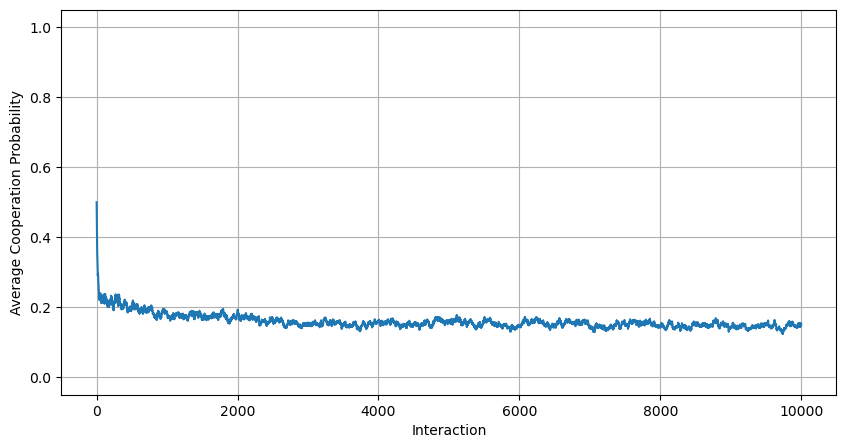

In [6]:
# Create a plot of the results
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.plot(results)  # Plot the results time series
plt.xlabel('Interaction')  # Label the x-axis as 'Interaction'
plt.ylabel('Average Cooperation Probability')  # Label the y-axis as 'Average Policy'
plt.grid(True)  # Enable grid for better visibility
plt.ylim(-0.05,1.05)
plt.show()  # Display the plot

### Learning over Fixed Strategies

In [14]:
# Parameters for the environment and learning model 
n_players = 2  # Number of players
n_strategies = 2 # Number of strategies for each player
payoff_matrix = np.array([[32/.05, 12+25*.95/.05], [50+25*.95/.05, 25/.05]])  # Payoff matrix for repeated game strategies
delta = .95  # Discount factor
alpha = .1  # Learning rate
lamb = .1  # Temperature parameter for softmax in strategy selection

# Initialize players, strategies, values, and policies
players = np.arange(n_players)  # Array of player indices from 0 to n_players-1
strategies = np.arange(n_strategies)  # Array of strategy indices from 0 to n_strategies-1
values = np.ones((n_players, n_strategies)) * (payoff_matrix.max() + payoff_matrix.min()) / 2  # Initial value estimates
policies = np.ones_like(values) * (1 / n_strategies)  # Uniform initial policies

# Main simulation
np.random.seed(123)  # Set seed for replicability
max_supergames = 100  # Maximum number of supergames
results = np.zeros(max_supergames)  # Array to store results

supergame = 0  # Supergame counter
while supergame < max_supergames:
    print("=" * 50)
    print("Supergame #", supergame)
    print("Values:", values)
    print("Policies:", policies)
    np.random.shuffle(players)  # Randomly shuffle the order of players before each supergame

    results[supergame] = policies[:, 0].mean()  # Record the average GRIM probability

    # Pairwise interaction between players
    for n in range(int(n_players / 2)):
        # Define player pairs
        i = players[n]
        j = players[n + int(n_players / 2)]  

        a_i = np.random.choice(strategies, p=policies[i])  # Select strategy for player i based on their policy
        a_j = np.random.choice(strategies, p=policies[j])  # Select strategy for player j based on their policy
#             print("Chosen strategies:", a_i, a_j)

        p_i = payoff_matrix[a_i, a_j]  # Payoff for player i
        p_j = payoff_matrix[a_j, a_i]  # Payoff for player j

        # Update value using exponential recency-weighted average
        values[i, a_i] = (1 - alpha) * values[i, a_i] + alpha * (p_i)
        values[j, a_j] = (1 - alpha) * values[j, a_j] + alpha * (p_j)

        # Update policies using softmax transformation
        policies[i] = np.exp(lamb * values[i]) / np.exp(lamb * values[i]).sum()
        policies[j] = np.exp(lamb * values[j]) / np.exp(lamb * values[j]).sum()
        
            

        supergame += 1  # Increment interaction count


Supergame # 0
Values: [[563.5 563.5]
 [563.5 563.5]]
Policies: [[0.5 0.5]
 [0.5 0.5]]
Supergame # 1
Values: [[555.85 563.5 ]
 [563.5  559.65]]
Policies: [[0.3175617  0.6824383 ]
 [0.59507847 0.40492153]]
Supergame # 2
Values: [[555.85  557.15 ]
 [563.5   553.685]]
Policies: [[0.46754569 0.53245431]
 [0.72740575 0.27259425]]
Supergame # 3
Values: [[555.85  553.935]
 [555.85  553.685]]
Policies: [[0.54772923 0.45227077]
 [0.55391457 0.44608543]]
Supergame # 4
Values: [[564.265 553.935]
 [564.265 553.685]]
Policies: [[0.73749709 0.26250291]
 [0.74230816 0.25769184]]
Supergame # 5
Values: [[571.8385 553.935 ]
 [571.8385 553.685 ]]
Policies: [[0.85697018 0.14302982]
 [0.86000723 0.13999277]]
Supergame # 6
Values: [[578.65465 553.935  ]
 [578.65465 553.685  ]]
Policies: [[0.92215294 0.07784706]
 [0.92392878 0.07607122]]
Supergame # 7
Values: [[584.789185 553.935   ]
 [584.789185 553.685   ]]
Policies: [[0.95628725 0.04371275]
 [0.95732046 0.04267954]]
Supergame # 8
Values: [[590.3102665 553.

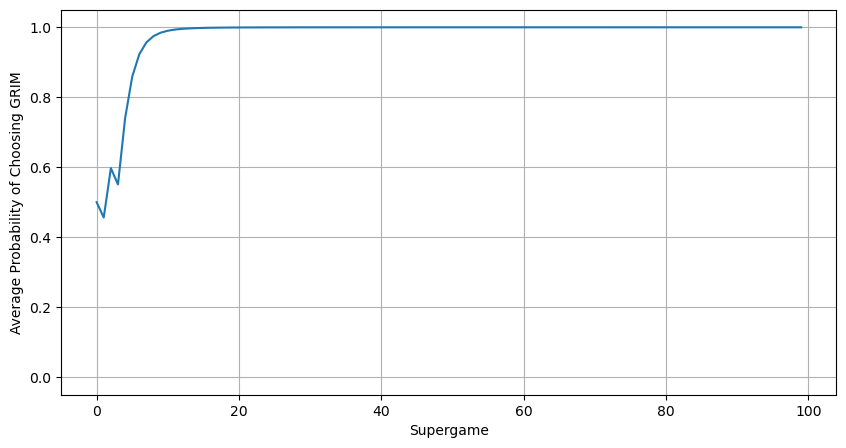

In [15]:
# Create a plot of the results
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.plot(results)  # Plot the results time series
plt.xlabel('Supergame')  # Label the x-axis as 'Interaction'
plt.ylabel('Average Probability of Choosing GRIM')  # Label the y-axis as 'Average Policy'
plt.grid(True)  # Enable grid for better visibility
plt.ylim(-0.05,1.05)
plt.show()  # Display the plot

### Learning Strategies

In [10]:
# Parameters for the environment and learning model 
n_players = 100  # Number of players
n_strategies = 2 # Number of strategies for each player
n_states = 5 # [0,CC,CD,DC,DD] <- five m-1 states
state_lookup={0:{0:1,1:2},1:{0:3,1:4}} # will use to look up the state order {my_action:{other_action:...}}
payoff_matrix = np.array([[32, 12], [50, 25]])  # Payoff matrix for strategies
delta = .95  # Discount factor
alpha = .1  # Learning rate
lamb = 1  # Temperature parameter for softmax in strategy selection

# Initialize players, strategies, values, and policies
players = np.arange(n_players,dtype=int)  # Array of player indices from 0 to n_players-1
strategies = np.arange(n_strategies,dtype=int)  # Array of strategy indices from 0 to n_strategies-1
states = np.arange(n_states,dtype=int)  # Array of strategy indices from 0 to n_strategies-1
q_values = np.ones((n_states, n_strategies, n_players)) * (1 / (1 - delta)) * (payoff_matrix.max() + payoff_matrix.min()) / 2  # Initial value estimates
policies = np.ones_like(q_values) * (1 / n_strategies)  # Uniform initial policies

# Main simulation
np.random.seed(123)  # Set seed for replicability
max_interaction = 10000  # Maximum number of interactions
results = np.zeros((n_states,max_interaction))  # Array to store results


interaction = 0  # Interaction counter
supergame = 0  # Supergame counter
while interaction < max_interaction:
    print("=" * 50)
    print("Supergame #", supergame)
#     print("Values:", q_values.round(2))
#     print("Policies:", policies.round(2))
    np.random.shuffle(players)  # Randomly shuffle the order of players before each supergame
    period = 0
    states = np.zeros(n_players,dtype=int)
    # Loop to simulate decision-making process under uncertainty
    while np.random.random() < delta:  # Continue with probability delta
#         print("-" * 25)
#         print("Period #", period)
#         print("Values:", q_values.round(1))
#         print("Policies:", policies.round(2))
#         print("States:", states.round(2))

        for s in range(n_states):
            results[s,interaction] = policies[s,0,:].mean()
        
        # Pairwise interaction between players
        for n in range(int(n_players / 2)):
            i = players[n]
            j = players[n + int(n_players / 2)]  # Define player pairs
            
            a_i = np.random.choice(strategies, p=policies[states[i],:,i])  # Select strategy for player i based on their policy
            a_j = np.random.choice(strategies, p=policies[states[j],:,j])  # Select strategy for player j based on their policy
#             print("Chosen strategies:", a_i, a_j)

            new_state_i = state_lookup[a_i][a_j]
            new_state_j = state_lookup[a_j][a_i]
            
            p_i = payoff_matrix[a_i, a_j]  # Payoff for player i
            p_j = payoff_matrix[a_j, a_i]  # Payoff for player j
            
            # Update value using exponential recency-weighted average
            q_values[states[i], a_i, i] = (1 - alpha) * q_values[states[i], a_i, i] + alpha * (p_i + delta * q_values[new_state_i,:,i].max())
            q_values[states[j], a_j, j] = (1 - alpha) * q_values[states[j], a_j, j] + alpha * (p_j + delta * q_values[new_state_j,:,j].max())
            
            # Update policies using softmax transformation
            policies[states[i],:,i] = np.exp(lamb * q_values[states[i],:,i]) / np.exp(lamb * q_values[states[i],:,i]).sum()
            policies[states[j],:,j] = np.exp(lamb * q_values[states[j],:,j]) / np.exp(lamb * q_values[states[j],:,j]).sum()
            
            states[i]=new_state_i
            states[j]=new_state_j
        
            
        interaction += 1  # Increment interaction count
        period+=1
        if interaction >= max_interaction:
            break  # Stop if maximum number of interactions is reached
    supergame += 1  # Increment supergame count

Supergame # 0
Values: [[[620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620.]
  [620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620. 620.
   620. 620. 62

Supergame # 4
Values: [[[618.1  618.04 618.1  618.1  620.37 620.1  620.19 618.1  620.   620.1
   620.13 618.1  618.1  620.   618.19 618.1  618.1  618.28 620.1  620.
   620.1  620.   620.1  618.1  618.1  620.28 618.1  618.11 620.   620.1
   616.56 618.34 620.1  620.   620.46 618.1  618.1  618.1  620.   618.39
   618.39 620.19 618.19 620.1  620.1  618.1  616.98 618.73 620.   620.
   620.   618.1  618.1  618.3  618.13 616.4  620.13 620.04 620.1  620.
   620.19 620.   616.39 618.37 618.1  620.   618.29 618.1  618.2  618.1
   616.68 618.39 616.49 617.94 620.21 620.   618.19 618.29 620.   620.
   618.1  620.13 618.1  620.   618.1  616.33 620.1  620.   620.38 620.
   618.1  618.1  618.62 618.11 618.1  618.26 620.   616.33 620.   618.19]
  [621.54 618.86 619.2  621.25 619.53 621.11 619.4  618.92 622.89 619.04
   619.4  621.18 621.36 620.73 619.17 620.93 621.14 619.19 623.61 621.04
   618.75 620.06 621.3  619.2  618.75 621.36 621.3  618.86 620.41 621.07
   619.4  619.4  618.86 620.41 620.   619

Supergame # 8
Values: [[[618.1  615.7  618.1  618.55 618.01 614.85 616.64 615.71 617.49 617.98
   617.77 618.1  615.15 617.28 618.19 618.4  618.1  617.22 618.01 618.12
   614.78 620.   618.   616.42 615.87 615.05 618.1  616.52 620.04 620.02
   614.92 618.71 617.94 620.   616.33 618.1  615.14 616.77 620.35 616.89
   616.74 616.96 618.35 618.4  618.07 618.1  614.42 616.08 620.   618.13
   617.88 618.1  618.25 613.56 615.4  616.4  615.08 614.27 618.02 617.98
   616.35 617.19 616.39 616.93 614.08 618.23 618.29 615.8  615.22 616.22
   616.68 616.16 616.49 617.94 620.54 615.89 618.38 618.29 620.   620.
   618.1  618.33 618.26 620.19 615.34 616.33 614.96 620.   615.97 618.03
   618.1  618.1  617.43 616.2  615.73 615.54 618.59 613.85 617.71 615.7 ]
  [620.84 616.55 623.97 615.97 616.5  617.69 619.2  616.68 617.85 620.85
   614.75 626.75 615.51 616.73 621.64 618.15 623.74 619.06 621.75 622.87
   615.4  625.95 620.04 616.27 616.67 617.99 622.76 620.24 622.3  622.15
   616.09 619.23 617.87 618.57

Supergame # 9
Values: [[[618.1  611.98 618.1  615.18 614.63 614.85 616.64 612.85 614.08 617.98
   617.82 618.1  612.6  617.28 618.19 614.32 618.1  617.22 618.01 618.12
   614.78 620.   618.   614.19 616.19 615.05 618.1  616.52 620.04 620.02
   614.92 618.71 618.35 620.   616.33 618.1  612.13 616.77 618.44 616.89
   616.74 616.96 618.35 616.57 618.07 618.1  614.42 616.08 620.   618.13
   617.88 618.1  615.45 613.56 611.59 616.4  615.08 614.27 618.02 617.98
   616.35 617.19 616.39 616.93 614.08 618.23 618.29 612.29 615.22 616.22
   616.68 616.16 616.49 617.94 620.54 612.86 618.38 618.29 620.   620.
   618.1  618.33 618.26 620.19 615.34 616.33 614.96 620.   615.97 618.03
   618.1  618.1  617.43 616.2  615.73 615.54 618.59 611.32 618.46 615.7 ]
  [617.55 616.55 621.68 615.97 616.5  616.91 621.72 616.68 617.85 620.35
   614.75 625.87 615.51 614.16 621.78 618.15 620.52 617.2  621.24 622.53
   612.77 624.26 619.43 616.27 616.67 619.78 622.78 618.61 618.7  619.5
   613.81 621.24 617.87 616.37 

Supergame # 13
Values: [[[610.09 611.98 618.1  608.18 610.55 615.3  616.64 609.28 610.51 617.98
   612.81 618.1  612.6  612.77 618.19 609.57 615.28 614.03 618.01 616.23
   611.92 620.   618.42 614.19 612.71 615.05 618.1  614.01 610.39 616.88
   611.6  618.71 615.19 608.38 613.73 618.1  608.79 609.75 616.1  616.89
   615.65 615.75 611.38 614.89 618.07 618.1  612.97 607.09 615.82 611.56
   615.7  618.1  612.   606.99 607.04 610.28 608.64 609.48 618.02 614.4
   616.35 609.97 616.39 614.04 614.08 618.23 615.15 603.81 615.22 614.22
   616.68 611.8  616.49 617.94 617.55 608.79 618.38 618.29 616.41 617.
   615.12 618.33 618.26 620.19 615.34 614.01 609.63 620.   615.97 614.87
   618.1  618.1  617.43 612.73 612.2  615.54 618.59 607.92 616.71 613.16]
  [615.68 614.15 622.8  609.23 612.41 615.39 618.88 608.17 614.42 621.65
   615.7  630.89 615.13 611.99 618.8  609.84 617.12 612.12 623.75 622.57
   615.86 626.62 619.77 621.35 613.61 624.29 624.63 617.48 610.5  619.64
   617.84 622.94 616.8  613.22

Supergame # 19
Values: [[[608.19 605.84 612.2  600.66 604.28 610.11 617.2  598.59 610.51 617.98
   610.56 618.1  606.1  609.34 608.76 600.94 608.82 606.28 614.46 616.23
   609.42 620.   616.56 614.19 609.17 615.05 618.1  611.11 602.01 616.88
   611.6  618.71 612.13 602.54 604.05 615.35 608.79 607.86 613.99 612.89
   615.65 615.75 605.6  610.84 618.07 618.1  613.58 601.62 608.22 605.76
   615.7  618.1  608.16 606.99 597.75 602.71 608.64 607.37 618.02 610.38
   610.91 602.5  614.5  609.32 606.99 615.48 611.71 603.81 615.22 609.69
   616.68 599.52 616.49 610.09 613.13 601.64 608.33 618.29 610.41 609.
   611.57 618.33 615.67 617.6  615.34 609.35 609.63 620.   615.97 608.35
   618.1  615.4  617.43 607.08 608.91 615.54 618.59 605.88 616.71 613.16]
  [602.33 608.35 615.16 598.62 609.73 608.45 621.42 599.18 618.96 625.13
   610.29 633.22 609.36 606.34 611.46 601.33 607.66 605.57 616.56 616.06
   612.17 627.74 621.6  618.88 608.55 627.   626.77 610.39 604.71 619.08
   614.32 623.4  615.   600.5

Supergame # 21
Values: [[[604.29 605.84 612.2  596.62 604.28 607.38 617.2  593.61 610.51 617.98
   606.82 618.1  606.1  604.46 605.2  596.64 604.58 602.1  610.99 616.23
   610.35 620.   616.56 614.19 604.2  615.05 618.1  608.79 602.01 616.88
   608.19 618.71 612.13 597.67 604.05 616.66 608.79 601.9  613.99 609.62
   615.65 615.75 605.6  610.84 618.07 618.1  613.58 603.01 603.21 605.76
   615.7  618.1  608.29 606.99 593.65 602.71 608.64 607.37 618.02 607.59
   607.49 603.77 614.5  609.32 602.36 616.32 608.62 603.81 615.22 607.85
   616.68 595.94 616.49 610.44 613.13 596.21 609.45 618.29 610.41 609.
   606.87 618.33 613.08 615.08 615.34 605.44 605.44 620.   615.97 604.43
   618.1  611.72 617.43 607.08 608.91 613.17 618.59 605.88 616.71 613.16]
  [602.33 609.45 613.36 594.99 601.73 608.36 624.47 595.34 617.56 619.09
   606.89 635.73 608.2  608.79 607.77 597.26 609.66 601.89 613.66 620.7
   608.66 624.72 621.53 617.96 604.02 627.87 625.01 611.09 603.49 620.56
   612.69 625.09 617.04 597.04

Values: [[[600.12 605.84 612.2  591.61 600.67 607.38 617.2  593.61 610.51 617.98
   603.12 618.1  606.1  604.46 605.2  591.7  604.58 602.9  610.99 616.23
   610.04 616.38 616.56 614.19 604.2  615.05 618.1  608.79 602.01 616.88
   608.19 618.71 612.13 597.67 604.05 616.66 608.79 601.9  613.99 609.62
   615.65 615.75 605.6  610.84 618.07 618.1  613.58 598.15 603.21 605.76
   615.7  618.1  603.87 606.99 593.65 598.16 608.64 607.37 618.02 607.59
   607.49 600.61 610.98 609.32 602.36 616.32 608.62 603.81 615.22 607.6
   612.52 595.94 616.49 610.44 613.13 596.21 606.08 618.29 610.41 609.
   606.87 618.33 613.08 615.08 615.34 605.44 605.44 620.   615.97 600.44
   618.1  611.72 617.43 603.03 608.91 608.95 618.59 606.88 612.63 613.16]
  [602.33 611.78 612.72 594.99 601.73 608.93 622.08 599.68 617.15 617.89
   606.89 634.75 605.54 611.83 606.93 597.26 610.88 601.89 614.01 619.28
   608.66 624.72 618.9  613.38 605.53 630.96 622.21 612.2  603.35 621.95
   612.27 622.6  618.98 592.65 609.89 622.82 

Supergame # 24
Values: [[[600.12 605.84 612.2  591.61 600.67 607.38 617.2  593.61 610.51 614.09
   603.12 618.1  603.27 604.46 605.2  591.7  604.58 602.9  610.99 616.23
   605.88 616.38 616.56 608.36 604.2  615.05 618.1  608.79 602.01 616.88
   608.19 618.71 612.13 597.67 604.05 616.66 608.79 601.9  613.99 605.39
   615.65 615.75 602.42 610.84 618.07 618.1  613.58 598.15 596.73 605.76
   615.7  618.1  603.87 606.99 593.65 598.16 608.64 607.37 618.02 607.59
   608.41 600.61 610.98 604.97 598.47 614.38 608.62 603.81 615.22 607.6
   612.52 595.94 616.49 610.44 613.13 596.21 606.74 618.29 610.32 609.
   600.82 618.33 613.08 615.08 615.34 605.44 605.44 615.66 615.97 600.44
   618.1  611.72 617.43 599.08 608.91 608.95 618.59 602.38 609.35 613.16]
  [601.81 609.02 612.17 598.56 597.93 607.05 624.17 593.9  614.9  617.89
   602.57 634.78 605.54 605.93 604.09 592.41 605.77 602.33 611.87 615.77
   608.66 623.69 615.59 613.38 603.79 627.16 618.68 610.63 601.09 620.38
   613.03 624.89 619.76 596.05

Policies: [[[0.02 0.67 0.03 0.   1.   0.98 0.08 0.   0.44 0.43 0.98 0.   0.01 0.14
   0.02 0.99 0.99 0.81 0.95 0.64 0.09 0.   1.   0.76 0.   0.   0.03 0.81
   0.15 0.   0.   0.08 0.   0.06 0.   0.   0.   0.48 0.   0.   0.01 0.
   0.2  0.9  0.   0.   0.06 0.99 0.   0.02 0.   0.38 0.13 0.11 0.   0.83
   0.   0.55 0.   0.88 0.41 0.7  0.99 1.   0.   0.24 0.   0.9  0.46 0.93
   0.19 0.   0.   0.17 0.   0.11 0.04 0.01 0.75 0.   0.   0.08 0.94 0.53
   0.02 0.02 0.07 0.   0.01 0.74 0.07 0.01 0.01 0.39 0.92 0.   0.   0.99
   0.   0.16]
  [0.98 0.33 0.97 1.   0.   0.02 0.92 1.   0.56 0.57 0.02 1.   0.99 0.86
   0.98 0.01 0.01 0.19 0.05 0.36 0.91 1.   0.   0.24 1.   1.   0.97 0.19
   0.85 1.   1.   0.92 1.   0.94 1.   1.   1.   0.52 1.   1.   0.99 1.
   0.8  0.1  1.   1.   0.94 0.01 1.   0.98 1.   0.62 0.87 0.89 1.   0.17
   1.   0.45 1.   0.12 0.59 0.3  0.01 0.   1.   0.76 1.   0.1  0.54 0.07
   0.81 1.   1.   0.83 1.   0.89 0.96 0.99 0.25 1.   1.   0.92 0.06 0.47
   0.98 0.98 0.93 1.   0.99 0.2

Supergame # 29
Values: [[[600.12 599.07 608.82 591.61 589.65 600.79 612.67 586.73 605.65 606.77
   594.1  618.1  600.87 604.46 596.6  582.76 591.1  602.32 607.19 616.22
   605.88 616.38 605.06 598.03 592.63 615.05 613.38 599.78 599.33 616.88
   608.19 613.88 612.13 593.26 604.05 616.66 608.79 599.38 613.99 605.39
   615.65 615.75 602.42 601.65 618.07 618.1  609.55 590.31 590.15 605.76
   615.7  612.88 596.99 598.83 593.65 591.96 604.06 598.58 618.02 605.04
   604.83 596.9  605.29 592.13 585.33 612.11 608.62 595.59 603.44 601.38
   609.01 595.94 616.49 601.52 613.13 592.23 598.64 608.11 597.86 609.
   600.82 618.33 606.84 611.09 608.57 605.44 596.52 615.66 615.97 589.76
   615.19 593.72 617.43 594.31 597.45 608.95 618.59 596.14 609.35 602.89]
  [607.86 603.35 621.46 601.38 588.35 602.82 610.75 585.86 601.88 609.39
   597.6  628.65 610.   608.14 596.47 581.94 596.52 602.33 612.83 619.5
   610.39 622.08 605.82 605.99 592.69 614.21 614.32 600.81 601.15 620.24
   622.03 621.15 621.74 606.29

Supergame # 32
Values: [[[600.12 599.07 608.82 591.61 586.12 600.79 608.04 582.07 600.31 602.95
   588.95 618.1  600.87 604.46 596.6  577.48 591.1  602.32 607.19 612.67
   605.88 612.49 600.23 598.03 583.94 611.37 608.49 601.24 596.99 617.03
   608.19 613.88 612.13 593.26 604.05 616.66 608.79 599.38 605.43 605.39
   615.65 615.75 602.42 597.71 618.07 618.1  607.23 590.31 581.62 605.76
   612.05 607.64 594.82 595.53 593.65 591.96 600.28 598.58 618.02 605.04
   600.86 593.04 596.3  582.57 579.55 612.11 608.62 591.79 598.97 596.32
   609.01 595.94 616.49 601.52 613.13 592.23 591.62 610.86 592.35 605.05
   594.53 614.58 602.29 603.58 606.01 605.44 598.04 615.66 615.97 584.67
   615.19 588.03 614.77 594.31 586.95 607.66 618.59 584.66 609.35 599.81]
  [601.38 603.95 623.23 602.44 585.92 606.46 608.61 583.6  607.8  603.2
   589.18 615.18 609.53 603.17 591.7  573.42 588.71 610.27 615.04 615.
   609.65 614.98 600.83 606.33 587.85 611.6  607.95 597.95 601.02 614.89
   625.42 614.58 622.55 606.11

Supergame # 34
Values: [[[595.   599.07 608.82 591.61 586.12 597.18 602.71 583.79 600.31 602.95
   592.34 611.81 600.87 598.75 585.64 573.13 584.29 602.32 607.19 613.01
   605.88 609.8  602.15 598.03 578.43 606.46 602.6  596.07 592.5  613.86
   608.19 608.62 612.13 593.26 600.84 616.66 608.79 599.38 600.27 605.39
   615.65 615.75 602.42 598.4  618.07 618.1  604.28 590.31 581.62 600.83
   612.05 602.97 596.15 595.53 593.65 591.96 601.32 598.58 618.02 605.96
   600.86 593.04 596.3  582.57 579.55 612.11 606.19 587.14 598.97 596.32
   609.01 595.94 616.49 601.52 613.13 592.23 591.62 605.26 586.34 605.05
   590.82 614.58 602.29 598.13 606.01 601.64 595.17 615.66 615.97 584.67
   611.17 584.48 610.12 594.31 586.95 607.66 618.59 584.66 609.35 595.14]
  [600.28 597.41 623.98 606.39 590.08 603.03 603.58 578.86 604.31 606.69
   584.52 609.61 609.92 603.84 591.7  576.59 585.68 602.79 612.23 610.4
   609.54 611.46 595.59 607.47 582.54 607.75 603.11 601.96 596.77 611.44
   624.5  610.1  624.79 605.

Supergame # 38
Values: [[[590.53 589.96 608.82 591.61 586.12 597.18 596.9  573.97 595.73 602.95
   583.82 599.48 600.87 594.25 585.64 573.13 581.8  594.7  602.94 608.34
   605.88 606.24 596.47 598.03 567.79 597.11 596.7  596.07 597.15 609.97
   608.19 598.15 612.13 593.26 591.72 616.66 600.95 599.38 591.88 600.46
   615.65 615.75 602.42 594.62 618.07 618.1  604.28 585.41 578.35 594.93
   603.73 603.76 595.52 595.53 593.65 591.96 591.3  594.45 618.02 598.91
   600.86 593.04 592.54 579.67 579.55 608.05 604.59 582.94 598.97 596.32
   609.01 592.25 616.49 601.52 613.58 592.23 590.6  601.34 580.83 601.4
   582.02 611.19 602.29 587.62 597.34 601.64 595.17 615.66 610.27 584.67
   602.4  584.48 606.05 587.01 582.81 607.66 618.59 580.9  604.37 595.14]
  [591.05 594.4  617.76 605.63 588.97 596.14 602.43 578.87 600.53 611.66
   583.09 599.29 613.76 599.92 583.21 577.35 585.68 594.81 600.43 608.96
   607.11 604.34 595.59 614.24 572.41 599.51 595.24 601.42 593.9  612.53
   618.4  600.6  615.88 597.

Values: [[[585.98 589.96 608.82 591.61 586.12 592.09 596.9  573.97 595.73 602.95
   578.18 595.05 600.87 594.25 580.57 573.13 581.8  584.03 599.42 602.84
   601.44 602.12 591.85 598.03 567.79 597.11 590.22 596.07 585.75 605.38
   608.19 592.83 607.65 593.26 591.72 616.66 597.   599.38 585.99 594.95
   615.65 615.75 602.42 590.48 618.07 611.64 604.28 581.04 573.77 594.93
   598.75 600.15 591.27 591.88 593.65 588.29 591.3  588.61 618.02 593.62
   600.86 593.04 592.54 580.91 579.55 608.05 600.5  577.65 598.97 596.32
   609.89 583.28 616.49 601.52 607.17 592.23 579.13 601.34 580.83 601.4
   582.02 608.68 602.29 582.35 593.55 601.64 592.67 610.62 605.13 584.67
   602.4  584.48 602.77 579.69 576.1  607.66 618.59 577.56 600.17 595.14]
  [583.03 594.85 612.52 607.87 589.73 587.17 602.05 578.78 594.07 615.37
   580.49 593.81 612.69 602.48 575.46 577.94 581.13 589.87 599.42 599.34
   599.53 600.02 595.59 611.99 570.47 593.79 592.24 596.24 588.6  604.04
   606.15 590.82 611.59 598.52 593.47 634.0

Supergame # 46
Values: [[[579.86 589.96 601.88 591.61 582.33 580.08 592.08 573.97 583.74 602.95
   570.07 589.04 600.87 594.25 567.77 573.13 571.74 579.19 593.73 599.53
   593.69 593.04 589.2  598.03 564.81 591.26 590.22 596.07 580.58 596.12
   605.06 583.31 603.17 593.26 591.72 616.66 591.24 599.38 570.01 584.29
   612.55 611.01 602.42 590.48 618.07 605.72 604.28 581.04 563.48 582.27
   594.22 595.52 591.27 588.57 593.65 588.29 591.3  577.72 614.35 583.59
   600.86 593.04 592.54 571.51 579.55 600.32 595.44 569.46 598.97 596.32
   603.68 583.28 612.01 598.98 603.61 592.23 573.94 600.   576.15 597.55
   582.02 606.36 593.98 582.35 585.82 596.78 590.45 610.62 600.26 581.43
   599.36 584.48 602.77 575.25 563.86 607.66 608.14 586.24 600.17 595.14]
  [582.89 596.89 602.43 606.31 595.25 582.76 589.56 577.27 587.36 615.03
   574.2  595.34 607.66 601.53 568.87 578.1  572.4  580.32 596.14 597.61
   595.65 592.18 587.18 616.32 566.56 592.01 596.13 601.86 580.68 598.64
   602.24 581.08 603.39 592

Supergame # 49
Values: [[[579.86 589.96 599.99 591.61 582.33 577.29 582.99 573.97 580.29 602.95
   570.07 589.04 600.87 594.25 566.98 573.13 567.98 574.52 593.73 594.88
   590.23 584.11 586.94 598.03 564.81 588.16 590.22 592.77 576.23 591.37
   600.76 575.39 598.8  593.26 591.72 616.66 591.24 599.38 570.01 581.94
   612.55 606.28 602.42 586.96 618.07 600.61 604.28 577.59 561.19 576.87
   599.24 595.52 591.27 588.57 593.65 588.61 591.3  572.4  614.03 580.95
   600.86 593.04 592.54 567.44 579.55 596.82 594.43 569.46 598.97 592.83
   603.68 580.17 607.98 594.88 600.61 592.23 573.94 595.18 576.15 594.11
   582.02 606.36 589.59 582.35 589.36 594.16 590.45 606.46 599.05 578.38
   599.36 584.48 596.92 572.42 560.39 603.06 603.05 586.87 600.17 595.14]
  [579.17 592.98 599.22 605.22 600.05 583.36 585.39 577.88 580.51 614.2
   571.43 591.76 614.77 599.21 565.66 571.15 571.06 574.4  595.19 597.23
   590.37 588.95 585.5  616.95 568.92 588.97 596.71 596.89 578.53 591.19
   597.74 578.13 595.68 592.

Supergame # 52
Values: [[[575.7  587.52 596.17 591.61 582.33 577.29 583.27 573.97 576.19 602.95
   566.88 584.04 600.87 594.25 567.66 573.76 567.98 569.04 596.28 597.09
   586.09 584.11 586.94 598.03 564.81 589.2  590.22 592.77 572.5  583.48
   592.67 575.39 589.98 592.96 591.72 616.66 591.24 599.38 570.01 576.47
   610.08 598.27 602.42 583.7  618.07 600.61 604.28 574.44 555.49 572.45
   598.26 584.8  591.27 588.57 593.65 588.39 591.3  565.36 609.3  580.95
   600.86 593.04 589.44 564.05 579.55 598.46 592.21 569.46 598.97 588.89
   599.02 580.17 597.93 596.94 597.97 592.23 569.47 593.04 572.16 590.54
   582.02 606.36 589.59 582.35 581.19 594.16 588.46 603.01 594.13 572.67
   599.36 584.48 591.86 570.85 560.39 599.77 603.05 586.71 600.17 595.14]
  [572.25 588.05 600.33 611.48 593.66 577.99 579.68 573.35 576.27 603.65
   570.99 584.6  613.22 595.1  565.66 571.15 572.41 572.55 591.36 594.24
   590.82 584.35 589.83 614.13 564.43 588.97 593.09 593.25 579.23 587.29
   593.88 576.84 591.85 589

Values: [[[574.13 587.52 596.17 591.61 582.33 577.29 579.9  570.5  576.19 599.03
   566.88 579.79 600.87 590.88 561.84 570.35 564.71 569.04 589.6  592.92
   586.09 584.87 586.94 598.03 562.17 585.29 585.81 591.43 572.5  583.48
   592.67 575.39 589.98 592.04 591.72 616.66 591.24 599.38 570.01 576.47
   606.56 598.27 602.42 586.27 614.41 600.61 604.28 574.44 555.49 572.45
   594.6  584.8  591.27 585.15 593.65 588.39 591.3  565.36 609.3  577.11
   596.99 593.04 586.24 564.05 579.55 589.64 592.21 569.46 595.44 584.89
   594.84 577.37 597.93 593.74 597.97 588.14 565.87 593.04 572.16 587.46
   582.02 603.51 585.83 582.35 581.19 592.2  588.46 598.3  589.4  572.67
   597.02 584.48 591.86 567.38 560.39 599.77 599.52 581.37 600.17 595.14]
  [572.25 590.72 599.28 611.62 588.64 576.68 579.68 569.95 575.48 601.04
   570.29 584.44 618.93 593.87 565.66 573.62 568.92 573.77 591.36 591.21
   583.19 587.57 593.7  606.07 562.32 585.7  592.83 593.25 580.23 581.64
   595.58 581.92 591.86 589.24 597.2  618.

Values: [[[571.1  585.39 596.85 591.61 582.33 580.49 576.85 567.24 570.65 599.21
   566.88 579.79 600.87 590.88 561.84 570.35 564.71 569.04 585.56 588.61
   581.35 579.88 586.94 598.03 558.18 582.24 585.81 589.03 572.5  579.76
   592.67 575.39 589.98 589.7  591.72 617.62 591.24 599.38 570.01 576.47
   606.56 592.92 602.42 584.77 609.73 596.54 604.28 574.44 555.49 572.45
   591.13 584.8  591.27 585.15 593.65 588.39 591.3  565.36 604.55 579.97
   594.27 593.04 587.83 564.05 579.55 589.64 592.21 569.46 595.44 580.52
   596.21 574.15 593.85 590.38 597.97 588.14 565.87 591.89 572.16 587.46
   582.02 598.93 580.48 582.35 581.19 594.31 588.46 595.38 588.4  572.67
   595.03 584.48 591.86 565.1  560.39 594.77 595.33 581.09 600.17 595.14]
  [572.25 588.03 599.53 608.95 589.28 576.68 577.   565.92 575.48 601.89
   569.96 585.28 611.39 596.85 565.83 573.9  568.7  575.35 588.14 587.3
   579.2  585.05 591.3  604.6  559.01 583.56 597.73 589.88 578.76 584.41
   594.14 585.71 591.9  585.87 600.15 614.7

Supergame # 60
Values: [[[567.52 581.79 597.59 591.61 579.16 576.49 571.9  559.38 570.65 595.63
   563.04 582.76 600.87 590.88 561.84 570.35 560.25 569.04 581.44 579.62
   579.26 579.88 586.94 598.03 560.14 579.6  585.81 588.43 572.5  579.76
   582.66 575.39 589.62 579.29 591.72 610.37 591.24 597.09 570.01 569.1
   602.83 592.66 602.42 578.69 600.03 593.29 604.28 574.44 555.49 572.45
   591.13 579.3  591.27 588.07 593.65 588.11 591.3  562.57 594.74 575.87
   591.89 585.19 583.1  564.05 579.55 586.05 590.73 566.47 586.88 576.28
   591.87 570.55 593.85 584.27 590.84 583.3  565.87 592.73 572.16 587.46
   582.02 595.94 572.31 582.35 581.19 587.64 588.46 595.38 583.86 572.67
   590.65 584.48 591.86 561.37 555.8  590.49 589.5  579.46 597.08 595.14]
  [569.86 584.46 597.79 610.82 586.14 575.02 571.21 559.21 570.73 598.03
   564.63 581.04 604.43 600.36 567.14 581.48 562.42 585.72 584.78 582.21
   584.36 583.99 592.6  602.55 555.89 579.48 596.41 583.29 575.24 585.38
   585.23 582.58 588.61 582.

Supergame # 64
Values: [[[564.33 578.68 594.67 591.61 579.16 574.12 565.77 559.38 570.31 595.63
   561.29 579.34 600.87 590.88 561.84 570.35 557.86 569.04 573.85 578.84
   579.26 579.88 586.94 598.03 555.39 577.43 585.81 582.56 569.32 576.85
   575.87 575.39 587.12 576.26 591.72 605.8  591.24 596.92 570.01 569.1
   602.83 582.82 602.42 574.48 595.08 587.75 604.28 574.44 555.49 568.68
   585.75 569.99 585.87 580.43 591.13 585.21 591.3  562.57 590.22 576.51
   583.11 580.76 574.13 564.05 579.55 583.44 586.21 566.47 587.8  576.28
   592.96 567.46 593.85 581.   588.43 578.49 565.87 589.05 572.16 587.46
   582.02 595.94 567.58 574.82 578.31 584.79 588.46 595.38 579.91 572.67
   588.26 584.48 591.86 554.6  552.05 582.34 588.29 577.69 597.08 595.14]
  [563.86 575.26 594.68 611.44 586.3  575.36 566.16 558.4  570.73 600.01
   560.83 579.35 601.54 599.6  565.5  578.32 556.36 589.92 577.81 581.92
   577.08 580.16 592.58 596.32 556.44 578.87 589.02 580.31 571.85 576.54
   577.75 578.72 586.3  579.

Supergame # 66
Values: [[[564.33 578.05 591.61 591.61 579.16 574.12 562.15 563.21 570.31 592.4
   557.03 579.34 596.25 590.88 561.84 570.35 553.79 569.04 573.85 577.97
   575.8  577.12 586.94 596.18 556.06 577.43 585.81 578.03 566.07 576.85
   573.11 575.39 592.01 576.26 591.72 605.55 591.24 593.62 570.01 564.84
   599.71 575.66 597.31 571.06 589.63 587.75 604.28 574.44 550.33 568.68
   585.75 568.87 585.87 578.   587.57 585.21 591.3  562.57 586.36 574.27
   583.11 576.33 574.13 564.05 579.55 579.98 581.42 567.29 587.8  576.28
   589.17 567.46 590.99 578.77 589.76 578.49 565.87 580.82 572.16 587.46
   582.02 595.94 567.58 574.82 578.31 584.79 588.46 595.38 579.91 572.67
   583.96 584.48 591.86 554.57 552.05 582.34 584.99 575.69 592.22 595.14]
  [569.34 575.26 591.71 606.58 590.14 575.89 562.89 555.08 573.78 597.16
   557.76 584.36 597.92 598.75 567.19 577.02 552.92 587.14 572.63 578.27
   578.94 582.78 596.08 596.32 557.47 581.33 588.79 576.45 569.32 578.18
   573.9  576.91 586.3  578.

Supergame # 70
Values: [[[560.33 572.8  588.98 591.61 579.16 570.5  562.15 555.32 570.31 588.88
   553.53 579.34 588.1  590.88 561.84 567.39 546.66 569.04 570.03 573.89
   571.38 577.12 586.94 590.38 556.06 577.43 585.81 569.17 566.07 570.13
   571.37 571.59 585.74 572.08 591.72 599.75 591.24 589.86 570.01 566.48
   596.97 575.66 587.58 571.06 589.63 589.07 604.28 574.44 550.33 566.87
   580.17 568.87 583.25 578.   579.33 577.58 591.3  562.57 586.36 576.18
   583.11 574.98 570.24 564.05 574.53 576.97 578.3  564.91 587.8  576.28
   589.17 564.05 588.49 574.11 584.23 568.98 565.87 576.84 572.16 584.36
   574.31 593.89 563.46 570.71 576.1  580.54 588.46 593.6  579.91 572.67
   583.96 584.48 585.19 552.72 552.05 574.51 581.95 574.48 582.74 595.14]
  [565.38 575.26 587.9  610.23 588.17 573.63 563.46 555.08 575.5  587.05
   552.29 584.77 590.26 593.26 570.21 571.23 546.6  585.92 570.95 578.8
   572.73 588.19 594.62 592.57 562.61 581.28 594.42 569.13 571.61 574.89
   579.44 575.21 587.19 575.

Supergame # 74
Values: [[[560.33 569.96 584.92 591.61 579.16 570.5  567.32 553.65 568.2  585.43
   547.64 579.34 584.9  590.88 561.84 567.28 543.39 569.04 566.35 569.6
   564.4  577.12 586.94 588.01 556.06 577.43 585.81 562.21 563.29 570.45
   571.37 567.34 582.34 570.96 591.72 589.73 591.24 586.   570.01 558.12
   590.02 575.66 587.58 571.06 589.63 584.54 604.28 574.44 550.33 566.87
   580.17 568.87 578.46 579.   579.33 574.3  591.3  562.57 586.36 576.18
   583.11 566.97 567.17 564.05 574.66 570.67 578.09 563.07 587.8  576.28
   584.99 564.05 588.06 571.83 580.92 566.35 565.87 569.44 572.16 584.36
   565.08 594.66 563.46 570.71 576.1  576.78 583.9  585.27 576.55 570.46
   579.27 581.43 583.23 552.72 552.05 574.51 576.77 574.48 575.57 591.88]
  [564.31 569.14 587.82 608.39 581.69 570.8  561.32 560.37 569.84 585.45
   546.55 583.39 584.64 596.32 571.86 564.87 540.88 576.53 567.8  569.26
   568.62 582.37 593.54 592.28 566.8  577.62 600.82 562.9  566.44 570.06
   585.75 565.07 583.04 570.

Values: [[[560.33 566.99 584.92 591.61 579.16 567.33 560.12 553.65 568.2  582.53
   544.73 579.34 581.52 590.88 561.84 565.15 543.62 569.04 562.48 565.41
   564.4  577.12 586.94 588.01 556.06 574.47 585.81 562.21 560.14 570.45
   571.37 566.27 579.16 567.69 591.72 589.73 591.24 586.   570.01 560.47
   590.02 575.66 587.58 571.06 589.63 584.54 605.54 571.43 550.33 564.61
   580.17 568.87 581.1  576.54 579.33 570.72 591.3  562.57 583.26 576.18
   583.11 563.48 567.17 564.05 574.66 570.67 574.69 563.07 587.8  576.28
   580.71 564.05 585.89 571.83 578.35 572.15 565.87 569.44 572.16 584.36
   564.86 591.27 563.46 570.71 576.1  579.13 579.76 583.58 580.64 570.46
   578.17 581.43 583.23 552.72 552.05 570.12 574.56 574.48 575.57 591.88]
  [564.16 566.07 589.43 608.26 576.39 570.73 561.32 555.63 568.67 582.81
   543.91 583.53 582.06 593.1  573.03 564.82 540.88 572.81 564.58 571.63
   560.76 579.88 588.31 587.25 565.42 576.01 602.93 565.54 563.49 570.68
   588.57 565.07 580.01 567.51 604.14 596.

Supergame # 80
Values: [[[557.98 560.88 584.92 591.61 579.9  567.33 558.85 550.41 565.06 580.71
   539.12 579.34 581.52 586.43 561.84 562.1  539.22 567.6  558.43 566.78
   558.82 577.12 586.94 582.01 556.06 568.28 585.81 562.21 560.14 571.38
   571.37 560.64 575.37 562.05 591.72 589.73 591.24 585.59 570.01 555.44
   590.02 575.66 587.58 571.06 589.63 584.54 602.59 570.57 550.33 564.61
   578.8  568.87 580.04 570.24 577.43 568.08 591.3  562.57 578.65 576.18
   583.81 559.46 560.54 564.05 567.2  572.32 571.   563.07 587.8  576.28
   576.34 564.05 582.59 571.83 578.35 562.66 563.59 569.44 572.16 584.36
   560.69 588.06 563.46 573.02 576.1  571.7  577.   583.22 584.47 570.46
   578.36 578.58 578.59 552.72 552.05 569.33 572.72 577.97 575.57 591.51]
  [560.   568.45 590.27 595.61 576.39 576.27 556.64 548.41 567.12 576.95
   541.83 585.53 584.58 585.08 576.68 566.67 538.65 570.36 561.38 562.39
   563.72 583.57 587.24 580.59 561.19 570.4  597.46 571.78 558.62 568.81
   583.07 564.98 577.01 561

Supergame # 82
Values: [[[559.62 560.88 584.92 594.08 571.46 567.33 557.19 556.79 563.86 574.05
   539.12 579.34 581.52 582.07 561.84 562.1  536.63 567.6  558.43 565.49
   558.82 577.12 586.94 580.85 556.06 570.08 585.81 562.21 561.37 565.61
   571.37 560.64 571.26 558.46 591.72 585.78 591.24 578.99 570.01 555.44
   590.02 575.66 587.58 571.06 585.44 584.54 599.26 574.79 550.33 564.61
   578.8  568.87 576.33 570.24 573.4  564.39 591.3  567.63 578.65 576.18
   583.81 556.68 560.54 564.05 567.2  573.14 568.92 563.07 587.8  576.19
   576.34 564.05 582.59 567.83 576.23 560.02 563.59 569.44 572.16 584.36
   557.96 585.33 563.46 569.41 577.3  567.88 572.53 580.2  578.93 570.46
   583.35 576.51 582.4  552.72 552.05 565.05 574.31 578.24 575.57 585.87]
  [557.77 567.47 585.55 598.14 576.39 577.07 556.64 548.41 565.95 576.95
   545.09 586.32 584.9  581.42 575.46 564.62 536.52 569.3  563.46 562.39
   555.72 584.09 590.07 580.59 562.37 567.41 591.14 574.03 558.62 568.81
   575.96 564.12 578.19 558

Values: [[[557.55 560.88 591.12 594.08 571.46 567.33 549.22 551.43 563.86 570.35
   536.08 579.34 582.8  572.49 561.84 562.1  533.33 571.8  558.43 565.9
   550.45 574.96 585.34 574.87 556.06 564.82 583.41 562.21 558.54 559.34
   573.07 558.39 567.3  558.46 591.72 581.21 591.24 575.52 570.01 551.03
   590.02 575.66 583.71 571.06 585.44 583.33 599.26 570.92 550.33 564.61
   575.8  568.87 573.05 570.24 567.05 564.39 591.3  563.33 576.2  576.18
   581.67 553.71 557.78 564.05 567.2  570.34 564.7  563.07 584.05 574.01
   567.48 562.2  579.02 567.83 572.62 560.02 563.84 569.44 568.87 584.36
   557.96 578.16 563.46 566.54 577.3  566.9  568.55 572.59 578.68 570.46
   580.25 576.51 575.2  552.72 552.05 560.01 574.31 574.14 575.57 575.39]
  [556.82 567.77 585.55 598.94 570.2  580.38 550.74 548.41 574.52 567.77
   537.56 583.17 580.91 573.47 580.57 568.34 532.03 565.42 564.72 562.39
   554.96 579.3  589.6  576.32 562.14 568.01 585.58 570.98 558.44 562.36
   568.94 561.46 567.35 561.68 594.77 577.5

Supergame # 90
Values: [[[555.88 560.88 583.02 594.08 567.27 567.33 549.22 551.48 563.86 566.69
   533.18 579.34 580.82 576.94 561.84 562.1  531.22 579.76 558.43 560.64
   550.45 574.96 585.34 574.87 556.06 564.82 583.41 562.21 557.58 555.87
   567.52 555.96 565.63 559.5  595.71 581.38 586.1  576.04 570.01 551.03
   589.91 575.66 583.71 571.06 580.76 580.97 599.26 570.64 550.33 564.61
   572.23 568.87 573.05 570.24 562.56 564.39 591.3  560.37 575.11 576.18
   579.78 553.71 558.39 564.05 561.22 570.34 564.7  563.07 579.93 574.01
   562.71 558.92 574.03 567.83 572.62 560.02 561.72 569.44 568.87 580.17
   557.96 583.14 559.54 567.61 572.56 558.   568.55 569.62 574.9  570.46
   579.82 576.51 571.23 552.72 552.05 555.98 570.13 575.61 575.57 575.39]
  [556.82 568.17 582.51 600.45 567.83 573.56 547.86 548.41 577.03 567.1
   533.26 584.56 578.05 569.88 583.79 569.96 532.03 565.42 562.28 562.92
   553.55 579.89 590.41 581.88 563.38 572.67 587.66 568.76 560.37 556.55
   568.94 561.6  564.08 556.

Supergame # 92
Values: [[[555.88 560.88 580.12 594.08 567.27 567.33 554.68 545.18 563.86 562.89
   533.18 579.34 574.76 569.98 561.84 562.1  531.22 567.52 558.43 560.64
   550.45 574.96 585.34 574.87 556.06 564.82 583.41 562.21 557.58 555.87
   563.72 555.96 561.99 555.59 594.86 571.82 583.04 571.98 570.01 551.03
   585.62 575.66 583.71 571.06 580.76 580.97 599.26 565.42 550.33 564.61
   569.77 568.87 573.05 570.24 561.2  564.39 591.3  560.37 575.11 576.18
   579.78 553.71 556.41 564.05 558.73 570.34 560.12 563.07 576.58 574.01
   562.71 560.66 574.03 567.83 574.33 560.02 559.82 567.4  565.91 575.2
   554.83 578.24 559.54 564.07 567.58 554.36 568.55 569.62 574.9  570.09
   578.17 576.51 563.06 552.72 552.05 555.98 570.76 576.97 575.57 571.46]
  [556.96 564.19 584.1  594.25 566.36 579.4  547.86 548.41 580.19 563.72
   534.56 585.06 578.05 569.88 580.63 569.38 529.54 565.42 563.7  564.59
   549.   583.81 594.72 575.57 563.58 569.79 593.66 566.08 565.25 557.99
   570.13 555.42 562.52 560.

Values: [[[554.52 560.88 580.12 596.35 568.92 567.33 552.25 545.18 563.86 558.34
   533.18 579.34 574.76 570.61 561.84 562.1  529.19 563.26 558.43 560.64
   547.52 574.96 585.34 570.83 556.06 564.82 583.41 562.21 557.58 555.87
   563.72 555.96 558.83 555.59 589.5  566.66 579.94 571.98 565.07 551.03
   586.37 575.66 583.71 571.06 580.76 580.97 599.26 561.07 550.33 560.97
   565.91 568.87 573.05 570.24 556.19 560.29 591.3  560.37 575.86 576.18
   573.6  553.71 552.61 564.05 555.87 570.34 551.74 559.2  576.58 574.01
   562.71 559.48 574.03 567.83 569.62 560.02 556.42 567.4  567.11 575.2
   554.83 574.07 557.82 560.98 569.58 550.17 568.55 569.62 570.52 565.35
   579.   571.89 563.06 552.72 552.05 555.98 572.5  577.8  575.57 568.33]
  [556.14 564.11 582.53 589.77 563.38 574.   547.86 550.78 582.17 559.97
   540.68 581.78 579.94 569.88 577.05 566.64 533.2  564.49 561.36 570.35
   548.71 582.55 593.54 572.57 568.43 565.38 598.43 566.44 566.57 554.92
   562.37 557.72 563.59 562.84 592.32 572.8

Supergame # 97
Values: [[[553.56 562.44 581.73 584.66 561.95 567.33 545.   545.18 563.86 559.16
   533.18 581.49 574.76 566.1  561.84 562.1  529.19 559.63 558.43 560.64
   547.52 574.96 585.34 570.83 556.06 561.9  583.41 562.21 557.58 552.94
   556.58 555.96 558.83 555.59 586.95 566.66 579.94 571.98 571.19 551.03
   578.74 575.66 583.71 571.06 580.76 580.97 599.26 556.94 550.33 557.1
   569.31 568.87 573.05 566.13 551.73 559.36 591.3  560.37 575.86 576.18
   579.92 553.71 549.2  564.05 552.92 570.34 547.39 554.93 576.58 574.01
   562.71 554.6  574.03 567.83 566.13 562.1  556.42 570.56 559.05 575.2
   552.07 569.85 557.82 562.56 572.45 542.68 568.55 567.97 570.52 565.35
   570.74 570.28 565.97 552.72 552.05 547.63 568.22 576.38 575.57 565.89]
  [559.06 557.37 587.39 589.77 563.38 570.07 546.96 550.49 582.87 556.41
   542.91 575.81 573.91 561.87 581.   566.96 537.45 564.77 559.16 568.48
   554.87 576.52 587.48 570.36 573.23 560.59 604.   569.12 567.96 552.86
   560.48 554.97 569.76 558.9

Supergame # 99
Values: [[[553.56 559.35 581.73 584.66 557.88 565.04 545.   545.18 563.86 555.2
   533.18 580.93 574.42 556.82 561.84 562.1  529.19 556.39 558.43 560.64
   547.52 573.   585.34 567.35 556.06 555.87 583.41 562.21 557.58 552.94
   553.09 552.02 558.83 552.13 584.45 566.66 579.94 571.98 563.67 551.03
   578.74 575.66 583.71 571.06 580.76 580.97 599.26 559.28 550.33 557.1
   566.14 568.87 573.05 566.13 553.91 561.59 591.3  560.37 575.86 575.38
   584.98 553.71 546.75 564.05 552.92 570.34 547.39 551.05 576.58 574.01
   563.97 554.6  569.51 567.83 566.13 558.32 556.42 566.41 559.05 563.88
   548.82 565.18 557.82 559.74 567.51 542.68 568.55 566.49 570.52 560.98
   570.74 569.53 557.84 552.72 552.05 551.7  564.36 581.63 575.57 565.89]
  [561.91 557.37 585.28 584.2  561.26 567.32 548.62 549.83 587.35 553.98
   539.56 575.81 573.91 561.87 579.7  569.75 537.36 562.15 558.67 571.15
   558.68 574.73 586.19 567.66 583.19 560.59 599.41 570.21 567.94 549.71
   558.22 552.08 565.93 557.2

Supergame # 101
Values: [[[553.56 555.76 581.73 581.23 557.88 565.04 545.   545.18 563.86 555.2
   533.18 583.5  571.57 556.82 561.84 562.1  529.19 556.39 555.22 560.64
   547.52 573.   583.43 564.52 556.06 555.87 583.41 562.21 557.58 547.97
   553.09 555.68 558.83 552.13 579.83 566.66 577.35 571.98 553.98 551.03
   574.46 575.66 583.71 571.06 576.53 580.97 595.92 550.99 550.33 557.1
   559.38 564.51 573.05 566.13 557.91 553.08 587.55 560.37 575.86 574.33
   581.68 553.71 548.8  564.05 552.92 570.34 547.39 547.08 576.58 574.01
   561.9  554.6  569.51 567.83 566.13 558.32 552.52 562.57 555.68 563.88
   550.39 565.18 557.82 561.58 565.03 539.12 568.55 566.49 566.43 560.98
   567.16 566.94 554.63 552.72 552.05 552.51 560.55 576.65 575.57 565.89]
  [568.07 554.91 589.36 580.73 555.35 566.36 547.23 549.61 586.42 554.27
   541.58 575.81 571.62 559.85 576.97 568.87 539.93 562.06 555.41 571.69
   560.44 575.27 584.09 568.72 575.98 561.35 596.34 573.48 564.97 549.71
   553.08 549.24 563.88 562.

Supergame # 103
Values: [[[553.56 555.76 581.73 576.95 553.9  561.87 542.12 545.18 563.86 551.64
   533.18 582.17 568.15 558.46 561.84 562.1  529.19 556.39 552.37 560.64
   547.52 573.   583.43 564.52 556.06 555.87 583.41 562.21 557.58 547.97
   549.52 548.76 558.83 552.13 579.83 566.66 577.35 566.3  553.98 547.91
   576.56 575.66 583.71 567.47 576.53 580.97 591.43 546.38 550.33 557.1
   559.38 560.06 573.05 566.13 555.23 549.97 587.55 560.37 575.86 576.29
   578.05 553.71 550.74 564.05 552.92 570.34 547.39 547.08 573.   574.01
   560.21 554.6  569.51 567.83 566.13 558.32 551.93 562.57 555.68 563.88
   547.62 560.13 557.82 556.49 560.99 539.12 568.55 566.49 562.16 555.64
   563.37 566.94 554.63 552.72 552.05 552.68 560.55 574.46 578.08 565.89]
  [569.79 554.88 591.23 577.12 552.24 563.31 545.7  551.55 581.98 554.38
   540.98 575.81 568.85 555.81 576.9  565.63 538.08 559.85 553.65 575.92
   561.32 575.31 586.55 569.49 576.59 563.98 590.14 572.3  563.34 552.34
   550.29 549.24 566.62 556

Supergame # 110
Values: [[[553.56 553.67 581.73 574.39 549.86 556.15 537.15 542.73 563.86 548.63
   533.18 570.9  560.61 551.12 561.84 561.4  529.19 556.39 549.81 560.64
   547.52 568.17 579.81 564.52 556.06 555.87 580.57 562.21 557.58 548.56
   546.85 547.32 558.83 552.13 567.71 568.36 566.96 561.57 553.98 545.04
   569.59 575.66 578.6  558.11 576.53 580.97 588.83 541.9  550.33 553.36
   561.21 554.61 571.25 566.13 549.44 549.97 574.07 554.21 575.86 566.99
   569.02 553.71 546.37 564.05 548.25 562.45 547.39 547.08 568.82 574.01
   556.37 554.6  565.82 564.35 565.13 552.75 549.93 562.57 547.04 563.88
   547.62 555.18 555.01 556.49 554.44 539.12 564.47 566.49 559.93 559.17
   563.37 562.71 551.72 552.72 542.36 545.5  559.47 577.36 578.08 565.89]
  [564.81 558.56 587.62 576.   551.12 553.93 538.02 547.65 581.93 548.4
   538.49 572.42 562.89 556.13 564.37 557.76 532.22 563.42 553.92 570.31
   556.94 570.49 580.16 569.9  570.2  562.12 577.16 578.26 560.34 552.89
   544.65 545.18 571.32 554

Supergame # 111
Values: [[[553.56 553.67 581.73 574.39 549.86 552.19 537.15 542.73 563.86 545.96
   533.18 570.9  560.61 551.12 561.84 558.13 529.19 556.39 549.81 560.64
   547.52 568.17 579.81 564.52 556.06 555.87 577.77 562.21 557.58 548.56
   549.23 544.04 558.83 548.07 567.71 565.16 566.96 561.57 553.98 541.63
   564.98 575.66 580.74 554.9  576.53 580.97 588.83 541.9  550.33 553.36
   561.21 554.61 571.25 566.13 545.94 552.01 574.07 554.21 575.86 563.01
   563.85 553.71 546.37 564.05 548.25 562.45 547.39 547.08 565.77 574.01
   553.07 554.6  562.53 564.35 565.13 552.75 549.93 562.57 547.04 563.88
   547.62 558.93 555.01 556.49 550.7  539.12 564.47 566.49 555.69 553.81
   563.37 562.71 551.72 552.72 542.36 543.65 559.47 575.36 578.08 565.89]
  [566.89 557.98 585.47 578.05 555.38 553.93 539.81 547.34 578.18 548.4
   536.79 568.95 560.3  557.26 567.4  557.76 531.14 563.7  555.07 573.2
   559.47 570.04 577.49 571.81 566.08 560.09 577.16 576.72 562.67 556.23
   544.65 545.18 572.35 554.

Supergame # 117
Values: [[[553.56 551.8  581.73 565.58 546.32 548.04 537.15 542.73 563.86 546.61
   533.18 561.7  551.06 551.12 561.84 558.89 529.19 556.39 549.81 560.64
   547.52 565.06 568.29 564.52 556.06 555.87 570.25 562.21 556.58 548.56
   544.04 542.78 558.83 549.36 567.71 561.51 562.75 554.21 553.98 542.18
   557.36 575.66 570.65 554.9  572.87 580.97 578.83 546.5  550.33 553.36
   561.21 550.05 560.81 566.13 540.27 547.35 564.2  551.88 575.86 554.6
   562.85 553.71 546.37 564.05 548.25 559.53 543.72 547.08 563.03 568.09
   549.55 554.6  558.89 553.36 565.13 555.21 545.89 562.57 543.24 563.88
   547.62 552.16 553.25 550.08 544.46 539.12 564.47 566.49 561.4  542.01
   560.76 562.71 551.72 552.72 538.54 542.16 552.98 577.71 578.08 565.89]
  [551.3  554.05 588.05 565.76 548.19 547.35 543.25 545.34 571.81 541.52
   543.86 560.11 554.5  555.35 560.83 559.64 530.87 570.09 558.7  575.06
   572.29 567.19 571.01 564.88 554.52 568.34 569.49 566.77 556.07 561.48
   547.83 537.49 579.78 547

Supergame # 122
Values: [[[548.89 551.8  578.48 561.24 542.41 544.15 537.15 541.13 560.7  537.26
   533.18 555.96 549.93 551.12 554.22 557.07 527.12 556.39 549.81 560.64
   547.52 568.54 568.29 557.24 544.31 555.87 562.24 559.65 553.01 548.56
   544.04 534.38 558.83 542.7  564.95 558.95 558.88 554.21 553.98 542.18
   555.59 575.66 570.14 554.9  572.87 580.97 578.83 541.95 550.33 553.36
   561.21 550.05 560.81 566.13 540.27 544.04 560.08 551.88 575.86 547.14
   559.63 553.71 546.37 560.28 548.25 559.53 543.72 547.08 563.03 561.9
   546.38 554.6  558.89 553.65 565.13 548.33 540.11 562.57 539.84 563.88
   545.69 540.43 544.72 543.59 544.46 539.12 564.47 566.49 552.5  533.83
   560.76 559.25 549.45 552.72 531.31 540.81 546.5  571.55 578.08 565.89]
  [546.23 553.86 580.47 559.29 545.39 552.72 550.42 542.85 565.44 537.32
   548.19 554.31 549.3  552.59 552.11 559.4  529.04 565.32 559.56 574.53
   576.95 563.63 577.95 561.02 547.96 572.77 559.55 567.32 557.58 568.26
   547.39 535.16 574.62 544

Supergame # 127
Values: [[[539.61 547.42 575.42 557.67 539.71 544.15 537.15 541.13 556.98 534.42
   533.18 548.64 547.84 547.77 547.18 555.43 524.45 556.39 549.81 560.64
   547.52 563.2  568.29 553.98 540.98 555.87 558.22 559.65 553.16 548.56
   544.04 532.29 558.83 540.14 564.95 558.95 558.88 550.4  553.98 542.18
   550.52 575.66 566.46 554.9  572.87 580.97 575.79 535.57 552.6  547.23
   561.21 541.6  558.05 566.13 540.27 542.3  553.9  551.88 575.86 543.77
   555.83 551.34 546.37 552.91 546.45 559.53 540.51 547.08 563.03 554.75
   546.38 554.6  558.89 549.09 565.13 548.33 537.58 562.57 539.84 563.88
   544.25 537.54 541.42 540.52 538.15 539.12 564.47 566.49 547.1  533.83
   560.76 562.71 547.41 552.72 527.17 540.81 546.59 571.06 578.08 565.89]
  [541.55 549.84 574.97 558.28 550.2  541.33 553.79 543.47 557.99 539.99
   549.9  551.81 549.54 549.53 549.62 555.1  525.84 562.15 552.87 578.82
   568.48 562.03 580.79 553.18 556.93 577.23 559.55 559.96 551.81 567.77
   544.96 532.21 567.33 54

Supergame # 129
Values: [[[546.51 545.89 572.8  558.93 539.71 539.9  537.15 541.13 553.29 534.42
   533.18 545.39 550.42 547.77 544.08 555.43 523.23 556.39 549.81 560.64
   547.52 563.57 568.29 550.95 540.98 555.87 554.47 556.37 548.05 548.56
   544.04 532.29 558.83 540.14 564.95 558.95 558.88 556.89 553.98 542.18
   543.5  575.66 569.3  554.9  572.87 580.97 571.97 535.57 548.7  547.23
   561.21 541.6  558.05 566.13 540.27 546.86 550.38 551.88 575.86 543.77
   557.67 551.34 546.37 552.91 546.45 559.53 540.51 544.02 563.03 551.67
   546.38 554.6  558.89 546.06 567.31 548.33 537.58 562.57 536.79 563.88
   542.46 537.54 538.96 536.17 534.76 539.12 564.47 566.49 547.1  533.83
   560.76 557.87 547.41 552.72 527.17 540.81 544.71 571.02 578.08 567.56]
  [541.55 547.78 572.91 558.28 552.31 541.33 556.63 549.33 555.08 537.18
   547.44 549.12 547.13 555.99 552.62 556.55 525.53 564.96 551.   577.95
   564.94 562.03 581.9  551.21 551.45 575.14 556.46 558.69 551.81 568.19
   542.88 535.34 565.58 54

Supergame # 131
Values: [[[543.11 543.46 569.52 565.01 539.71 536.76 537.15 541.13 556.25 534.42
   533.18 542.29 545.64 547.77 544.08 553.86 523.23 556.39 549.81 560.64
   547.52 560.99 568.29 553.37 540.98 555.87 554.47 553.44 548.05 548.56
   544.92 532.29 558.83 540.14 566.77 558.95 558.88 549.82 553.98 542.18
   543.5  575.66 559.99 552.2  572.87 580.97 571.97 535.57 546.81 547.23
   561.21 541.6  558.05 566.13 540.27 549.22 546.7  551.88 577.38 543.77
   554.09 547.11 546.37 549.55 546.45 559.53 537.67 544.02 563.03 551.67
   546.38 554.6  558.89 542.75 564.23 544.91 537.58 562.57 540.12 563.88
   538.61 534.54 538.96 536.17 536.57 539.12 564.47 566.49 544.88 533.83
   560.76 557.87 543.77 552.72 524.95 540.81 544.71 566.59 578.08 565.25]
  [545.57 545.35 576.51 558.28 551.53 538.61 558.27 550.6  551.98 534.63
   547.71 546.36 547.13 556.44 547.37 554.74 530.51 563.1  552.87 576.49
   565.95 559.75 576.83 551.21 552.32 571.31 556.96 556.45 547.11 565.5
   542.88 537.75 568.49 540

Supergame # 134
Values: [[[540.99 540.45 569.52 557.16 539.71 533.69 537.15 541.13 548.33 534.42
   533.18 547.   545.19 547.77 544.08 558.06 523.23 556.39 547.59 560.64
   547.52 558.62 564.59 549.96 540.98 555.87 554.47 555.15 541.24 548.56
   540.97 532.29 558.83 540.14 564.39 558.95 558.88 547.15 553.98 542.18
   543.5  572.28 555.42 552.2  568.54 580.97 571.97 535.57 540.44 547.23
   561.21 541.6  558.05 566.13 540.27 550.3  542.91 551.88 570.13 543.77
   552.31 544.41 546.37 549.55 546.45 559.53 535.05 541.32 563.03 551.67
   546.38 554.6  558.89 542.75 561.61 542.26 537.58 560.6  540.51 563.88
   536.15 531.88 538.96 534.44 530.   539.12 564.47 566.49 544.88 533.83
   560.76 554.4  541.8  552.72 524.95 543.98 544.71 557.69 578.08 565.25]
  [544.84 540.26 573.06 557.61 547.11 533.36 559.98 546.63 549.41 537.13
   545.09 540.62 544.51 553.52 551.21 554.74 538.5  560.25 550.69 564.28
   562.93 557.53 569.79 546.74 554.57 567.5  555.23 552.7  544.51 563.03
   544.36 537.56 569.32 54

Supergame # 137
Values: [[[540.99 537.84 569.52 556.39 539.71 537.88 537.15 541.13 546.19 534.42
   533.18 545.69 543.09 547.77 544.08 556.13 523.23 556.39 547.59 562.26
   547.52 556.66 564.59 547.37 540.98 555.87 550.02 551.8  541.24 548.56
   540.97 532.29 558.83 540.14 563.13 556.69 556.09 541.36 551.25 540.3
   541.3  569.86 552.09 546.93 564.23 580.97 571.97 535.57 537.41 552.88
   561.21 541.6  558.05 566.13 536.83 551.31 542.91 551.88 572.   541.23
   552.31 544.41 546.37 549.55 546.45 559.53 537.74 541.32 563.03 551.67
   546.38 552.8  553.05 536.84 566.08 542.26 537.58 554.36 541.03 563.88
   540.58 531.88 538.96 534.63 528.8  539.12 564.47 564.32 544.88 533.83
   557.1  554.4  538.97 552.72 524.95 547.36 542.25 557.69 578.17 563.22]
  [549.62 540.77 573.89 556.61 552.47 533.36 566.05 548.54 544.39 541.29
   546.67 540.62 542.57 551.49 553.59 554.74 543.71 556.55 555.1  563.62
   557.03 557.53 568.34 549.07 556.04 569.32 548.31 548.34 542.39 556.49
   546.79 533.41 565.9  547

Supergame # 142
Values: [[[540.99 537.84 571.94 553.31 539.71 528.41 537.15 541.13 538.15 534.42
   533.18 538.4  537.71 544.83 544.08 554.93 523.23 554.31 547.59 557.73
   547.52 550.15 558.75 547.37 540.98 555.87 542.17 545.22 541.24 548.56
   540.97 527.92 558.83 540.14 561.62 563.24 553.65 536.46 551.25 540.3
   541.3  563.91 552.09 546.93 559.56 580.97 568.76 535.57 531.86 551.59
   561.21 539.06 558.05 566.13 536.83 553.91 542.91 551.88 564.28 534.67
   545.84 542.27 546.37 549.55 546.45 559.53 537.74 536.74 563.03 551.67
   546.38 551.47 550.24 531.83 558.99 539.21 537.58 547.14 550.49 563.88
   534.93 532.88 538.96 534.63 523.28 539.12 564.47 555.09 544.88 533.83
   549.79 549.21 534.82 552.72 524.95 549.49 539.56 550.57 566.5  561.57]
  [547.36 545.46 577.91 554.14 543.11 531.5  570.91 551.3  545.76 538.33
   544.21 541.9  536.85 555.65 554.74 556.39 543.93 557.67 550.38 559.14
   551.32 555.03 560.16 549.91 552.01 568.39 543.95 549.4  549.96 559.13
   555.9  531.77 566.8  548

Supergame # 146
Values: [[[540.99 537.84 571.94 550.64 539.71 528.41 537.15 541.13 538.15 534.42
   533.18 538.4  533.95 544.83 544.08 554.93 523.23 551.86 547.59 553.56
   547.52 550.15 555.63 545.01 540.98 555.87 543.09 542.55 541.24 548.56
   540.97 527.92 558.83 540.14 561.62 560.18 553.65 535.11 551.25 540.3
   541.3  561.32 552.09 545.06 567.52 580.97 565.58 535.57 532.76 544.42
   561.21 537.28 558.05 561.18 536.83 558.8  542.91 548.93 564.28 534.7
   542.65 542.27 546.37 549.55 546.45 559.53 539.12 534.88 563.03 551.67
   546.38 559.44 550.24 531.83 560.29 539.21 537.58 543.71 550.31 563.88
   532.09 534.45 538.96 532.06 518.17 539.12 560.35 555.09 544.88 533.83
   546.76 546.42 534.82 552.72 524.95 547.8  539.56 547.54 566.69 560.07]
  [542.17 543.53 575.2  555.83 549.73 533.05 569.46 549.06 543.13 539.39
   545.43 543.45 536.21 551.82 556.41 554.46 541.55 555.22 555.1  553.22
   545.11 554.93 561.44 549.32 549.03 562.51 541.4  547.98 540.45 559.34
   552.88 532.71 558.57 551.

Values: [[[540.99 537.84 571.94 550.64 539.71 528.41 537.15 541.13 538.15 534.42
   533.18 538.4  533.95 544.83 544.08 554.93 523.23 551.86 547.59 553.56
   545.14 550.15 555.63 545.01 540.98 555.87 539.42 542.55 541.24 548.56
   540.97 527.92 560.85 540.14 558.98 557.53 557.62 532.55 551.25 540.3
   541.3  561.32 552.09 545.06 570.26 576.94 565.58 535.57 536.37 544.42
   561.21 537.28 558.05 557.22 536.83 556.55 542.91 547.16 564.28 531.82
   542.65 542.27 546.37 549.55 546.45 559.53 536.55 540.96 563.03 551.67
   546.38 556.75 550.24 531.83 560.29 539.21 537.58 540.26 554.58 563.88
   529.03 530.66 538.96 529.4  518.17 539.12 564.01 555.09 544.88 533.83
   546.76 546.42 534.82 552.72 524.95 551.12 539.56 547.54 563.24 558.49]
  [544.83 542.04 575.92 553.37 552.94 535.73 571.31 548.53 540.19 541.94
   548.01 546.21 535.52 549.73 554.57 553.48 542.46 555.17 553.71 555.14
   545.11 553.34 559.62 548.01 547.94 560.19 541.4  546.44 537.69 560.17
   556.54 531.32 558.57 552.6  561.27 558.4

Supergame # 149
Values: [[[540.99 537.84 571.94 547.85 539.71 528.41 537.15 541.13 538.15 534.42
   533.18 538.4  535.39 544.83 544.08 554.97 523.23 551.86 547.59 553.56
   542.56 550.15 555.63 551.75 540.98 555.87 539.42 542.55 537.39 548.56
   540.97 527.92 557.26 540.14 561.07 557.53 557.62 532.55 551.25 540.3
   541.3  557.66 552.09 547.   560.64 576.94 565.21 535.57 530.68 541.42
   561.21 536.48 555.93 553.19 536.83 556.98 542.91 547.16 560.34 531.82
   540.11 542.27 546.37 546.11 546.45 559.53 534.09 545.18 563.03 551.67
   546.38 554.42 550.24 531.83 560.29 539.21 537.58 540.26 556.39 563.88
   526.27 532.79 538.96 529.4  518.17 539.12 559.13 555.09 544.88 533.83
   546.76 551.16 534.82 552.72 524.95 549.67 536.43 547.54 559.9  558.49]
  [542.76 538.01 575.42 551.22 552.55 536.3  562.86 549.53 540.27 539.69
   547.84 549.42 534.23 546.19 554.72 553.48 545.64 552.22 549.18 551.35
   542.29 553.93 557.39 546.02 545.66 554.6  542.56 546.23 540.81 558.05
   561.4  533.53 556.71 556

Supergame # 152
Values: [[[540.99 536.37 568.7  551.1  539.71 528.41 537.15 541.13 538.15 534.42
   533.18 538.4  532.48 541.9  544.08 551.67 523.23 549.6  544.17 550.07
   538.87 550.15 555.63 551.57 540.98 551.6  539.42 542.55 537.39 548.56
   540.97 527.92 549.89 540.14 551.1  553.68 557.62 530.76 548.88 540.3
   539.03 561.41 552.09 542.51 560.38 571.53 557.63 535.57 529.07 538.14
   563.01 536.48 557.79 548.69 536.83 556.59 542.91 544.37 560.34 528.96
   538.61 542.27 546.37 542.87 546.45 559.53 534.09 548.29 563.03 551.67
   546.38 546.69 550.24 528.24 560.29 539.21 541.33 540.26 556.5  563.88
   526.27 526.67 538.96 524.85 518.17 539.12 548.96 555.09 544.88 533.83
   546.76 549.1  534.82 552.72 524.95 545.   533.08 551.89 556.07 557.35]
  [554.56 540.39 569.55 546.26 554.7  541.74 556.47 549.62 536.26 542.42
   545.08 560.06 530.36 540.83 550.1  553.05 546.64 554.1  543.55 554.1
   541.96 551.02 556.7  546.02 547.44 553.36 547.25 546.72 536.23 557.61
   570.18 528.88 553.68 562.

Policies: [[[0.   0.   0.99 0.99 0.   0.   0.   0.   1.   0.   0.   0.   1.   0.62
   0.   0.06 0.   0.04 0.98 0.8  0.   0.04 0.86 0.45 0.   0.99 0.   0.57
   0.62 0.   0.   0.06 0.9  0.   0.95 0.02 0.   0.   0.   0.   0.07 0.48
   0.   0.73 0.99 0.2  0.95 0.   0.   0.01 0.28 0.   0.99 0.96 0.   1.
   0.07 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.   0.   1.   1.   0.95
   0.   0.4  0.   0.03 0.41 0.   0.16 0.73 1.   0.   0.6  0.   0.   0.
   0.   0.   0.99 0.06 0.61 0.   1.   0.   0.   0.01 0.   1.   0.   1.
   0.   0.12]
  [1.   1.   0.01 0.01 1.   1.   1.   1.   0.   1.   1.   1.   0.   0.38
   1.   0.94 1.   0.96 0.02 0.2  1.   0.96 0.14 0.55 1.   0.01 1.   0.43
   0.38 1.   1.   0.94 0.1  1.   0.05 0.98 1.   1.   1.   1.   0.93 0.52
   1.   0.27 0.01 0.8  0.05 1.   1.   0.99 0.72 1.   0.01 0.04 1.   0.
   0.93 0.99 0.99 1.   1.   1.   1.   1.   0.99 1.   1.   0.   0.   0.05
   1.   0.6  1.   0.97 0.59 1.   0.84 0.27 0.   1.   0.4  1.   1.   1.
   1.   1.   0.01 0.94 0.39 1.   0.  

Supergame # 156
Values: [[[540.99 536.37 570.52 550.37 539.71 528.41 537.15 541.13 547.08 534.42
   533.18 538.4  535.85 535.53 544.08 545.33 523.23 549.6  540.73 548.97
   538.87 550.15 555.89 543.44 540.98 544.34 539.42 542.55 530.06 548.56
   540.97 527.8  557.42 540.14 547.34 553.68 557.62 530.76 548.88 540.3
   535.82 554.18 552.09 540.44 554.7  564.3  555.   535.57 529.07 534.82
   560.67 536.48 559.49 552.29 536.83 560.63 539.51 541.41 555.74 528.96
   538.61 542.27 546.37 542.87 543.16 559.53 534.09 557.02 573.27 554.57
   546.38 546.69 550.24 524.9  556.67 539.21 539.31 535.97 556.21 563.88
   532.53 526.67 538.96 524.85 518.17 539.12 543.53 550.84 547.44 533.83
   552.5  549.1  534.82 552.72 524.95 552.71 533.08 554.62 552.1  553.77]
  [558.8  543.27 566.86 546.26 548.91 545.09 548.45 548.13 536.26 541.72
   549.37 569.58 530.36 535.7  552.3  549.41 546.65 550.45 543.55 550.62
   543.58 555.5  555.12 545.2  556.46 546.49 550.08 542.72 530.2  558.74
   573.38 531.23 550.69 567

Policies: [[[0.   0.   0.99 0.87 0.   0.   0.   0.   1.   0.   0.   0.   0.41 0.55
   0.96 0.51 0.   1.   0.91 0.16 0.12 0.   1.   0.02 0.   0.96 0.   0.47
   0.88 0.   0.   0.   0.04 0.   0.   0.04 0.12 0.   0.   0.99 0.65 0.05
   0.   0.9  0.02 0.07 0.05 0.01 0.   0.7  0.92 0.   1.   1.   0.   1.
   0.9  0.   0.99 0.   0.   0.   0.   0.   0.   0.45 0.   1.   1.   0.75
   0.   0.41 0.   0.48 0.31 0.   0.96 1.   1.   0.01 0.29 0.   0.28 0.
   0.   0.   0.35 0.26 0.57 0.   1.   0.   0.   0.16 0.   1.   0.   1.
   0.   0.35]
  [1.   1.   0.01 0.13 1.   1.   1.   1.   0.   1.   1.   1.   0.59 0.45
   0.04 0.49 1.   0.   0.09 0.84 0.88 1.   0.   0.98 1.   0.04 1.   0.53
   0.12 1.   1.   1.   0.96 1.   1.   0.96 0.88 1.   1.   0.01 0.35 0.95
   1.   0.1  0.98 0.93 0.95 0.99 1.   0.3  0.08 1.   0.   0.   1.   0.
   0.1  1.   0.01 1.   1.   1.   1.   1.   1.   0.55 1.   0.   0.   0.25
   1.   0.59 1.   0.52 0.69 1.   0.04 0.   0.   0.99 0.71 1.   0.72 1.
   1.   1.   0.65 0.74 0.43 1.   0.  

Supergame # 163
Values: [[[540.99 536.37 569.78 543.95 539.71 528.41 537.15 541.13 540.52 534.42
   533.18 538.4  527.35 529.83 544.57 542.42 523.23 559.65 543.85 542.89
   540.7  550.15 553.97 543.44 540.98 533.09 539.42 542.55 522.74 548.56
   540.97 527.8  546.04 540.14 543.51 552.25 557.62 530.76 548.88 544.44
   532.72 545.7  552.09 539.53 545.26 559.31 551.84 535.57 529.07 530.12
   552.   536.48 567.97 561.08 536.83 567.15 534.66 541.41 559.56 528.96
   538.61 542.27 546.37 542.87 543.16 555.85 534.09 544.98 566.55 561.49
   546.38 540.68 550.24 517.39 559.64 539.21 528.32 539.   555.71 563.88
   523.55 526.67 537.35 524.85 518.17 539.12 543.53 548.58 540.29 533.83
   548.47 549.1  534.82 552.72 524.95 550.17 533.08 545.22 547.64 547.71]
  [555.2  557.81 566.86 543.53 548.2  541.67 542.18 546.98 536.26 543.08
   552.93 570.12 533.52 534.4  540.97 543.06 544.57 546.25 538.37 544.82
   540.88 559.61 550.66 544.97 552.92 537.19 544.17 539.74 524.87 554.42
   573.62 536.18 550.76 57

Supergame # 165
Values: [[[540.99 536.37 566.58 543.95 539.71 528.41 537.15 541.13 535.24 534.42
   533.18 538.4  527.35 529.83 545.59 542.42 523.23 554.38 553.52 539.19
   537.37 550.15 547.34 543.44 540.98 529.63 539.42 542.33 520.89 548.56
   540.97 527.8  546.04 540.14 543.51 552.25 553.82 530.76 548.88 537.58
   532.72 545.09 552.09 536.   545.26 559.31 552.56 535.57 529.07 532.89
   550.67 536.48 562.06 560.34 536.83 569.22 531.47 541.41 559.6  528.96
   538.61 542.27 546.37 542.87 543.16 552.92 534.09 542.57 560.98 560.5
   546.38 540.68 550.24 515.14 559.24 539.21 524.24 539.31 556.49 563.88
   527.25 526.67 537.35 524.85 518.17 535.91 543.53 548.58 540.29 533.83
   544.67 549.1  534.82 552.72 524.95 541.54 533.08 541.46 543.14 547.71]
  [557.79 554.76 565.49 545.41 547.34 537.92 540.83 541.64 536.26 538.74
   550.28 571.23 538.38 536.66 540.97 544.36 548.67 546.25 538.37 541.66
   538.88 553.54 550.66 546.42 553.86 534.23 548.6  539.74 523.13 554.36
   572.82 540.34 551.24 581

Supergame # 170
Values: [[[540.99 536.37 560.95 543.95 539.71 528.41 533.23 537.76 530.86 534.42
   533.18 538.4  527.35 529.83 536.93 539.34 523.23 547.02 541.1  538.69
   537.37 548.75 544.72 541.12 540.98 529.63 539.42 539.23 519.13 548.56
   540.97 527.8  546.04 540.14 540.15 552.25 562.08 530.76 548.88 537.75
   532.72 541.54 552.09 530.91 543.45 554.82 547.91 530.63 529.07 528.48
   542.87 536.48 551.08 554.89 536.83 559.74 525.77 541.41 546.48 528.96
   538.61 542.27 546.37 542.87 539.1  551.34 534.09 537.63 556.68 545.39
   546.38 540.68 550.24 513.55 546.2  539.21 524.24 542.49 550.41 563.88
   524.49 526.67 532.73 524.85 518.17 529.79 539.86 548.58 536.69 533.83
   540.21 549.1  534.82 552.72 524.95 542.95 533.08 540.62 543.14 547.73]
  [560.19 558.1  563.93 552.16 540.76 528.35 533.58 536.43 531.1  537.18
   549.32 585.75 528.82 539.85 538.11 550.99 553.36 546.25 538.37 532.95
   547.75 545.65 544.25 543.3  556.55 537.62 544.31 539.27 521.77 549.89
   557.78 541.4  554.27 58

Values: [[[540.99 536.37 562.47 543.95 535.85 526.12 533.23 535.36 528.86 533.17
   533.18 538.4  524.58 529.83 536.93 539.34 523.23 546.19 537.43 534.77
   537.37 545.47 557.9  541.12 540.98 529.63 539.42 536.43 519.13 550.78
   540.97 527.8  546.04 540.14 540.15 552.25 561.17 530.76 548.88 534.58
   532.72 541.54 552.09 530.91 544.46 554.82 551.67 530.63 529.07 531.31
   542.87 536.48 551.08 547.29 536.83 561.93 525.77 541.41 542.52 528.96
   538.61 542.27 546.37 542.87 536.12 551.34 534.09 536.68 552.98 541.7
   543.14 540.68 550.24 513.55 546.2  539.21 519.03 537.01 557.   563.88
   523.08 526.67 529.44 524.85 518.17 526.92 539.86 548.58 536.69 533.83
   539.15 549.1  534.82 552.72 524.95 543.72 530.74 540.62 543.14 540.9 ]
  [554.99 552.42 560.15 552.75 537.62 532.4  533.76 534.78 529.74 536.21
   549.18 588.03 526.5  541.89 538.14 549.91 555.95 548.69 538.55 536.36
   546.15 548.22 544.25 543.35 553.38 538.93 541.6  538.04 519.04 546.83
   553.76 546.17 555.48 594.74 544.69 560.7

Supergame # 176
Values: [[[540.99 536.37 559.02 543.95 532.68 526.12 537.05 533.49 525.35 531.95
   533.18 538.4  525.76 529.83 533.32 539.34 523.23 546.19 550.36 531.59
   537.37 545.47 555.92 538.3  540.98 529.63 536.7  536.43 516.52 542.99
   540.97 527.8  546.04 540.14 536.59 552.25 558.08 530.76 548.88 534.58
   532.72 538.52 552.09 528.98 540.16 553.85 547.86 529.01 529.07 541.37
   539.64 536.48 547.24 547.91 536.83 558.47 525.77 540.75 542.52 528.96
   538.61 542.27 546.37 542.87 533.41 551.34 534.67 540.64 548.97 541.7
   539.92 540.68 550.24 513.55 542.66 539.21 522.28 534.09 552.29 563.88
   522.99 526.67 529.44 524.85 518.17 524.15 537.57 548.58 536.69 533.83
   536.34 549.1  534.82 552.72 523.42 542.65 532.31 540.62 543.14 542.23]
  [553.08 544.52 557.83 555.87 532.   534.06 533.75 531.38 530.24 537.17
   547.28 586.64 524.33 542.36 538.29 550.88 555.11 544.8  540.83 531.55
   542.95 546.37 544.25 538.82 552.64 541.95 538.44 538.47 517.75 543.85
   552.05 544.79 555.25 591

Supergame # 180
Values: [[[540.99 536.37 553.11 543.95 529.34 526.12 530.97 528.32 525.35 531.95
   533.18 538.4  526.43 529.83 533.32 539.34 523.23 551.4  539.26 534.68
   537.37 542.54 560.98 538.3  540.98 529.63 531.92 534.24 516.52 545.83
   540.97 527.8  546.04 540.14 533.92 552.25 551.77 530.76 548.88 539.19
   532.72 545.52 554.39 528.98 535.98 545.93 543.22 525.77 529.07 540.11
   536.78 536.48 543.77 538.5  536.83 560.23 523.22 535.09 538.68 528.96
   538.61 542.27 546.37 542.87 533.41 551.34 534.63 535.22 540.8  537.77
   536.55 540.68 550.24 513.55 536.53 539.21 528.04 534.09 555.12 572.65
   522.99 526.67 529.44 524.85 518.17 521.4  537.57 548.58 536.69 533.83
   530.76 549.1  534.82 552.72 521.36 539.25 527.13 540.62 543.14 544.02]
  [544.69 549.86 557.83 551.15 525.87 534.06 533.35 527.73 530.71 540.78
   543.89 584.27 524.98 541.18 546.63 547.75 556.66 544.8  539.76 529.75
   545.39 541.24 544.25 546.93 547.15 547.16 534.75 540.13 521.8  540.63
   541.13 544.23 550.98 58

Supergame # 185
Values: [[[539.59 536.37 550.53 542.26 520.82 526.12 528.57 525.75 525.35 531.95
   533.18 538.4  523.16 529.83 533.32 539.34 523.23 553.61 536.44 528.86
   537.37 536.81 548.6  538.3  538.36 529.63 531.92 534.24 516.52 539.38
   540.67 527.8  543.35 540.14 533.92 550.33 547.48 530.76 548.88 529.06
   532.72 539.11 544.44 528.98 532.1  539.64 540.35 525.04 529.07 535.78
   536.78 536.48 540.44 538.5  536.83 547.36 521.89 532.54 540.25 528.96
   542.82 542.27 546.37 542.87 533.41 546.14 527.59 533.76 542.73 535.53
   536.55 540.68 550.24 513.55 536.53 539.21 529.39 534.09 547.94 575.64
   522.99 526.67 523.59 524.85 518.17 518.82 535.82 548.58 536.69 533.83
   529.76 549.1  534.82 552.72 521.36 534.15 525.23 534.65 543.14 534.07]
  [547.6  549.97 546.46 541.95 521.99 534.98 535.87 530.02 529.35 544.17
   544.01 574.5  525.4  543.81 535.21 546.58 557.11 543.16 537.4  534.18
   546.2  539.38 544.25 542.55 536.97 552.   535.87 543.32 521.55 540.
   543.45 543.94 543.35 578.

Values: [[[539.59 536.37 540.23 536.64 518.17 526.12 528.57 525.75 524.2  531.95
   533.18 538.4  528.46 529.83 531.89 539.34 523.23 541.6  536.44 528.86
   537.37 532.61 544.37 538.3  532.42 529.63 531.92 534.24 515.76 539.38
   540.67 527.8  540.81 540.14 533.92 547.85 540.26 530.76 548.88 529.06
   532.72 539.11 544.44 528.98 532.1  540.99 533.83 520.79 529.07 530.37
   536.78 536.48 537.   535.21 536.83 543.27 521.89 530.25 536.13 528.96
   539.02 540.31 546.37 542.87 533.41 543.88 524.94 533.76 535.35 528.99
   536.55 540.68 550.24 513.55 529.1  539.21 526.03 534.09 543.88 568.24
   522.99 526.67 518.96 524.85 518.17 518.82 534.14 548.58 536.69 533.83
   527.77 549.1  534.82 552.72 521.36 532.32 527.01 537.32 543.14 534.07]
  [550.6  552.18 543.55 537.52 522.9  539.75 537.83 522.58 530.02 540.28
   548.9  571.47 527.7  544.25 534.   542.78 554.23 540.97 537.03 538.45
   547.54 535.21 544.25 545.43 532.28 556.65 532.65 542.84 518.25 548.96
   542.29 539.67 544.36 571.97 541.35 549.

Policies: [[[0.   0.   0.34 0.75 0.06 0.   0.   0.67 0.02 0.   0.   0.   0.05 0.
   0.01 0.28 0.   0.06 0.58 0.   0.   0.01 0.09 0.   0.07 0.   0.06 0.
   0.   0.   0.65 0.   0.1  0.   0.   0.29 0.   0.   0.   0.24 0.   0.98
   0.08 0.   0.   0.98 0.11 0.08 0.   0.85 0.   0.   0.01 0.26 0.   0.8
   0.   0.   0.05 0.   0.42 0.05 0.02 0.   0.   0.06 0.29 0.   0.05 0.09
   0.16 0.89 0.   0.   0.   0.   0.99 0.   1.   0.5  0.   0.   0.   0.
   0.   0.   0.2  0.   0.   0.02 0.1  0.   0.01 0.79 0.01 0.51 0.93 0.15
   0.   0.96]
  [1.   1.   0.66 0.25 0.94 1.   1.   0.33 0.98 1.   1.   1.   0.95 1.
   0.99 0.72 1.   0.94 0.42 1.   1.   0.99 0.91 1.   0.93 1.   0.94 1.
   1.   1.   0.35 1.   0.9  1.   1.   0.71 1.   1.   1.   0.76 1.   0.02
   0.92 1.   1.   0.02 0.89 0.92 1.   0.15 1.   1.   0.99 0.74 1.   0.2
   1.   1.   0.95 1.   0.58 0.95 0.98 1.   1.   0.94 0.71 1.   0.95 0.91
   0.84 0.11 1.   1.   1.   1.   0.01 1.   0.   0.5  1.   1.   1.   1.
   1.   1.   0.8  1.   1.   0.98 0.9  1. 

Supergame # 193
Values: [[[539.59 536.37 536.71 530.91 516.26 526.12 528.57 520.79 524.2  531.95
   533.18 538.4  521.54 529.83 529.49 546.51 523.23 538.3  550.48 528.86
   537.37 530.99 539.04 538.3  526.85 529.63 527.61 534.24 515.76 539.38
   537.37 527.8  538.57 540.14 533.92 545.68 540.26 530.76 548.88 526.41
   532.72 534.31 544.44 528.98 532.1  535.17 530.29 516.87 529.07 528.67
   536.78 536.48 537.   532.31 536.83 542.04 521.89 530.25 532.7  528.96
   538.38 537.72 546.37 542.87 533.41 541.93 521.62 533.76 535.35 524.29
   532.98 535.39 550.24 513.55 529.1  539.21 526.15 534.09 543.63 563.38
   522.99 526.67 518.96 524.85 518.17 518.82 541.1  548.58 536.69 533.83
   525.18 549.1  534.82 548.42 521.36 528.58 523.21 534.46 543.14 528.34]
  [550.16 544.73 541.08 533.49 517.54 541.02 535.22 519.45 527.11 534.43
   552.14 564.78 523.36 542.95 531.58 537.74 549.52 548.93 535.95 533.78
   550.65 534.3  538.9  543.08 528.04 549.83 528.73 547.99 518.14 551.43
   535.35 542.92 544.   56

Values: [[[539.59 534.8  536.71 528.1  514.14 526.12 526.47 518.35 524.2  531.95
   533.18 538.4  515.92 529.83 528.46 540.43 523.23 538.3  546.24 528.86
   537.37 530.99 538.1  535.14 524.16 529.63 526.14 534.24 514.95 539.38
   532.25 527.8  538.57 540.14 533.92 543.65 540.26 530.76 548.88 529.11
   532.72 529.8  548.42 528.98 532.1  532.15 534.71 514.66 529.07 526.3
   536.78 536.48 537.52 532.31 535.09 536.24 521.89 530.25 542.5  528.96
   538.38 538.65 542.97 542.87 533.41 541.93 521.62 533.76 529.38 527.55
   529.95 535.23 550.24 513.55 529.1  539.21 525.9  534.09 542.7  564.77
   522.99 526.67 516.74 524.85 518.17 518.82 533.13 548.58 536.69 531.3
   525.18 549.1  532.18 542.01 521.36 523.47 523.21 534.46 543.14 528.34]
  [539.66 537.97 544.01 530.55 513.31 540.86 532.46 519.38 529.71 539.4
   550.14 570.39 519.56 533.37 526.81 537.74 549.01 547.88 535.95 535.05
   546.74 538.76 534.73 539.46 522.8  540.62 527.03 550.65 515.34 542.5
   532.3  539.95 539.23 567.37 546.63 545.71 5

Supergame # 202
Values: [[[535.19 534.8  536.71 526.06 510.88 526.12 526.47 516.36 524.2  529.48
   533.18 538.4  515.92 529.83 525.54 536.52 523.23 538.3  537.61 528.86
   537.37 530.22 542.93 537.74 519.19 529.63 523.44 534.24 514.95 536.82
   537.48 527.8  535.53 540.14 533.92 541.51 540.26 530.76 548.88 521.77
   532.72 536.79 541.72 528.98 535.06 532.15 535.98 514.66 529.07 525.22
   536.78 536.48 528.01 532.31 533.35 533.69 521.89 530.25 535.81 528.96
   538.38 531.07 540.76 542.87 533.41 541.93 521.62 533.76 529.38 535.78
   524.39 527.41 547.37 513.55 529.1  539.21 526.34 534.09 541.05 556.15
   522.99 526.67 516.74 524.85 518.17 518.82 533.13 548.58 536.69 531.3
   525.18 548.74 529.44 542.01 521.36 521.42 523.21 534.46 543.14 528.34]
  [535.8  533.92 537.58 529.57 512.01 543.58 536.9  516.54 534.49 532.57
   549.72 566.8  523.24 533.27 533.21 537.74 542.85 545.17 535.95 540.01
   542.04 532.08 534.73 536.99 519.86 533.03 525.3  548.69 521.52 538.83
   532.3  540.45 532.52 560

Supergame # 204
Values: [[[532.87 538.46 536.71 526.06 510.88 526.12 526.47 522.07 524.2  527.13
   533.18 538.4  515.92 529.83 525.54 536.52 523.23 538.3  541.69 528.86
   537.37 527.36 542.29 534.23 519.19 529.63 529.02 534.24 514.95 536.82
   532.62 527.8  533.06 540.14 533.92 541.51 540.26 530.76 546.96 521.23
   532.72 531.53 541.72 528.98 531.94 532.15 535.95 514.66 529.07 524.22
   536.78 536.48 525.1  532.31 539.27 533.69 521.89 530.25 529.19 528.96
   538.38 529.17 538.28 540.95 533.41 539.31 521.62 533.76 524.24 530.76
   522.01 524.98 545.98 513.55 529.1  539.21 528.89 534.09 539.75 556.15
   522.99 525.46 516.74 524.85 518.17 518.82 533.13 548.58 536.69 531.3
   525.18 547.06 529.44 542.01 521.36 526.93 523.21 534.46 543.14 528.34]
  [533.98 532.11 535.3  536.26 512.41 546.1  538.08 515.29 534.72 530.53
   546.02 567.81 522.   529.7  527.77 540.06 545.85 541.41 535.95 539.16
   543.77 529.98 534.73 534.39 528.95 530.64 524.26 550.45 523.08 537.2
   532.3  541.13 530.52 559.

Values: [[[530.64 535.43 534.01 526.06 510.88 526.12 526.47 525.78 524.2  527.13
   533.18 538.4  515.92 527.56 522.63 536.52 523.23 538.3  545.3  528.86
   537.37 527.36 535.49 531.85 519.19 529.63 525.6  534.24 514.95 536.82
   528.24 527.8  530.04 540.14 533.92 541.51 540.26 530.76 546.96 521.23
   532.72 526.25 541.72 528.98 531.94 532.15 537.46 514.66 529.07 524.22
   536.78 536.48 525.1  532.31 545.12 533.69 521.89 530.25 526.24 528.96
   538.38 526.76 535.69 539.16 533.41 536.67 521.62 533.76 532.29 536.97
   522.01 524.98 542.58 513.55 529.1  539.21 524.28 534.09 539.11 558.04
   522.99 524.22 516.74 524.85 518.17 518.82 533.13 548.58 536.69 531.3
   525.18 546.06 529.44 539.56 521.36 530.9  523.21 534.46 543.14 528.34]
  [532.16 534.55 533.54 533.54 516.58 542.3  542.98 515.29 534.81 532.64
   547.19 563.83 520.12 532.88 525.36 536.98 541.48 537.04 535.95 540.4
   545.53 527.34 534.73 532.71 525.13 532.95 524.26 547.61 522.78 545.02
   532.3  537.62 534.43 556.39 549.87 545.66

Supergame # 209
Values: [[[528.05 531.47 529.75 526.06 510.88 526.12 526.47 517.76 524.2  527.13
   533.18 538.4  515.92 527.56 522.63 534.22 523.23 535.25 537.81 528.86
   537.37 524.71 533.61 531.85 519.19 529.63 529.09 534.24 514.95 536.82
   528.24 527.8  530.04 540.14 533.92 541.51 540.26 530.76 546.96 518.18
   532.72 523.51 541.72 528.98 531.94 532.15 535.58 514.66 529.07 528.1
   536.78 536.48 519.44 541.73 534.42 533.69 521.89 530.25 523.39 528.96
   538.38 524.85 533.51 539.16 533.41 534.11 521.62 533.76 525.87 540.13
   526.23 526.23 539.08 513.55 529.1  539.21 524.6  534.09 540.29 558.21
   522.99 522.92 516.74 524.85 518.17 518.82 533.13 546.78 543.46 531.3
   525.18 543.9  529.44 536.79 521.36 523.21 523.21 534.46 540.57 528.34]
  [528.41 532.93 531.66 529.   522.   540.94 540.68 515.29 533.43 532.87
   542.49 564.96 517.18 535.32 523.2  535.06 543.3  536.64 535.95 535.82
   541.11 524.41 535.52 535.83 520.19 538.2  524.26 542.48 521.06 541.6
   531.73 536.95 536.18 553.6

Supergame # 214
Values: [[[531.59 531.47 529.75 524.3  510.88 526.12 526.47 518.27 524.2  527.13
   533.18 538.4  521.47 527.56 520.47 549.62 523.23 532.74 533.42 528.86
   537.37 523.54 530.88 531.85 517.57 529.63 537.89 534.24 514.95 536.82
   528.24 527.8  530.04 540.14 533.92 538.89 540.26 530.76 544.19 515.21
   535.36 521.17 540.61 528.98 531.94 532.15 541.73 514.66 529.07 525.04
   538.19 534.   519.44 535.26 531.79 531.85 521.89 530.25 519.12 528.96
   538.38 536.91 534.92 539.16 533.41 534.48 521.62 533.76 525.87 531.61
   521.3  527.18 535.83 513.55 529.1  539.21 518.97 534.09 540.18 551.09
   522.99 527.37 514.81 524.85 518.17 518.82 540.51 546.78 539.98 531.3
   525.18 547.31 529.44 534.29 521.36 517.58 523.21 534.46 544.58 528.34]
  [527.63 531.47 534.81 529.56 529.21 536.16 536.26 515.29 530.89 527.5
   540.   562.64 517.18 538.4  521.12 533.93 543.66 535.46 534.32 532.23
   538.72 522.93 529.1  535.86 516.23 535.53 524.26 536.61 523.23 539.89
   533.21 532.44 535.22 554.

Values: [[[528.34 531.47 529.75 524.3  510.88 526.12 526.47 516.13 524.2  524.49
   533.18 538.4  519.32 527.56 520.47 546.2  523.23 532.74 533.42 528.86
   537.37 521.05 534.15 531.85 515.56 529.63 535.6  534.24 514.95 536.82
   528.24 527.8  530.04 540.14 533.92 538.89 540.26 530.76 544.19 515.21
   534.24 521.17 545.18 528.98 531.94 532.15 543.97 514.66 529.07 525.04
   536.6  534.   519.44 539.83 531.79 531.85 521.89 528.02 519.12 526.8
   538.38 542.29 531.71 539.16 533.41 531.73 521.62 533.76 523.39 529.58
   518.99 530.12 535.83 513.55 529.1  539.21 524.16 534.09 542.38 556.6
   522.99 526.16 514.81 523.16 518.17 518.82 544.24 546.78 542.83 531.3
   525.18 543.88 529.44 534.29 521.36 515.93 523.21 534.46 548.08 528.34]
  [527.63 529.79 534.   527.62 529.11 539.2  535.49 515.29 530.52 527.5
   537.71 563.73 517.18 537.78 519.22 533.93 541.75 538.34 535.49 531.19
   540.82 522.93 529.1  537.87 516.23 534.59 524.26 534.75 524.22 537.76
   535.8  534.64 533.57 551.93 554.83 543.08 5

Supergame # 217
Values: [[[525.44 528.9  529.75 524.3  510.88 526.12 526.47 514.16 524.2  524.49
   533.18 538.4  519.32 527.56 525.55 547.68 523.23 532.74 533.42 528.86
   537.37 519.49 535.78 531.85 519.67 529.63 531.66 534.24 514.95 534.56
   528.24 527.8  530.04 540.14 533.92 543.65 540.26 530.76 540.71 513.89
   537.79 521.17 543.64 528.98 531.94 532.15 544.29 514.66 529.07 525.04
   535.68 532.24 519.44 534.93 528.33 529.67 521.89 528.02 519.12 526.8
   537.79 545.02 531.71 539.16 533.41 528.97 521.62 533.76 523.39 533.55
   518.99 532.1  535.83 513.55 529.1  539.21 525.19 534.09 545.56 547.43
   522.99 530.   514.81 523.16 518.17 518.82 540.07 546.78 547.54 531.3
   525.18 544.25 529.44 531.21 521.36 522.02 523.21 534.46 547.61 528.34]
  [530.13 532.65 535.11 533.66 528.06 537.59 532.94 514.15 528.7  529.81
   536.2  555.56 519.81 539.8  519.22 533.93 542.74 540.66 535.5  537.45
   539.1  521.24 529.1  540.76 514.97 536.18 524.26 535.59 530.25 535.95
   539.64 536.05 532.29 546.

Supergame # 221
Values: [[[525.44 528.9  529.75 524.3  510.88 526.12 526.47 510.47 524.2  524.49
   531.05 538.4  520.03 527.56 521.35 550.89 523.23 532.74 533.42 528.86
   537.37 517.43 536.98 531.85 528.38 529.63 525.21 534.24 514.95 531.52
   528.24 527.8  534.82 540.14 533.92 537.61 539.39 530.76 537.28 513.89
   538.63 521.17 544.29 528.98 531.94 532.15 541.54 514.66 529.07 525.04
   531.49 533.7  525.54 532.58 525.71 527.55 521.89 523.55 519.12 524.31
   534.56 548.73 535.3  539.16 533.41 524.87 521.62 533.76 521.45 527.
   514.29 528.89 536.58 513.55 529.1  537.06 522.32 534.09 537.84 547.43
   522.99 524.78 514.81 523.16 518.17 518.82 539.08 546.78 543.99 531.3
   525.18 539.38 529.44 531.21 521.36 531.78 523.21 534.46 547.16 528.34]
  [521.63 532.93 539.25 528.82 525.03 534.81 538.53 512.   529.77 530.96
   539.68 548.93 522.27 544.61 519.22 533.93 539.57 541.62 534.49 543.8
   539.14 516.67 529.1  536.45 514.97 533.82 524.26 539.9  535.62 531.71
   548.21 537.78 531.98 541.16

Supergame # 224
Values: [[[523.16 528.9  529.75 524.3  510.88 526.12 526.47 510.47 524.2  524.49
   531.05 538.4  518.11 527.56 517.34 545.18 523.23 532.74 533.42 528.86
   537.37 517.43 530.13 531.85 525.38 529.63 523.78 534.24 514.95 531.52
   528.24 527.8  532.18 541.84 533.92 534.47 539.39 530.76 537.28 513.89
   537.98 521.17 541.32 528.98 531.94 531.52 536.82 514.66 529.07 525.04
   525.13 526.81 517.29 538.85 525.71 527.55 521.89 526.32 519.12 524.31
   531.52 546.15 530.77 539.16 533.41 523.27 521.62 533.76 521.45 541.09
   514.29 525.22 532.97 513.55 529.1  535.15 521.26 534.09 531.74 543.12
   522.99 527.32 514.81 523.16 518.17 518.82 534.68 546.78 535.37 531.3
   525.18 539.38 529.44 531.21 521.36 525.19 523.21 534.46 538.92 528.34]
  [521.63 530.62 540.09 529.28 526.03 534.75 536.39 514.58 529.76 530.6
   536.83 541.22 520.59 541.77 518.65 533.93 539.3  541.41 535.78 548.33
   544.16 517.44 529.73 527.81 514.97 534.34 524.87 538.5  536.43 535.97
   547.17 539.36 531.98 541.

Supergame # 229
Values: [[[518.53 528.8  529.75 524.3  510.88 526.12 526.47 510.47 524.2  529.2
   531.05 537.25 518.11 527.56 518.28 546.89 523.23 532.74 533.42 528.86
   537.37 513.16 527.52 522.37 524.46 529.63 522.39 534.24 514.95 530.54
   528.24 527.8  534.98 537.43 533.92 530.33 539.39 533.   543.37 513.89
   532.33 515.77 548.87 528.98 531.94 530.85 533.44 514.66 529.07 525.04
   522.18 526.81 517.79 527.56 525.71 525.05 521.89 520.52 519.12 524.31
   528.71 536.41 527.51 539.16 533.41 522.08 521.62 533.76 521.45 528.29
   514.29 525.22 532.97 513.55 529.1  530.97 518.51 534.09 531.74 541.48
   522.99 529.85 514.81 523.16 518.17 518.82 531.81 546.78 533.12 531.3
   525.18 539.38 529.44 531.21 521.36 533.07 520.73 534.46 538.01 524.38]
  [521.64 526.71 533.74 531.23 520.86 539.88 533.51 512.82 529.42 526.29
   531.97 536.43 517.45 547.77 519.09 533.93 534.7  537.82 541.66 548.09
   550.45 513.5  528.89 527.69 514.97 533.76 526.4  536.75 532.96 531.29
   541.02 534.67 531.98 540.

Supergame # 232
Values: [[[518.53 534.8  529.75 524.3  510.88 526.12 526.47 513.48 524.2  540.12
   531.05 531.51 522.28 527.56 516.43 536.64 523.23 532.74 533.42 528.86
   537.37 509.19 529.85 522.37 523.3  529.63 522.39 532.42 514.95 529.38
   528.24 527.8  529.43 537.43 533.92 527.65 539.45 536.69 535.62 513.89
   532.33 513.38 539.15 524.42 531.94 529.2  534.93 514.66 529.07 525.04
   522.18 532.47 516.56 527.56 540.84 525.05 521.89 520.52 520.77 526.89
   528.71 542.19 527.95 539.16 533.41 521.02 521.62 533.76 521.45 523.49
   528.69 525.22 535.89 513.55 532.01 533.4  518.51 534.09 530.61 538.34
   522.99 522.01 514.81 523.16 518.17 523.73 538.04 546.78 531.11 531.3
   524.24 539.38 529.44 528.51 521.36 525.6  518.83 534.46 539.95 524.38]
  [521.43 528.14 537.77 529.89 517.87 547.42 527.3  512.82 531.41 526.29
   531.29 534.07 517.32 541.73 516.95 533.93 534.07 535.51 540.81 548.36
   553.68 512.4  528.16 524.86 514.97 530.12 527.13 538.41 530.14 529.6
   540.69 535.12 534.19 542.

Supergame # 236
Values: [[[518.53 530.98 529.75 522.82 510.88 526.12 526.47 514.15 524.2  536.86
   529.08 529.05 529.96 527.56 514.75 529.75 523.23 530.96 533.42 528.86
   537.37 507.87 533.76 519.52 529.82 546.53 522.39 532.42 514.95 528.21
   528.24 527.8  529.43 537.43 533.92 525.84 534.89 541.85 529.36 513.89
   532.33 509.2  535.84 524.42 531.94 529.2  533.62 514.66 529.07 525.04
   522.18 532.8  516.56 525.22 550.4  520.18 521.89 515.61 523.03 524.87
   528.71 531.68 527.95 539.16 533.41 521.02 521.62 533.76 521.45 523.76
   518.92 529.5  532.44 513.55 527.86 528.77 516.48 533.5  528.63 534.37
   522.99 517.67 514.81 523.16 518.17 536.38 536.76 546.78 531.11 531.3
   524.24 539.38 526.44 523.92 521.36 534.   518.83 534.46 544.72 522.27]
  [519.09 528.14 533.01 524.31 514.99 559.4  532.19 512.82 528.18 526.29
   532.53 531.96 517.32 539.5  517.44 529.02 531.11 536.04 533.74 544.08
   555.08 509.62 528.16 522.64 514.97 530.12 526.16 533.87 539.44 530.75
   536.66 529.67 531.25 540

Supergame # 241
Values: [[[526.19 525.6  529.75 520.42 510.88 526.12 526.47 530.28 524.2  548.39
   527.58 529.05 525.29 527.56 514.75 527.39 523.23 530.55 536.15 528.86
   537.37 507.87 527.56 519.52 525.97 558.93 521.03 530.85 514.95 526.86
   528.24 529.07 534.14 539.58 533.92 528.9  534.89 543.86 529.36 513.89
   532.33 509.2  532.47 526.6  530.57 529.2  530.44 514.66 529.07 525.04
   517.74 543.49 516.56 525.22 551.65 526.15 521.89 515.61 526.99 520.53
   528.71 529.53 527.95 539.16 533.41 521.02 521.62 533.76 515.5  526.38
   525.77 527.38 528.96 513.55 532.11 526.16 516.48 541.67 523.71 527.84
   522.99 513.76 514.81 523.16 518.17 531.35 529.51 548.35 531.11 531.3
   524.24 539.38 524.29 522.03 521.36 531.07 518.83 534.46 552.79 522.27]
  [518.2  526.9  535.64 529.31 519.53 558.14 532.89 512.82 533.63 526.29
   530.46 531.84 517.32 536.51 516.15 527.07 531.15 530.02 529.87 550.33
   545.91 515.   526.4  527.3  514.97 530.12 524.64 530.88 534.85 530.06
   540.47 526.61 527.89 536

Values: [[[520.77 525.6  529.75 520.42 510.88 526.12 526.47 532.92 524.2  551.94
   527.58 529.05 530.28 527.56 514.75 535.65 523.23 533.78 539.62 528.86
   537.37 507.87 524.48 519.52 523.08 549.95 521.03 533.72 514.95 526.86
   528.24 529.72 532.09 538.77 531.38 538.08 532.21 546.47 529.36 513.89
   532.33 509.2  539.81 525.59 530.57 529.2  530.44 514.66 529.07 525.04
   517.74 545.35 516.56 525.22 541.4  528.61 521.89 515.61 530.53 532.38
   528.71 533.06 527.95 539.16 533.41 521.02 521.62 533.76 524.85 529.02
   529.28 527.38 526.4  513.55 536.42 526.16 516.48 538.28 523.71 527.84
   522.99 511.87 514.81 523.16 518.17 525.88 527.71 549.27 531.11 531.3
   524.24 539.38 524.29 519.95 521.36 526.6  518.83 534.46 555.18 522.27]
  [518.2  527.73 531.45 527.46 521.72 561.08 532.24 512.82 533.07 526.29
   527.17 533.25 517.32 539.24 514.48 527.07 527.06 530.02 529.87 546.03
   541.33 521.32 526.4  523.55 514.97 530.12 525.14 530.88 533.69 531.12
   536.56 526.61 526.32 536.79 533.81 524.9

Values: [[[516.37 525.6  527.93 520.42 510.88 526.12 526.47 527.56 524.2  545.76
   527.58 529.05 525.05 527.56 517.92 535.73 523.23 536.11 532.56 528.86
   537.37 507.87 524.48 519.52 520.75 542.24 521.03 530.74 514.95 526.86
   528.24 534.92 537.46 540.55 531.38 549.   532.21 557.53 529.36 513.89
   532.33 509.2  552.83 530.16 529.26 529.2  530.44 514.66 529.07 524.4
   517.74 536.68 516.56 525.22 533.55 530.97 521.89 515.61 533.6  532.3
   528.71 535.74 527.95 539.16 533.41 521.02 521.62 533.76 531.44 535.56
   533.33 527.38 530.02 513.55 532.26 526.16 516.48 535.07 523.71 527.84
   522.99 517.63 514.81 523.16 518.17 521.41 527.71 554.48 532.02 531.3
   524.24 539.38 524.29 519.95 521.36 524.27 518.83 534.46 557.83 522.27]
  [518.2  528.31 529.43 525.27 520.03 562.21 534.96 512.82 532.47 526.29
   531.42 533.22 517.32 541.32 517.08 527.07 531.96 530.02 529.87 546.73
   541.11 525.43 522.64 523.43 514.97 530.12 521.72 530.88 535.28 532.02
   537.54 526.61 526.32 534.7  530.1  524.93 

Supergame # 248
Values: [[[516.37 525.6  525.66 520.42 510.88 526.12 526.47 534.56 524.2  547.67
   527.58 529.05 528.97 527.56 514.49 531.43 523.23 540.85 532.21 528.86
   537.37 507.87 521.98 517.43 526.73 532.46 521.03 529.29 514.95 526.86
   528.24 527.2  539.86 533.85 531.87 542.79 529.91 551.44 529.36 513.89
   532.33 509.2  567.53 530.58 529.26 529.2  530.44 514.66 529.07 524.4
   517.74 526.86 516.56 525.22 526.26 532.01 521.89 515.61 535.84 523.47
   526.67 541.2  528.62 536.14 533.41 521.02 521.62 535.68 531.64 533.93
   541.68 527.38 527.43 513.55 535.4  526.16 516.48 532.05 523.71 527.84
   522.99 520.01 514.81 523.16 518.17 523.89 527.71 541.85 527.12 531.3
   524.24 539.38 524.29 519.95 521.36 528.45 518.83 538.57 564.96 522.27]
  [523.38 529.5  525.63 529.88 523.3  559.17 534.54 512.82 533.9  526.29
   538.61 530.97 517.32 544.94 517.77 527.07 534.15 530.02 529.87 548.34
   542.03 532.91 519.44 519.84 514.97 530.12 524.6  531.49 531.07 534.28
   541.41 526.61 526.32 532.

Supergame # 253
Values: [[[516.37 525.6  523.37 520.42 510.88 526.12 526.47 531.44 524.2  553.71
   527.58 526.95 520.55 527.56 514.49 528.08 523.23 530.3  528.82 528.86
   534.63 507.87 518.08 517.43 525.76 526.7  521.03 527.84 514.95 526.86
   528.24 525.12 527.51 532.52 540.49 551.23 529.91 544.72 529.36 513.89
   532.33 509.2  564.08 533.45 524.91 529.2  530.44 514.66 529.07 524.4
   517.74 544.83 516.56 532.01 523.65 524.64 521.89 515.61 549.59 524.87
   526.67 540.5  528.98 533.19 533.41 521.02 521.62 545.79 537.   540.4
   534.05 533.78 525.21 513.55 537.8  526.16 516.48 533.95 523.71 527.84
   522.99 517.28 514.81 523.16 518.17 520.53 527.71 542.6  524.86 531.3
   524.24 540.89 524.29 519.95 521.36 525.76 518.83 553.26 572.73 522.27]
  [523.62 531.95 525.73 534.4  527.34 552.76 529.56 512.82 535.82 526.29
   538.74 528.94 517.32 542.38 524.28 525.34 530.69 530.02 529.3  549.65
   533.67 531.92 519.08 522.46 514.97 530.72 522.23 526.75 534.08 534.31
   544.52 529.61 526.32 528.5

Policies: [[[0.   0.03 0.06 0.   0.   0.   0.67 1.   0.   1.   0.   1.   1.   0.
   0.   0.83 0.   0.02 0.15 0.   0.33 0.   0.92 0.   1.   0.01 1.   0.96
   0.   0.   0.   0.01 0.53 1.   1.   1.   0.   1.   0.   0.   0.   0.
   1.   1.   0.   0.   0.   0.   0.   0.02 0.   1.   0.   1.   0.   1.
   0.01 0.   1.   0.06 0.01 1.   0.99 0.95 0.04 0.   0.37 0.99 1.   1.
   1.   1.   0.   0.   1.   0.   0.   1.   0.03 0.   0.   0.67 0.   0.
   0.   0.24 0.   0.26 0.21 0.   0.   0.79 0.   0.   0.04 1.   0.   1.
   1.   1.  ]
  [1.   0.97 0.94 1.   1.   1.   0.33 0.   1.   0.   1.   0.   0.   1.
   1.   0.17 1.   0.98 0.85 1.   0.67 1.   0.08 1.   0.   0.99 0.   0.04
   1.   1.   1.   0.99 0.47 0.   0.   0.   1.   0.   1.   1.   1.   1.
   0.   0.   1.   1.   1.   1.   1.   0.98 1.   0.   1.   0.   1.   0.
   0.99 1.   0.   0.94 0.99 0.   0.01 0.05 0.96 1.   0.63 0.01 0.   0.
   0.   0.   1.   1.   0.   1.   1.   0.   0.97 1.   1.   0.33 1.   1.
   1.   0.76 1.   0.74 0.79 1.   1.   0.21 1.   1

Values: [[[516.37 527.42 521.03 520.42 510.88 526.12 536.72 534.98 524.2  550.37
   524.92 523.76 535.99 527.56 514.49 541.27 523.23 528.52 525.7  528.86
   529.68 507.87 538.18 517.43 524.81 526.7  544.16 542.99 514.95 526.86
   528.24 522.58 522.99 529.11 526.44 550.23 529.91 561.81 529.36 513.89
   532.33 509.2  558.87 525.29 524.91 529.2  530.44 514.66 529.07 524.4
   517.74 534.59 516.56 543.68 523.65 529.85 521.89 515.61 551.56 521.93
   526.67 543.54 531.08 532.67 532.24 521.02 519.29 538.62 524.38 537.04
   522.13 544.74 525.21 513.55 535.28 526.16 516.48 537.33 521.21 527.84
   522.99 511.09 514.81 523.16 518.17 516.7  527.71 539.89 521.99 531.3
   524.24 536.65 524.29 519.95 526.67 529.05 518.83 547.32 579.82 544.98]
  [523.12 527.67 524.93 530.14 518.   549.35 525.76 512.82 538.08 526.29
   526.95 524.99 517.32 538.72 528.02 521.96 524.92 537.31 529.77 548.59
   531.03 535.03 519.08 521.51 514.97 535.42 522.23 526.75 531.49 530.71
   543.08 528.14 525.24 528.5  526.93 524.93

Supergame # 261
Values: [[[516.37 533.13 521.03 520.42 510.88 526.12 536.32 529.85 524.2  544.92
   524.92 523.76 530.67 527.56 514.49 533.66 523.23 528.52 525.7  528.86
   529.68 507.87 531.45 517.43 525.89 526.7  543.23 537.43 514.95 526.86
   528.24 522.58 522.99 526.62 526.44 543.62 529.91 550.2  529.36 513.89
   532.33 509.2  550.04 526.49 524.91 529.2  530.44 514.66 529.07 524.4
   517.74 527.54 516.56 545.67 523.65 527.07 521.89 515.61 542.57 528.65
   526.67 545.34 540.61 532.67 532.24 521.02 517.43 533.54 538.24 533.04
   526.53 557.67 525.21 513.55 537.74 526.16 516.48 546.63 521.21 527.84
   522.99 511.09 514.81 523.16 518.17 516.7  527.71 540.01 521.99 531.3
   524.24 539.35 524.29 519.95 523.63 534.91 518.83 545.91 575.73 536.5 ]
  [524.42 525.81 521.03 528.24 516.5  549.11 525.76 512.82 538.46 526.29
   528.43 525.51 517.32 534.89 528.88 521.96 525.64 537.12 525.97 545.95
   532.58 534.68 519.08 522.63 514.97 533.58 522.23 526.75 530.85 530.95
   547.11 523.83 526.56 526.

Supergame # 265
Values: [[[516.37 529.48 518.79 520.42 510.88 526.12 533.35 523.4  524.2  538.16
   523.19 522.21 539.06 527.56 514.49 532.78 524.72 528.52 525.7  528.86
   529.68 507.87 540.73 517.43 532.73 526.7  546.7  546.39 514.95 526.86
   528.24 519.99 522.99 524.06 526.44 536.02 529.91 548.6  529.36 513.89
   532.33 509.2  540.   524.69 524.91 529.2  530.44 514.66 529.07 524.4
   517.74 528.31 516.56 543.28 523.65 524.1  521.89 515.61 531.81 525.51
   526.67 552.63 537.3  538.31 532.24 521.02 517.43 545.45 544.01 536.14
   520.46 564.19 525.21 513.55 537.72 526.16 516.48 540.43 521.21 527.84
   522.99 511.09 514.81 523.16 518.17 516.7  527.71 537.8  521.99 529.41
   524.24 545.84 524.29 519.95 521.14 531.47 518.83 540.48 559.58 526.09]
  [526.74 524.87 521.43 528.87 517.85 550.19 525.76 512.82 540.13 526.29
   530.11 521.58 517.32 541.36 525.64 521.96 525.23 537.8  528.92 543.12
   532.66 532.39 519.08 519.28 514.97 529.42 522.23 526.75 532.43 527.25
   543.65 520.07 527.07 531

Supergame # 270
Values: [[[516.37 535.11 518.79 520.42 510.88 526.12 536.64 523.95 524.2  545.47
   523.19 518.05 533.75 527.56 514.49 536.86 519.07 528.52 525.7  528.86
   529.68 507.87 543.31 517.43 527.6  531.25 538.1  547.1  514.95 540.25
   528.24 515.57 522.99 524.06 536.96 542.23 527.43 557.66 529.36 513.89
   534.25 509.2  539.31 526.59 524.91 543.63 529.04 514.66 529.07 524.4
   517.74 528.31 516.56 552.37 523.65 536.21 521.89 515.61 545.88 521.92
   524.41 559.53 545.26 543.45 532.24 521.02 517.43 540.1  553.24 544.1
   535.07 562.75 525.21 513.55 546.55 526.16 516.48 548.01 521.21 527.84
   520.39 511.09 514.81 523.16 518.17 516.7  527.71 534.59 521.99 534.18
   524.24 536.52 524.29 519.95 523.03 542.87 518.83 537.59 549.18 533.77]
  [525.39 524.87 526.92 535.29 516.67 544.79 525.76 512.82 537.19 526.29
   531.16 518.24 517.32 550.19 526.86 521.96 521.31 536.56 526.73 543.06
   531.53 532.76 519.08 520.54 514.97 526.31 522.23 526.75 527.3  527.25
   543.3  523.98 528.2  525.

Supergame # 274
Values: [[[516.37 538.33 518.79 520.42 510.88 526.12 540.   542.97 524.2  559.99
   523.19 526.12 549.19 527.56 514.49 525.23 516.69 528.52 533.34 528.86
   549.12 507.87 540.27 517.43 531.68 522.36 550.34 560.98 514.95 533.66
   528.24 515.57 522.99 522.06 539.06 541.57 537.73 558.78 529.36 513.89
   529.11 509.2  529.63 533.54 531.51 541.86 529.04 514.66 529.07 524.4
   517.74 528.31 516.56 546.94 523.65 535.81 526.89 515.61 557.83 521.13
   527.23 549.48 548.49 531.13 532.24 521.02 517.43 537.92 548.47 564.86
   541.63 565.79 525.21 513.55 540.11 526.16 516.48 550.21 521.21 525.4
   524.46 511.09 514.81 523.16 518.17 516.7  527.71 534.59 520.41 536.38
   524.24 536.52 524.29 519.95 527.54 544.1  518.83 546.88 553.78 552.45]
  [526.29 524.87 528.47 533.34 522.16 547.53 525.76 512.82 534.76 526.29
   539.22 518.24 517.32 546.71 531.   521.96 524.23 532.92 526.73 543.43
   529.98 534.68 519.08 521.41 514.97 525.62 522.23 526.75 525.67 527.25
   543.3  528.38 534.73 523.

Supergame # 279
Values: [[[516.37 542.29 518.79 520.42 510.88 526.12 537.17 545.16 524.2  571.97
   523.19 542.99 536.99 527.56 514.49 548.14 516.69 528.52 555.71 528.86
   557.31 507.87 542.13 517.43 531.05 522.36 553.74 556.34 514.95 539.43
   528.24 515.57 522.99 520.15 548.43 547.7  542.81 554.13 529.36 513.89
   529.11 509.2  530.33 530.14 523.38 528.88 527.68 514.66 524.3  524.4
   517.74 528.31 516.56 538.78 523.65 547.22 533.39 515.61 573.43 517.95
   522.01 540.52 536.9  539.22 532.24 521.02 517.43 535.87 549.16 553.4
   551.   563.98 525.21 513.55 532.78 526.16 516.48 556.61 521.21 525.4
   516.84 511.09 514.81 523.16 518.17 516.7  527.71 534.59 527.65 539.69
   524.24 539.14 524.29 519.95 525.18 559.27 518.83 543.43 564.03 550.43]
  [525.1  524.87 527.58 530.37 523.03 544.96 525.76 512.82 533.25 526.29
   541.42 518.24 517.32 546.45 533.09 521.96 525.47 528.29 526.73 542.22
   529.98 523.34 519.08 524.12 514.97 527.32 522.23 526.75 524.32 527.25
   537.07 532.64 534.31 525.5

Supergame # 281
Values: [[[516.37 535.53 518.79 520.42 510.88 526.12 536.65 547.91 524.2  569.18
   523.19 542.58 530.99 527.56 514.49 540.05 516.69 531.83 544.27 528.86
   548.64 507.87 535.21 517.43 525.96 522.36 542.7  547.82 514.95 540.34
   528.24 515.57 522.99 520.15 548.99 551.04 542.69 544.34 529.36 513.89
   526.19 509.2  528.43 535.29 523.38 528.88 527.68 514.66 524.3  524.4
   517.74 528.31 516.56 532.67 523.65 554.92 536.21 515.61 571.8  517.95
   522.01 533.92 530.16 534.88 532.24 521.02 517.43 547.95 538.4  546.7
   543.64 574.49 523.39 513.55 528.78 526.16 516.48 556.93 521.21 525.4
   514.53 511.09 514.81 523.16 518.17 516.7  527.71 534.59 528.89 537.06
   524.24 536.53 524.29 519.95 536.68 560.04 518.83 545.09 564.37 564.13]
  [528.58 524.87 530.34 526.55 524.01 543.83 525.76 512.82 533.42 526.29
   541.88 518.24 517.32 546.68 533.03 521.96 525.   528.29 526.73 540.47
   529.98 524.3  519.08 524.97 514.97 530.25 522.23 526.75 520.79 527.25
   535.7  532.47 531.28 531.1

Supergame # 285
Values: [[[516.37 526.26 518.79 520.42 510.88 526.12 537.83 547.01 524.2  565.29
   523.19 554.88 521.43 527.56 514.49 535.17 516.69 527.87 554.44 528.86
   534.91 507.87 559.97 517.43 523.74 522.36 535.9  552.25 514.95 548.38
   528.24 515.57 522.99 520.15 548.57 545.93 533.35 530.63 529.36 513.89
   527.93 509.2  531.88 531.04 523.38 525.98 527.68 514.66 528.97 524.4
   517.74 528.31 516.56 526.36 523.65 543.42 542.09 515.61 565.88 517.95
   522.01 524.8  522.55 530.16 532.24 521.02 517.43 546.86 552.49 562.91
   542.89 565.36 521.15 513.55 546.94 526.16 516.48 558.01 544.42 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 531.89 533.97 538.17
   524.24 536.53 524.29 519.95 531.22 560.91 518.83 550.25 546.62 541.95]
  [528.61 524.87 531.31 522.92 524.41 544.13 525.76 512.82 536.12 526.29
   542.12 518.24 517.32 547.63 531.36 521.96 521.   535.77 526.73 530.3
   529.98 525.29 519.08 526.82 514.97 531.43 522.23 526.75 522.82 527.25
   535.92 528.12 527.92 537.7

Supergame # 290
Values: [[[516.37 539.48 518.79 526.03 510.88 526.12 532.06 551.42 524.2  561.47
   523.19 558.87 538.65 527.56 514.49 536.2  516.69 527.87 537.52 543.14
   541.39 507.87 563.13 517.43 533.13 522.36 550.13 544.23 514.95 550.12
   528.24 515.57 522.99 520.15 543.87 550.75 532.46 525.76 529.36 513.89
   525.92 509.2  529.62 521.65 523.38 522.85 527.68 514.66 540.28 524.4
   517.74 528.31 516.56 524.87 523.65 545.6  553.87 515.61 550.15 517.95
   522.01 523.03 522.55 525.03 529.09 524.58 517.43 544.35 546.13 568.22
   546.02 557.15 530.63 513.55 558.58 526.16 516.48 573.63 545.21 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 529.42 552.42 538.
   524.24 534.01 524.29 519.95 526.15 566.   518.83 550.11 534.16 534.94]
  [530.88 524.87 524.58 519.79 527.61 542.46 525.76 512.82 529.85 526.29
   537.31 518.24 517.32 547.7  533.05 521.96 516.7  541.11 526.73 530.3
   529.98 527.05 519.08 528.44 514.97 526.09 522.23 526.75 525.61 527.25
   533.24 529.52 522.34 531.23 

Supergame # 291
Values: [[[516.37 546.32 518.79 523.79 510.88 526.12 536.28 556.28 524.2  566.99
   523.19 564.76 535.1  527.56 514.49 532.63 516.69 527.87 541.87 539.51
   547.86 507.87 557.14 517.43 530.11 522.36 544.44 551.64 514.95 544.84
   528.24 515.57 520.56 520.15 539.93 547.2  536.89 525.76 529.36 513.89
   528.98 509.2  536.97 521.65 523.38 522.85 532.57 514.66 536.48 524.4
   517.74 528.31 516.56 524.87 523.65 543.2  549.25 515.61 545.78 517.95
   522.01 523.03 522.55 525.03 529.09 521.53 517.43 542.21 540.87 563.06
   542.87 563.92 527.02 513.55 554.   526.16 516.48 568.9  542.93 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 532.98 546.48 540.14
   524.24 534.01 524.29 519.95 523.46 560.89 518.83 556.62 534.16 531.59]
  [528.46 524.87 524.23 519.79 526.74 539.58 525.76 512.82 527.87 526.29
   539.29 518.24 517.32 545.96 534.21 521.96 518.4  538.11 526.73 530.3
   529.98 528.24 519.08 526.71 514.97 527.99 522.23 526.75 524.07 527.25
   534.02 531.05 522.34 532.5

Supergame # 293
Values: [[[516.37 558.57 518.79 524.59 510.88 526.12 531.57 545.17 524.2  566.52
   523.19 551.58 528.77 527.56 514.49 527.31 516.69 527.87 532.57 541.44
   560.98 507.87 557.35 517.43 532.26 522.36 534.45 564.22 514.95 536.17
   528.24 515.57 518.29 520.15 542.8  550.63 548.31 525.76 529.36 513.89
   531.29 509.2  532.77 524.   523.38 522.85 529.3  514.66 551.42 524.4
   517.74 528.31 516.56 524.87 523.65 538.58 560.47 515.61 537.87 517.95
   522.01 520.61 522.55 532.25 529.09 519.64 517.43 537.97 532.38 564.39
   547.2  566.58 530.5  513.55 555.64 526.16 516.48 568.89 533.46 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 538.1  559.55 543.75
   524.24 534.01 524.29 519.95 519.72 551.78 518.83 569.25 534.16 536.8 ]
  [525.85 524.87 525.17 519.79 527.15 535.73 525.76 512.82 528.85 526.29
   538.46 518.24 517.32 544.45 532.52 521.96 520.99 533.44 526.73 530.3
   529.98 531.68 519.08 526.23 514.97 524.15 522.23 526.75 525.67 527.25
   535.19 533.36 524.79 530.8

Supergame # 297
Values: [[[516.37 553.7  518.79 538.1  510.88 526.12 536.49 563.14 524.2  571.15
   523.19 549.82 521.15 527.56 514.49 521.09 515.12 527.87 529.42 548.14
   567.62 507.87 551.95 517.43 541.91 522.36 533.58 556.51 514.95 526.88
   528.24 515.57 518.29 520.15 549.58 551.91 544.54 525.76 529.36 513.89
   524.63 509.2  545.12 521.32 523.38 519.74 525.9  514.66 559.21 524.4
   517.74 528.31 516.56 524.87 523.65 532.23 545.4  515.61 538.06 515.88
   522.01 520.61 522.55 551.15 529.09 518.39 517.43 549.88 533.   559.99
   538.16 574.89 529.67 513.55 559.83 524.13 516.48 563.31 543.33 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 536.78 552.73 544.45
   524.24 536.8  524.29 519.95 531.69 562.04 518.83 575.06 530.55 536.64]
  [530.52 524.87 522.87 519.79 522.68 538.48 525.76 512.82 529.98 526.29
   530.54 518.24 517.32 541.59 534.89 521.96 517.39 528.68 526.73 530.3
   529.98 530.98 519.08 524.2  514.97 529.22 522.23 526.75 526.62 527.25
   534.9  534.6  523.6  530.5

Values: [[[516.37 548.31 518.79 533.77 510.88 526.12 532.85 550.41 524.2  555.94
   523.19 536.79 532.48 527.56 514.49 521.09 514.05 522.71 523.93 561.02
   565.34 507.87 544.73 517.43 549.84 522.36 540.6  560.85 514.95 524.38
   531.17 515.57 518.29 520.15 549.06 551.92 540.11 532.84 529.36 513.89
   521.81 509.2  553.88 522.45 523.38 519.74 530.59 514.66 569.83 524.4
   517.74 528.31 516.56 524.87 523.65 542.68 556.76 515.61 549.76 517.33
   522.01 520.61 522.55 557.85 529.09 522.62 517.43 557.78 546.22 551.26
   550.57 577.2  530.65 513.55 548.13 519.88 516.48 554.   554.35 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 530.38 555.62 541.75
   524.24 530.15 524.29 518.34 542.1  576.69 518.83 573.02 523.78 552.04]
  [537.16 524.87 522.13 519.79 521.34 537.35 525.76 512.82 522.86 526.29
   529.18 518.24 515.92 538.23 528.62 528.89 522.26 529.47 521.92 530.3
   529.98 524.01 519.08 522.44 514.97 528.82 522.23 526.75 529.6  527.04
   531.63 535.7  516.71 524.09 523.82 524.93 

Supergame # 307
Values: [[[516.37 542.4  518.79 531.66 510.88 526.12 533.86 548.8  524.23 559.04
   523.19 557.93 529.32 527.56 514.49 521.09 514.05 522.71 532.55 565.28
   563.54 507.87 550.69 517.43 562.3  522.36 532.97 548.2  514.95 522.01
   534.65 515.57 514.91 517.28 552.37 578.88 556.15 532.14 529.36 513.89
   521.81 509.2  549.27 529.95 523.38 516.89 546.28 514.66 563.97 524.4
   517.74 528.31 516.56 524.87 523.65 538.73 555.82 515.61 564.54 517.33
   522.01 520.61 529.34 558.98 524.38 520.92 517.43 549.34 538.97 546.28
   537.9  578.71 526.76 513.55 539.84 519.88 516.48 551.07 546.03 525.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 530.38 546.28 537.34
   524.24 540.24 523.24 518.34 549.39 563.05 518.83 571.9  523.78 566.53]
  [541.8  524.87 525.9  519.79 521.73 542.1  525.76 512.82 522.86 526.29
   533.13 518.24 515.92 539.36 525.43 528.02 521.49 533.38 519.86 530.3
   529.98 524.36 519.08 526.35 514.97 524.85 522.23 526.75 530.27 527.49
   529.62 534.85 516.71 521.5

Supergame # 309
Values: [[[516.37 546.3  518.79 535.69 510.88 526.12 531.31 549.97 528.73 559.41
   523.19 571.8  545.88 527.56 514.49 521.09 514.05 522.71 525.74 561.87
   562.4  507.87 553.14 517.43 572.88 522.36 532.87 547.71 514.95 522.01
   531.2  515.57 514.91 517.28 553.77 565.89 556.99 537.62 529.36 513.89
   521.81 509.2  542.2  526.08 523.38 521.64 547.43 514.66 563.22 524.4
   517.74 528.31 516.56 524.87 523.65 551.57 555.62 515.61 575.26 517.33
   522.01 520.61 533.77 559.64 528.47 520.92 517.43 542.58 553.9  550.88
   543.51 578.61 521.12 513.55 542.1  519.88 516.48 552.32 535.85 533.4
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 530.38 547.68 538.51
   524.24 532.72 523.24 518.34 542.32 564.52 518.83 570.2  523.78 578.96]
  [543.35 524.87 525.94 519.79 523.35 538.54 525.76 512.82 522.86 526.29
   528.28 518.24 515.92 541.2  525.12 529.01 521.28 533.97 519.86 530.3
   529.98 526.41 519.08 527.46 514.97 524.36 522.23 526.75 533.01 523.56
   528.81 537.22 515.87 517.7

Supergame # 314
Values: [[[516.37 537.86 518.79 560.64 510.88 526.12 527.34 542.15 541.04 563.29
   523.44 577.21 559.31 527.56 514.49 521.09 514.05 522.71 528.69 541.2
   556.98 507.87 549.67 517.43 583.14 520.16 521.27 541.91 514.95 529.8
   544.73 515.57 514.91 526.61 549.85 569.44 541.13 551.03 529.36 513.89
   519.5  509.2  550.83 533.67 530.75 526.17 558.16 514.66 568.1  524.4
   517.74 528.31 516.56 524.87 523.65 533.47 570.91 515.61 574.96 517.33
   522.01 520.61 533.63 554.63 534.27 520.92 517.43 555.39 552.56 562.95
   541.89 583.94 516.39 513.55 535.93 519.88 516.48 575.14 558.08 551.92
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 530.38 559.82 555.05
   524.24 527.6  523.24 518.34 539.46 549.21 518.83 552.05 543.44 574.46]
  [546.8  524.87 522.85 519.79 526.31 537.64 525.06 512.82 522.86 526.29
   521.71 518.24 515.92 537.86 522.85 527.98 520.78 534.1  519.86 530.3
   529.98 522.05 519.08 523.71 514.97 525.59 525.72 526.75 528.65 522.54
   528.81 536.7  522.88 516.23

Supergame # 317
Values: [[[516.37 562.43 518.79 565.25 510.88 526.12 526.26 543.64 538.86 575.66
   533.29 569.25 567.79 527.56 514.49 521.09 514.05 522.71 529.68 539.74
   564.87 507.87 558.44 517.43 596.06 520.16 518.33 557.28 514.95 550.72
   543.27 515.57 514.91 532.05 544.84 565.45 551.75 557.97 538.56 513.89
   517.38 509.2  551.85 534.61 549.52 527.99 542.96 514.66 571.44 524.4
   517.74 528.31 516.56 524.87 523.65 535.92 563.1  515.61 565.76 517.33
   522.01 520.61 536.21 552.07 553.6  525.25 517.43 538.94 561.64 548.79
   553.78 588.64 514.43 513.55 530.38 518.85 516.48 567.64 539.74 561.09
   513.74 511.09 514.81 523.16 518.17 516.7  527.71 530.38 555.02 551.28
   524.24 524.76 523.24 518.34 543.07 559.45 518.83 562.27 539.25 570.85]
  [548.37 524.87 523.35 519.79 524.78 533.51 527.1  512.82 522.86 526.29
   521.71 518.24 515.92 533.41 524.51 530.43 523.06 531.5  519.86 530.3
   529.98 525.76 519.08 525.77 514.97 522.22 523.01 526.75 525.97 522.54
   528.81 540.58 518.89 516.

Policies: [[[0.   1.   0.01 1.   0.   0.   0.02 1.   1.   1.   1.   1.   1.   0.
   0.   0.   0.   0.   1.   1.   1.   0.   1.   0.   1.   0.   0.   1.
   0.   1.   1.   0.   0.   0.99 1.   1.   1.   1.   0.47 0.   0.   0.
   1.   0.99 1.   1.   1.   0.   1.   0.   0.   0.   0.   0.   0.   1.
   1.   0.   1.   0.   0.   0.   1.   1.   1.   1.   0.   1.   1.   1.
   1.   1.   0.   0.   0.06 0.   0.   1.   1.   1.   0.   0.   0.   0.
   0.   0.   0.1  0.   1.   1.   0.02 0.02 0.   0.   1.   1.   0.04 1.
   1.   1.  ]
  [1.   0.   0.99 0.   1.   1.   0.98 0.   0.   0.   0.   0.   0.   1.
   1.   1.   1.   1.   0.   0.   0.   1.   0.   1.   0.   1.   1.   0.
   1.   0.   0.   1.   1.   0.01 0.   0.   0.   0.   0.53 1.   1.   1.
   0.   0.01 0.   0.   0.   1.   0.   1.   1.   1.   1.   1.   1.   0.
   0.   1.   0.   1.   1.   1.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   1.   1.   0.94 1.   1.   0.   0.   0.   1.   1.   1.   1.
   1.   1.   0.9  1.   0.   0.   0.98 0.98 1.   1.   

Supergame # 324
Values: [[[516.37 555.87 518.79 557.23 510.88 526.12 526.26 539.33 544.39 584.62
   532.12 577.66 575.59 527.56 514.49 521.09 514.05 522.71 553.55 552.4
   551.63 507.87 570.58 517.43 565.79 520.16 518.33 552.69 514.95 531.41
   538.12 515.57 514.91 524.79 526.57 566.01 539.59 580.34 546.24 513.89
   517.38 509.2  564.42 529.79 557.8  555.91 556.59 514.66 573.24 524.4
   517.74 528.31 516.56 524.87 523.65 563.39 557.2  515.61 538.55 517.33
   522.01 520.61 567.64 543.91 565.72 540.94 517.43 563.24 553.64 563.33
   562.71 568.46 514.43 513.55 527.84 518.85 516.48 569.64 559.55 549.85
   513.74 511.09 514.81 523.16 518.17 516.7  524.82 528.52 557.58 558.25
   524.24 522.15 523.24 518.34 560.84 544.4  517.03 553.04 554.78 552.41]
  [548.49 524.87 525.22 519.79 525.87 532.32 531.07 512.82 522.86 526.29
   521.71 518.24 515.92 533.74 537.58 529.69 522.5  528.7  519.86 530.3
   529.98 519.08 519.08 524.73 514.97 520.99 531.89 526.75 532.38 522.54
   528.81 534.49 526.28 516.2

Supergame # 326
Values: [[[516.37 558.21 518.79 558.57 510.88 526.12 526.26 530.89 547.89 593.23
   532.31 563.08 575.2  527.56 514.49 521.09 514.05 522.71 564.98 554.01
   540.68 507.87 557.71 517.43 565.22 520.16 518.33 553.08 514.95 536.02
   530.33 515.57 514.91 519.08 523.2  565.91 556.14 565.29 543.55 513.89
   517.38 509.2  552.28 533.72 557.   556.13 556.43 514.66 585.16 524.4
   517.74 528.31 516.56 524.87 523.65 575.77 545.61 515.61 543.   517.33
   522.01 520.61 579.89 548.56 574.6  545.28 517.43 562.46 542.71 563.7
   565.65 569.08 514.43 513.55 527.84 518.85 516.48 558.33 573.38 539.38
   513.74 511.09 514.81 523.16 518.17 516.7  524.82 528.52 558.71 569.12
   529.39 522.15 523.24 518.34 561.54 547.63 517.03 557.2  544.21 562.81]
  [545.75 524.87 525.53 519.79 525.32 534.59 530.82 512.82 522.86 526.29
   521.71 518.24 515.92 532.88 542.37 528.85 521.73 528.26 519.86 530.3
   529.98 515.63 519.08 527.83 514.97 519.69 531.26 526.75 530.15 522.54
   528.81 530.04 525.87 516.2

Supergame # 331
Values: [[[516.37 585.27 518.79 556.95 510.88 526.12 526.26 542.41 541.11 587.11
   537.42 563.75 564.98 531.71 514.49 521.09 514.05 522.71 572.61 559.12
   531.46 507.87 564.68 517.43 568.2  517.93 518.33 566.31 514.95 550.48
   523.81 515.57 514.91 514.45 525.46 580.62 568.48 565.67 528.03 513.89
   517.38 509.2  568.59 535.11 557.95 560.42 567.51 514.66 577.66 524.4
   517.74 528.31 516.56 524.87 523.65 573.78 562.97 515.61 549.2  517.33
   522.01 531.44 574.82 541.28 569.05 551.11 517.43 562.09 553.28 574.15
   567.69 580.32 514.43 513.55 527.84 518.85 516.48 578.91 556.66 559.95
   513.74 511.09 514.81 523.16 518.17 516.7  530.39 525.27 562.89 548.67
   542.31 522.15 523.24 518.34 552.65 554.9  515.31 561.   541.2  572.16]
  [541.92 524.87 528.6  519.79 527.27 539.74 529.39 512.82 522.86 526.29
   521.71 518.24 515.92 527.79 543.58 527.59 523.23 527.29 519.86 530.3
   529.98 515.91 519.08 523.88 514.97 524.06 529.72 526.75 533.09 522.54
   523.9  532.06 532.79 517.

Supergame # 333
Values: [[[516.37 592.71 518.79 557.07 510.88 526.12 526.26 542.11 545.68 585.38
   536.35 564.08 567.19 525.58 514.49 521.09 514.05 522.71 560.41 549.07
   527.63 507.87 578.21 517.43 568.62 517.93 518.33 564.53 514.95 551.57
   523.81 515.57 514.91 514.45 527.02 578.05 567.14 553.36 528.03 513.89
   517.38 509.2  568.61 528.1  568.12 547.85 566.75 514.66 586.65 524.4
   517.74 528.31 516.56 524.87 523.65 571.41 550.27 515.61 565.32 517.33
   522.01 525.52 586.17 543.93 578.85 542.59 517.43 562.13 569.08 570.59
   580.63 591.55 514.43 513.55 529.49 518.85 516.48 586.99 569.12 573.79
   513.74 511.09 514.81 523.16 518.17 516.7  525.11 525.27 551.12 541.11
   533.71 522.15 523.24 518.34 553.92 570.45 520.67 575.61 534.53 558.34]
  [542.98 524.87 530.76 519.79 530.24 536.33 528.55 512.82 522.86 526.29
   521.71 518.24 515.92 527.79 543.57 527.46 522.54 526.7  519.86 530.3
   527.87 520.75 519.08 526.69 514.97 530.96 527.9  526.75 535.12 522.54
   523.75 533.81 535.56 515.

Supergame # 336
Values: [[[516.37 576.84 518.79 563.31 510.88 526.12 524.7  546.63 546.48 586.93
   537.55 558.58 563.19 523.85 514.49 521.09 514.05 522.71 565.23 570.29
   524.54 507.87 569.48 517.43 573.45 517.93 518.33 557.63 514.95 569.19
   523.81 515.57 514.91 514.45 533.75 570.7  572.26 563.92 528.03 513.89
   517.38 509.2  572.71 533.4  562.15 557.81 558.46 514.66 587.46 521.62
   517.74 528.31 516.56 524.87 523.65 574.21 559.27 515.61 562.11 517.33
   523.92 545.09 576.55 543.43 568.76 543.84 517.43 570.25 562.08 562.81
   585.91 592.9  514.43 513.55 528.99 518.85 516.48 598.01 573.12 563.31
   513.74 511.09 514.81 523.16 518.17 516.7  521.88 534.2  551.63 552.6
   542.71 538.2  523.24 518.34 551.28 561.48 529.6  579.35 548.63 563.79]
  [540.76 524.87 529.9  519.79 532.04 535.11 526.7  512.82 522.86 526.29
   521.71 518.24 515.92 527.97 544.16 525.78 525.18 528.41 519.86 530.3
   523.7  523.42 519.08 530.97 514.97 531.17 532.88 526.75 528.77 522.54
   528.81 535.5  533.3  518.

Values: [[[516.37 591.14 518.79 568.04 510.88 526.12 523.74 542.62 568.14 589.32
   538.33 564.9  580.2  523.85 514.49 521.09 514.05 522.71 578.83 575.26
   521.73 507.87 574.25 517.43 576.07 517.93 518.33 572.34 514.95 563.45
   523.81 515.57 514.91 512.47 521.8  574.75 564.5  571.72 531.3  513.89
   517.38 509.2  566.06 527.98 568.53 577.69 577.27 514.66 587.04 521.62
   517.74 528.31 516.56 524.87 523.65 566.43 556.39 515.61 569.34 517.33
   523.92 550.51 570.64 551.38 561.54 553.14 517.43 576.48 582.58 558.19
   587.75 605.57 514.43 513.55 525.83 518.85 516.48 606.7  585.15 556.82
   513.74 511.09 514.81 523.16 518.17 516.7  526.31 533.5  563.69 568.76
   550.63 546.02 523.24 518.34 538.72 582.17 529.47 583.69 570.19 556.19]
  [540.19 524.87 525.71 519.79 536.18 536.7  526.62 512.82 522.86 526.29
   521.71 518.24 515.92 525.71 539.07 526.99 521.6  523.4  519.86 530.3
   524.05 519.27 519.08 526.43 514.97 526.21 532.38 526.75 526.9  522.54
   527.68 532.99 531.36 516.37 521.47 524.9

Supergame # 346
Values: [[[516.37 602.42 518.79 567.93 510.88 526.12 522.68 554.86 553.62 595.22
   538.08 574.9  555.52 523.85 514.49 521.09 514.05 520.1  574.54 581.08
   546.36 507.87 579.14 517.43 567.52 517.93 518.33 571.01 514.95 577.39
   533.15 515.57 514.91 510.69 518.96 573.78 557.16 579.63 525.19 513.89
   517.38 509.2  580.17 521.27 581.98 564.07 556.76 514.66 569.32 520.56
   517.74 528.31 516.56 524.87 523.65 560.99 539.35 515.61 573.86 517.33
   520.77 555.45 584.41 565.3  562.68 552.32 517.43 575.04 587.46 566.83
   564.01 592.45 514.43 513.55 521.51 518.85 516.48 603.47 579.7  586.5
   513.74 511.09 514.81 523.16 518.17 514.31 514.16 539.55 561.08 570.
   563.03 551.42 525.4  518.34 559.13 583.43 526.53 600.71 568.31 557.18]
  [536.45 524.87 522.79 519.79 538.27 530.3  525.27 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 535.11 521.38 522.48 525.81 519.86 530.3
   520.4  521.73 519.08 530.65 514.97 526.16 534.68 526.75 530.15 522.54
   525.28 529.17 521.59 520.79

Supergame # 348
Values: [[[516.37 594.34 518.79 566.23 510.88 526.12 522.68 565.22 557.17 603.17
   536.25 561.73 557.05 527.27 514.49 521.09 514.05 520.1  573.87 591.01
   558.27 507.87 588.9  517.43 567.35 517.93 518.33 580.15 514.95 586.89
   538.73 515.57 514.91 510.69 518.96 573.09 556.51 575.83 525.19 513.89
   517.38 509.2  590.76 519.25 588.67 574.67 559.08 514.66 581.51 520.56
   517.74 528.31 516.56 524.87 523.65 561.96 544.03 515.61 572.65 517.33
   520.77 555.06 582.54 553.17 550.08 554.95 517.43 573.88 584.44 555.73
   566.97 588.67 514.43 513.55 521.51 518.85 516.48 596.44 576.19 582.17
   513.74 511.09 514.81 523.16 518.17 514.31 520.58 541.74 575.47 566.21
   552.05 552.71 522.42 518.34 560.17 578.72 530.05 596.37 580.25 546.08]
  [539.07 524.87 519.06 519.79 533.68 533.66 524.55 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 533.84 521.43 521.24 526.44 519.86 530.3
   520.4  524.07 519.08 527.08 514.97 532.5  532.56 526.75 531.88 522.54
   525.28 528.4  517.69 521

Supergame # 352
Values: [[[516.37 583.65 523.11 578.36 510.88 526.12 522.68 572.48 549.16 604.02
   535.96 571.75 572.79 542.07 514.49 542.01 514.05 527.15 571.44 606.31
   547.04 507.87 579.43 517.43 575.91 517.93 518.33 584.99 514.95 567.98
   555.96 515.57 512.94 510.69 518.96 556.42 567.45 583.89 522.02 513.89
   517.38 509.2  602.31 524.54 589.52 556.47 571.69 514.66 575.15 520.56
   517.74 540.97 516.56 524.87 523.65 539.92 551.87 515.61 594.75 517.33
   520.77 566.36 566.2  556.39 558.18 580.19 517.43 561.66 576.33 558.48
   591.56 606.26 514.43 513.55 521.51 518.85 516.48 576.51 581.22 552.61
   513.74 511.09 514.81 523.16 518.17 521.52 529.45 544.97 586.9  578.86
   555.57 546.83 520.03 518.34 570.93 560.83 527.52 577.59 575.71 548.82]
  [537.53 524.87 519.06 519.79 535.52 534.95 526.33 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 530.05 519.85 517.54 522.75 519.86 530.3
   520.4  529.08 519.08 532.79 514.97 531.59 535.18 526.75 522.77 522.54
   525.28 524.27 513.11 519

Supergame # 356
Values: [[[516.37 567.78 542.5  583.64 510.88 526.12 522.68 558.18 567.8  595.48
   532.04 580.23 548.47 554.38 514.49 555.82 514.05 534.97 580.77 590.49
   571.44 507.87 586.07 517.43 594.89 517.93 518.33 587.94 514.95 557.54
   558.66 515.57 512.94 510.69 518.96 547.57 563.59 588.37 516.31 513.89
   517.38 509.2  589.6  532.25 589.27 566.34 567.82 514.66 569.86 520.56
   517.74 566.65 516.56 524.87 523.65 559.66 545.69 515.61 596.17 517.33
   520.77 553.18 567.41 569.51 571.16 588.33 517.43 572.39 572.35 560.04
   563.97 607.39 514.43 513.55 521.51 518.85 516.48 583.63 575.75 571.13
   513.74 511.09 514.81 523.16 518.17 529.53 535.46 549.7  579.56 580.29
   547.8  562.99 520.03 518.34 575.36 563.29 526.06 575.51 595.93 564.64]
  [531.83 524.87 519.06 519.79 533.6  532.68 527.71 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 530.78 519.85 518.78 522.75 519.86 530.3
   520.4  531.97 519.08 534.25 514.97 531.25 533.16 526.75 522.51 522.54
   525.28 524.18 521.03 524

Values: [[[516.37 578.6  541.8  593.73 510.88 526.12 522.68 557.87 567.83 603.65
   534.91 577.75 564.11 554.38 514.49 544.97 514.05 537.01 587.99 586.49
   557.08 507.87 595.28 517.43 600.75 517.93 518.33 594.18 514.95 559.99
   571.95 515.57 512.94 510.69 518.96 564.84 551.28 582.64 516.31 513.89
   517.38 509.2  596.93 537.59 572.59 563.57 578.33 514.66 568.69 520.56
   517.74 554.58 516.56 524.87 523.65 560.85 548.91 515.61 604.05 517.33
   520.77 553.73 580.86 568.04 581.43 583.82 517.43 581.31 585.03 560.02
   553.32 613.56 514.43 513.55 521.51 518.85 516.48 581.74 573.75 583.66
   513.74 511.09 514.81 523.16 518.17 542.34 538.6  540.3  576.84 586.4
   561.02 563.17 520.03 518.34 582.17 575.63 540.93 574.57 591.83 551.72]
  [532.36 524.87 519.06 519.79 529.28 534.58 527.08 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 529.36 519.85 515.59 522.75 519.86 530.3
   520.4  531.29 519.08 536.41 514.97 534.32 535.38 526.75 519.47 522.54
   525.28 526.55 520.19 523.89 523.   524.93

Policies: [[[0.   1.   1.   1.   0.   0.01 0.05 1.   1.   1.   1.   1.   1.   1.
   0.   1.   0.59 1.   1.   1.   1.   0.   1.   0.   1.   0.   0.   1.
   0.   1.   1.   0.   0.01 0.   0.02 1.   1.   1.   0.   0.   0.   0.
   1.   1.   1.   1.   1.   0.   1.   0.15 0.   1.   0.   0.   0.   1.
   1.   0.   1.   0.   0.   1.   1.   1.   1.   1.   0.   1.   1.   1.
   1.   1.   0.   0.   0.   0.   0.01 1.   1.   1.   0.   0.   0.   0.
   0.   1.   1.   1.   1.   1.   1.   1.   0.04 0.   1.   1.   1.   1.
   1.   1.  ]
  [1.   0.   0.   0.   1.   0.99 0.95 0.   0.   0.   0.   0.   0.   0.
   1.   0.   0.41 0.   0.   0.   0.   1.   0.   1.   0.   1.   1.   0.
   1.   0.   0.   1.   0.99 1.   0.98 0.   0.   0.   1.   1.   1.   1.
   0.   0.   0.   0.   0.   1.   0.   0.85 1.   0.   1.   1.   1.   0.
   0.   1.   0.   1.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   1.   1.   1.   1.   0.99 0.   0.   0.   1.   1.   1.   1.
   1.   0.   0.   0.   0.   0.   0.   0.   0.96 1.   

Supergame # 365
Values: [[[516.37 581.96 553.28 563.41 510.88 526.12 522.68 572.11 572.85 565.95
   526.44 576.23 580.83 539.05 514.49 570.19 515.88 546.73 578.63 591.65
   583.71 507.87 584.77 517.43 606.04 517.93 518.33 610.98 514.95 568.9
   573.69 515.57 512.94 510.69 518.96 563.94 569.79 581.63 516.31 513.89
   517.38 509.2  575.85 541.48 534.3  545.2  570.23 514.66 588.25 520.56
   517.74 568.82 516.56 524.87 523.65 575.74 555.99 515.61 582.95 517.33
   520.77 574.08 562.62 590.78 588.3  553.89 517.43 562.43 583.76 547.28
   569.64 574.4  514.43 513.55 521.51 518.85 516.48 572.18 575.44 602.49
   513.74 511.09 514.81 523.16 518.17 557.48 567.11 556.66 590.6  580.26
   575.67 553.86 520.03 518.34 570.44 574.56 544.05 579.46 584.41 546.47]
  [534.5  524.87 519.06 519.79 521.83 528.97 530.3  512.82 522.86 526.29
   521.71 518.24 515.92 525.32 527.11 519.85 514.2  522.75 519.86 530.3
   520.4  532.03 519.08 535.46 514.97 533.75 537.46 526.75 516.47 522.54
   525.28 528.25 520.05 529.

Supergame # 368
Values: [[[516.37 584.06 556.54 570.31 510.88 526.12 522.68 587.72 587.45 562.57
   527.12 578.21 584.65 548.73 514.49 572.49 513.79 561.16 582.41 581.43
   583.91 507.87 586.13 517.43 601.5  517.93 518.33 581.45 514.95 561.68
   577.67 515.57 512.94 510.69 518.96 584.3  560.7  595.5  516.31 513.89
   517.38 509.2  579.44 556.51 548.93 553.9  586.2  514.66 600.04 520.56
   517.74 559.06 516.56 524.87 523.65 591.75 575.47 515.61 572.43 517.33
   520.77 578.04 545.38 564.8  574.   540.02 517.43 567.3  573.56 568.7
   563.92 592.15 514.43 513.55 521.51 518.85 516.48 568.27 590.7  599.14
   513.74 511.09 514.81 523.16 518.17 559.47 548.06 574.13 592.33 571.37
   566.08 561.06 520.03 518.34 563.33 577.05 564.77 595.75 585.36 546.34]
  [531.87 524.87 519.06 519.79 527.72 526.47 528.53 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 524.19 519.85 514.61 522.75 519.86 530.3
   520.4  531.54 519.08 538.23 514.97 529.93 536.64 526.75 519.25 522.54
   525.28 525.74 520.05 529.

Supergame # 372
Values: [[[516.37 559.46 550.28 563.44 510.88 542.65 522.68 599.76 587.82 583.23
   529.05 580.17 590.28 557.68 514.49 565.35 511.88 554.21 585.68 585.26
   572.19 507.87 588.72 517.43 586.89 517.93 518.33 594.59 514.95 557.25
   580.49 515.57 512.94 510.69 518.96 570.98 579.16 592.04 516.31 513.89
   517.38 509.2  582.28 559.   535.46 572.43 598.55 514.66 598.21 520.56
   517.74 552.29 516.56 524.87 523.65 580.25 578.86 515.61 576.72 517.33
   520.77 578.85 557.98 571.92 578.83 530.26 517.43 572.72 567.42 549.79
   560.78 593.07 514.43 513.55 521.51 518.85 516.48 553.23 602.35 595.18
   513.74 511.09 514.81 523.16 518.17 553.71 546.15 564.14 566.71 564.07
   571.9  579.6  520.03 518.34 558.99 567.09 570.64 607.66 574.85 533.49]
  [532.69 524.87 519.06 519.79 529.19 526.47 531.87 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 521.7  519.85 515.88 522.75 519.86 530.3
   520.4  530.66 519.08 541.63 514.97 529.48 538.18 526.75 523.41 522.54
   525.28 526.49 522.79 528

Supergame # 375
Values: [[[516.37 552.69 554.56 556.85 510.88 539.39 522.68 585.15 589.28 598.37
   529.03 570.82 577.   552.49 514.49 558.34 511.88 558.82 587.52 576.15
   576.05 507.87 589.69 517.43 599.01 517.93 518.33 593.96 514.95 542.
   569.47 515.57 512.94 510.69 518.96 574.61 581.05 580.68 516.31 513.89
   514.8  509.2  573.4  561.73 548.09 576.06 583.99 514.66 608.2  520.56
   517.74 557.17 516.56 524.87 523.65 595.5  569.46 515.61 570.32 517.33
   520.77 567.97 542.32 562.23 593.4  558.01 517.43 575.61 573.15 559.95
   569.52 605.77 514.43 513.55 521.51 518.85 516.48 554.47 611.23 595.08
   513.74 511.09 514.81 523.16 518.17 570.32 543.42 564.24 573.57 580.19
   576.34 568.1  520.03 518.34 554.63 574.01 574.16 593.91 569.43 560.09]
  [532.51 524.87 519.06 519.79 526.09 526.47 533.27 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 524.3  519.85 518.45 522.75 519.86 530.3
   520.4  526.68 519.08 541.65 514.97 528.73 538.74 526.75 521.42 522.54
   525.28 524.74 522.44 528.2

Supergame # 380
Values: [[[516.37 547.44 559.45 567.24 510.88 556.54 522.68 605.16 597.34 583.75
   531.17 568.44 572.66 572.19 514.49 555.3  511.88 563.09 587.75 590.6
   599.17 507.87 609.34 517.43 602.16 517.93 518.33 584.35 514.95 556.88
   576.93 515.57 512.94 510.69 518.96 578.25 602.12 570.05 516.31 513.89
   530.84 509.2  574.88 566.26 572.26 583.57 600.36 514.66 608.34 520.56
   517.74 543.34 516.56 524.87 533.8  590.53 569.71 515.61 586.14 517.33
   520.77 594.39 536.9  577.69 578.83 553.57 517.43 588.33 581.09 569.59
   576.34 619.77 514.43 513.55 521.51 518.85 516.48 557.7  589.82 598.2
   513.74 511.09 514.81 523.16 518.17 578.27 553.98 556.07 566.43 582.9
   577.17 569.75 520.03 518.34 552.   575.77 575.96 577.22 574.96 571.34]
  [533.44 524.87 519.06 519.79 526.93 526.47 529.47 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 524.41 519.85 520.3  522.75 519.86 530.3
   520.4  528.39 519.08 540.31 514.97 527.44 532.87 526.75 521.79 522.54
   525.28 520.86 522.9  527.18

Values: [[[516.37 563.89 570.67 567.32 510.88 555.86 522.68 610.83 591.15 583.01
   530.   569.5  571.04 582.37 514.49 568.9  511.88 561.53 584.46 598.89
   592.02 507.87 614.8  517.43 596.25 517.93 518.33 581.41 514.95 558.03
   573.82 515.57 512.94 510.69 518.96 589.89 596.19 582.56 516.31 513.89
   543.03 509.2  586.22 563.79 570.74 592.1  605.36 514.66 601.12 520.56
   517.74 545.65 516.56 524.87 545.49 585.35 581.39 515.61 596.17 517.33
   520.77 601.86 542.04 575.85 562.86 568.92 517.43 585.64 579.6  569.29
   574.28 623.6  514.43 513.55 521.51 525.64 516.48 572.81 586.6  605.97
   513.74 511.09 514.81 528.34 518.17 586.51 554.49 564.02 553.95 579.58
   587.64 567.93 520.03 518.34 544.08 586.81 586.42 563.56 586.81 583.2 ]
  [529.35 524.87 519.06 519.79 530.18 526.47 525.6  512.82 522.86 526.29
   521.71 518.24 515.92 525.32 525.32 519.85 522.59 522.75 519.86 530.3
   520.4  527.02 519.08 539.29 514.97 528.99 533.23 526.75 519.13 522.54
   525.28 526.45 521.26 525.6  525.39 524.9

Supergame # 386
Values: [[[516.37 577.97 565.52 565.92 510.88 575.21 533.04 595.18 593.91 582.69
   522.26 570.48 587.75 575.02 514.49 576.66 511.88 558.7  582.75 600.1
   580.37 507.87 622.94 517.43 596.05 517.93 518.33 562.76 514.95 585.19
   578.73 515.57 512.94 510.69 518.96 606.99 595.91 601.2  516.31 513.89
   564.15 509.2  593.7  574.26 592.65 571.82 602.96 514.66 590.48 520.56
   517.74 567.33 516.56 524.87 556.83 603.37 589.23 515.61 597.59 517.33
   520.77 592.45 548.54 596.35 587.48 570.11 517.43 602.1  588.88 569.36
   584.01 596.23 514.43 513.55 521.51 535.51 516.48 572.24 571.94 578.11
   513.74 511.09 514.81 541.75 518.17 568.67 545.63 561.73 583.32 576.9
   572.28 554.96 520.03 518.34 553.32 565.26 602.4  589.77 594.91 577.82]
  [528.55 524.87 519.06 519.79 537.99 526.47 523.81 512.82 522.86 526.29
   521.71 518.24 515.92 525.32 525.78 519.85 523.92 522.75 519.86 530.3
   520.4  527.19 519.08 537.2  514.97 528.76 533.54 526.75 517.28 522.54
   525.28 532.04 521.79 525.5

Supergame # 388
Values: [[[516.37 589.18 565.3  579.76 510.88 561.   526.99 590.43 589.75 593.5
   526.93 582.85 593.88 559.35 514.49 573.44 511.88 559.6  580.27 594.21
   564.4  507.87 626.   517.43 603.63 517.93 518.33 576.43 523.75 580.97
   587.28 515.57 512.94 510.69 518.96 613.21 577.62 595.88 516.31 513.89
   562.68 509.2  601.97 584.51 601.   569.4  595.86 514.66 585.26 520.56
   517.74 565.44 516.56 524.87 568.06 597.4  571.6  515.61 592.95 517.33
   520.77 600.87 551.97 604.11 584.15 569.19 517.43 608.55 584.41 568.18
   567.66 590.66 514.43 513.55 521.51 539.66 516.48 557.62 571.86 576.21
   513.74 511.09 514.81 553.9  518.17 566.88 561.41 559.44 581.59 586.05
   572.61 570.13 520.03 518.34 567.81 551.63 608.71 585.64 603.22 563.24]
  [525.71 524.87 519.06 519.79 540.79 526.47 523.81 512.82 522.86 526.29
   522.67 518.24 515.92 525.32 528.36 519.85 525.48 522.75 519.86 530.3
   520.4  523.39 519.08 535.92 514.97 528.18 536.06 526.75 517.28 522.54
   525.28 534.7  523.15 527.

Supergame # 393
Values: [[[516.37 582.8  570.29 563.43 510.88 565.23 541.46 588.74 575.54 581.23
   537.56 604.82 565.72 578.1  514.49 572.71 511.88 565.25 591.92 580.7
   558.4  507.87 621.37 517.43 583.12 517.93 518.33 588.43 528.39 592.84
   594.6  515.57 512.94 510.69 518.96 597.96 559.37 578.32 516.31 513.89
   555.33 509.2  606.87 578.51 558.82 561.41 596.41 514.66 596.56 520.56
   517.74 581.21 516.56 524.87 578.21 610.76 585.03 515.61 601.66 517.33
   520.77 582.41 553.84 608.45 571.5  587.14 517.43 609.72 582.79 574.4
   558.38 601.62 514.43 513.55 521.51 540.99 516.48 551.25 587.32 573.47
   513.74 511.09 514.81 558.35 518.17 571.27 576.16 574.77 572.48 580.68
   577.22 561.95 520.03 518.34 586.03 585.85 610.69 587.42 608.27 582.11]
  [532.99 524.87 519.06 519.79 542.81 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 530.4  519.85 524.   522.75 519.86 530.3
   520.4  527.78 519.08 539.53 514.97 527.82 539.38 526.75 517.28 522.54
   525.28 529.77 525.12 528.9

Values: [[[516.37 578.42 578.34 550.09 510.88 555.74 550.13 605.6  571.78 578.72
   554.96 615.98 583.85 572.4  514.49 580.51 511.88 553.68 607.55 579.92
   584.83 507.87 615.03 517.43 590.34 517.93 518.33 571.32 535.87 595.6
   569.99 515.57 512.94 510.69 518.96 599.8  562.07 586.64 516.31 513.89
   555.27 509.2  596.62 585.55 549.21 586.82 587.05 514.66 597.01 520.56
   517.74 586.63 516.56 524.87 592.51 594.65 588.48 515.61 589.23 517.33
   520.77 587.66 569.25 604.27 571.63 594.57 517.43 594.3  592.   584.37
   573.39 591.7  514.43 513.55 521.51 531.92 524.94 564.65 593.07 570.34
   513.74 511.09 514.81 549.44 518.17 592.35 581.51 553.8  595.58 576.13
   577.28 548.21 520.03 518.34 580.63 591.57 581.78 592.8  573.34 577.06]
  [533.18 524.87 519.06 519.79 540.48 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 528.78 519.85 528.46 522.75 519.86 530.3
   520.4  524.88 519.08 540.32 514.97 526.87 537.22 526.75 517.28 522.54
   525.28 532.58 523.87 529.54 538.98 524.93

Supergame # 402
Values: [[[516.37 592.56 598.91 574.42 510.88 583.37 571.57 592.8  579.28 603.71
   563.39 604.28 590.31 586.51 514.49 565.26 511.88 548.35 606.93 573.04
   596.79 507.87 625.03 517.43 585.47 517.93 518.33 588.93 543.54 574.97
   585.36 515.57 512.94 510.69 518.96 616.2  562.54 588.94 516.31 513.89
   582.65 509.2  602.51 590.74 565.27 583.12 605.88 514.66 604.89 520.56
   517.74 560.23 516.56 524.87 580.34 596.12 574.64 515.61 609.82 517.33
   520.77 594.42 583.94 572.3  553.3  599.97 517.43 612.04 601.18 600.67
   589.21 573.91 514.43 513.55 521.51 521.28 537.17 571.41 600.86 598.6
   513.74 511.09 514.81 545.49 518.17 609.28 578.74 547.99 580.25 567.49
   567.66 569.77 520.03 518.34 589.68 610.01 572.76 589.22 586.96 601.76]
  [531.9  524.87 519.06 519.79 541.99 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.83 519.85 532.78 522.75 519.86 530.3
   520.4  523.3  519.08 535.48 514.97 529.27 534.43 526.75 517.28 522.54
   525.28 525.66 523.95 527.

Supergame # 405
Values: [[[516.37 590.9  596.73 578.5  510.88 594.98 551.52 605.14 583.76 601.6
   574.1  603.1  590.11 574.73 514.49 569.93 511.88 558.   604.76 590.61
   596.42 507.87 601.7  517.43 586.94 517.93 518.33 590.72 546.85 577.65
   597.89 515.57 512.94 510.69 518.96 611.12 557.63 579.07 516.31 513.89
   594.21 509.2  600.91 564.91 545.25 558.4  613.57 514.66 614.14 520.56
   517.74 566.88 516.56 524.87 580.62 595.2  577.74 515.61 617.89 517.33
   520.77 592.36 574.9  590.29 536.54 610.35 517.43 593.59 600.08 596.02
   590.27 552.67 514.43 513.55 521.51 526.36 548.42 573.23 585.51 594.57
   513.74 511.09 514.81 553.88 518.17 578.66 582.2  554.3  570.89 583.06
   560.93 561.48 520.03 518.34 591.42 617.38 590.35 589.03 576.93 586.11]
  [534.08 524.87 519.06 519.79 540.56 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 528.38 519.85 534.42 522.75 519.86 530.3
   520.4  525.84 519.08 534.25 514.97 532.93 532.99 526.75 517.28 522.54
   525.28 524.93 522.76 530.

Supergame # 408
Values: [[[516.37 576.37 606.72 580.01 510.88 604.75 555.97 599.73 585.88 589.17
   585.41 612.69 588.42 579.25 514.49 575.09 511.88 553.55 603.19 580.02
   596.34 507.87 598.97 517.43 588.1  517.93 518.33 579.8  561.7  581.73
   593.37 515.57 512.94 510.69 518.96 618.92 555.1  582.96 516.31 513.89
   602.73 509.2  608.66 569.84 558.63 554.76 619.72 514.66 606.84 520.56
   517.74 584.51 516.56 524.87 581.95 593.91 569.26 515.61 623.81 517.33
   520.77 578.11 578.28 589.11 549.3  606.78 517.43 605.7  599.27 591.95
   591.01 550.13 514.43 513.55 521.51 525.76 552.81 588.82 586.22 594.5
   513.74 511.09 514.81 560.03 527.59 593.99 585.25 556.12 551.81 595.84
   570.54 542.39 520.03 518.34 592.82 609.91 588.85 578.83 581.76 587.46]
  [535.19 524.87 519.06 519.79 538.64 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.12 519.85 535.64 522.75 519.86 530.3
   520.4  527.52 519.08 535.39 514.97 535.23 529.78 526.75 517.28 522.54
   525.28 524.79 522.36 528.

Supergame # 410
Values: [[[516.37 560.53 612.1  591.33 510.88 610.11 567.32 594.04 581.83 598.8
   567.8  617.66 584.81 589.93 514.49 585.64 511.88 542.59 609.95 578.12
   590.37 507.87 592.19 517.43 597.7  517.93 518.33 564.56 570.91 592.66
   573.79 515.57 512.94 510.69 518.96 608.53 558.57 579.89 516.31 513.89
   582.13 509.2  600.12 582.25 559.07 570.4  623.02 514.66 599.17 520.56
   517.74 591.54 516.56 524.87 589.92 576.75 582.22 515.61 614.2  517.33
   520.77 575.44 562.93 598.64 566.11 586.33 517.43 599.59 594.08 585.85
   587.57 539.6  514.43 513.55 521.51 538.81 563.45 584.44 583.76 587.92
   513.74 511.09 514.81 572.59 531.68 602.02 569.06 553.14 568.53 590.2
   569.62 560.43 520.03 518.34 601.18 615.36 583.81 576.29 579.57 584.33]
  [535.6  524.87 519.06 519.79 539.74 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 527.79 519.85 533.49 522.75 519.86 530.3
   520.4  525.73 519.08 535.54 514.97 536.08 528.74 526.75 517.28 522.54
   525.28 526.39 523.76 529.9

Supergame # 414
Values: [[[516.37 547.51 616.6  600.5  510.88 614.67 564.75 587.94 592.62 593.15
   577.59 621.72 593.55 598.72 514.49 594.47 511.88 547.02 603.43 564.48
   586.95 507.87 601.22 517.43 592.95 517.93 518.33 578.5  557.75 601.54
   585.4  515.57 512.94 510.69 518.96 614.5  560.01 577.4  516.31 513.89
   589.32 509.2  605.36 578.3  574.14 568.52 611.12 514.66 592.91 520.56
   517.74 584.99 516.56 524.87 585.91 574.69 579.06 515.61 619.06 517.33
   520.77 560.34 550.33 606.38 552.02 596.31 517.43 607.   588.41 580.98
   597.49 544.07 514.43 513.55 521.51 529.97 570.54 580.94 594.21 582.59
   513.74 511.09 514.81 570.31 524.6  608.64 567.99 562.84 555.22 586.96
   570.24 560.59 520.03 518.34 608.04 592.   594.26 588.39 577.71 594.62]
  [535.69 524.87 519.06 519.79 537.4  526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 530.01 519.85 531.95 522.75 519.86 530.3
   520.4  527.01 519.08 532.86 514.97 536.5  530.31 526.75 517.28 522.54
   525.28 527.49 524.88 530

Values: [[[516.37 545.4  622.29 611.15 510.88 597.57 569.71 588.51 593.81 591.83
   577.57 604.52 604.72 594.5  514.49 594.18 511.88 570.55 601.02 568.9
   588.7  507.87 611.69 517.43 578.99 517.93 518.33 583.5  553.18 611.87
   572.79 515.57 512.94 510.69 518.96 608.32 556.38 594.17 516.31 513.89
   589.26 509.2  612.84 579.61 579.73 562.11 603.59 514.66 591.51 520.56
   517.74 584.11 516.56 524.87 586.81 579.21 595.04 515.61 613.11 517.33
   520.77 568.67 560.17 602.39 562.18 596.55 517.43 615.73 602.38 583.93
   584.03 530.21 514.43 513.55 521.51 549.99 583.3  582.8  570.22 585.76
   513.74 511.09 519.34 551.21 525.63 616.65 575.1  554.63 553.81 589.73
   577.57 581.54 520.03 518.34 602.97 589.93 580.17 589.57 594.48 605.3 ]
  [532.92 524.87 519.06 519.79 539.15 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 529.41 519.85 530.82 522.75 519.86 530.3
   520.4  528.59 519.08 530.81 514.97 533.95 526.92 526.75 517.28 522.54
   525.28 525.66 522.84 531.78 534.56 524.93

Supergame # 421
Values: [[[516.37 551.83 606.02 610.04 510.88 577.31 588.39 595.12 585.3  598.13
   595.65 594.14 602.84 598.7  514.49 593.39 511.88 592.68 603.2  568.31
   605.96 507.87 621.38 517.43 599.74 517.93 518.33 602.59 555.75 586.67
   582.04 515.57 512.94 510.69 518.96 592.52 584.22 599.66 516.31 513.89
   589.9  509.2  607.38 599.28 588.17 588.09 602.14 514.66 596.65 520.56
   517.74 586.49 516.56 524.87 592.97 578.04 596.38 515.61 596.24 517.33
   520.77 570.53 565.77 600.77 565.74 611.3  517.43 611.34 615.3  578.33
   593.13 554.71 514.43 513.55 521.51 561.86 586.09 601.01 571.75 567.26
   513.74 511.09 539.34 567.74 518.83 597.09 585.99 565.19 559.9  583.16
   562.12 586.41 520.03 518.34 615.26 592.   588.79 582.22 600.27 600.83]
  [530.81 524.87 519.06 519.79 535.5  526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.12 519.85 530.53 522.75 519.86 530.3
   520.4  527.51 519.08 529.55 514.97 532.24 524.57 526.75 517.28 522.54
   525.28 524.63 527.03 527

Supergame # 425
Values: [[[516.37 560.53 590.9  591.26 510.88 593.41 588.07 607.09 573.48 583.91
   591.55 581.57 611.93 594.91 514.49 588.89 511.88 593.02 586.93 572.42
   601.2  507.87 614.54 517.43 599.26 517.93 518.33 588.7  551.69 601.05
   597.2  515.57 512.94 510.69 518.96 592.05 585.06 610.46 516.31 513.89
   588.85 509.2  590.41 597.88 602.05 588.37 599.93 514.66 569.91 520.56
   517.74 585.67 516.56 524.87 593.88 593.76 607.79 515.61 578.13 517.33
   520.77 562.6  574.54 598.68 570.73 618.96 517.43 606.36 607.56 569.35
   605.81 552.55 514.43 513.55 521.51 542.68 586.02 597.62 576.82 559.35
   513.74 511.09 535.97 560.65 518.83 583.93 588.42 556.79 581.56 597.72
   571.57 600.5  520.03 518.34 621.69 591.39 602.54 584.81 610.96 597.65]
  [528.24 524.87 519.06 519.79 537.32 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.4  519.85 529.36 522.75 519.86 530.3
   520.4  528.66 519.08 527.92 514.97 533.25 524.79 526.75 517.28 522.54
   525.28 521.32 528.96 523

Supergame # 427
Values: [[[516.37 561.98 585.9  600.49 510.88 589.09 582.41 598.37 586.01 594.56
   599.43 579.37 616.82 590.78 514.49 582.56 511.88 587.23 596.93 583.69
   582.19 507.87 591.37 517.43 606.93 517.93 518.33 584.42 552.8  593.94
   605.08 515.57 512.94 510.69 518.96 601.16 581.31 589.52 516.31 513.89
   583.65 509.2  586.11 592.39 609.18 584.59 607.35 514.66 583.17 520.56
   517.74 594.46 516.56 524.87 601.85 589.8  613.73 515.61 585.6  517.33
   520.77 562.35 572.98 606.49 570.65 622.9  517.43 612.68 613.72 582.18
   585.68 555.82 514.43 513.55 521.51 556.76 594.39 605.26 576.63 574.63
   513.74 511.09 547.08 574.15 518.83 581.7  597.86 569.58 592.65 605.38
   571.75 607.81 520.03 518.34 625.05 600.52 609.61 595.29 604.3  604.27]
  [523.07 524.87 519.06 519.79 535.12 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 521.93 519.85 528.02 522.75 519.86 530.3
   520.4  526.32 519.08 525.79 514.97 531.28 526.6  526.75 517.28 522.54
   525.28 523.34 527.85 525

Supergame # 431
Values: [[[516.37 561.33 579.85 603.59 510.88 570.78 589.55 612.55 578.84 586.7
   601.07 575.89 613.72 583.56 514.49 573.42 511.88 593.02 574.88 577.12
   590.53 507.87 596.08 517.43 593.15 517.93 518.33 565.49 553.53 584.57
   602.62 515.57 512.94 510.69 518.96 602.48 565.87 594.13 516.31 513.89
   575.99 509.2  603.6  582.75 604.74 603.26 607.76 514.66 602.63 520.56
   517.74 585.48 516.56 524.87 579.5  592.56 612.54 515.61 598.17 517.33
   520.77 563.1  584.83 607.67 583.52 626.16 517.43 611.7  611.06 601.21
   590.9  584.77 514.43 513.55 521.51 554.01 583.49 593.34 564.76 569.2
   513.74 511.09 539.95 583.89 518.56 591.13 611.84 567.05 586.43 605.81
   582.51 590.51 520.03 518.34 607.34 600.5  608.2  610.66 616.52 590.91]
  [521.   524.87 519.06 519.79 536.42 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.38 519.85 528.31 522.75 519.86 530.3
   520.4  524.96 519.08 525.7  514.97 533.51 524.34 526.75 517.28 522.54
   525.28 524.07 529.9  525.2

Values: [[[516.37 562.42 600.22 604.47 510.88 580.73 590.63 593.5  599.71 581.74
   612.89 585.95 622.24 590.27 514.49 567.32 511.88 596.89 597.17 596.46
   607.29 507.87 599.14 517.43 609.17 517.93 518.33 565.61 578.64 603.59
   604.8  515.57 512.94 510.69 518.96 592.44 590.8  599.52 516.31 513.89
   596.28 509.2  604.6  576.3  616.77 602.21 605.53 514.66 588.82 520.56
   517.74 570.2  516.56 524.87 573.88 582.09 597.32 515.61 595.62 517.33
   527.07 589.35 592.56 570.62 590.8  613.75 517.43 587.16 609.32 613.85
   586.16 563.66 514.43 513.55 521.51 564.54 577.97 608.88 579.15 566.75
   513.74 511.09 543.1  590.47 518.56 597.32 582.74 561.9  592.41 603.9
   588.47 581.86 520.03 518.34 605.21 613.95 604.55 593.6  613.52 605.87]
  [522.07 524.87 519.06 519.79 536.75 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 528.33 519.85 522.99 522.75 519.86 530.3
   520.4  524.4  519.08 528.56 514.97 533.42 525.31 526.75 517.28 522.54
   525.28 519.58 527.06 521.05 529.07 524.93

Supergame # 436
Values: [[[516.37 570.09 604.11 608.02 510.88 573.03 580.73 598.12 603.7  573.35
   600.71 578.15 609.44 595.14 514.49 573.51 511.88 586.7  601.42 600.21
   596.52 507.87 588.35 517.43 612.23 517.93 518.33 573.   583.57 607.22
   608.23 515.57 512.94 510.69 518.96 597.19 595.57 603.55 516.31 513.89
   600.21 509.2  593.24 578.64 619.07 605.91 608.91 514.66 593.91 520.56
   517.74 576.53 516.56 524.87 580.19 587.67 601.52 515.61 598.69 517.33
   533.09 594.36 597.29 577.54 595.63 615.24 517.43 592.42 612.38 616.28
   591.54 571.3  514.43 513.55 521.51 557.16 583.49 597.47 585.19 574.06
   513.74 511.09 549.43 594.86 518.56 587.27 588.35 554.65 597.16 607.37
   579.91 587.6  520.03 518.34 608.64 616.53 593.56 598.24 602.43 608.78]
  [522.8  524.87 519.06 519.79 536.71 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 526.35 519.85 524.05 522.75 519.86 530.3
   520.4  522.14 519.08 526.06 514.97 533.96 526.   526.75 517.28 522.54
   525.28 520.82 527.67 519

Values: [[[516.37 568.85 610.82 601.18 510.88 585.44 576.59 606.03 596.21 586.01
   607.46 589.83 587.11 603.53 514.49 584.71 511.88 569.22 596.36 593.82
   604.67 507.87 583.2  517.43 617.47 517.93 518.33 585.67 580.6  598.84
   600.12 515.57 512.94 510.69 518.96 605.33 589.88 610.44 516.31 513.89
   607.18 509.2  601.72 577.64 623.01 612.27 586.94 514.66 588.52 520.56
   517.74 587.73 516.56 524.87 565.23 597.34 596.48 515.61 604.73 517.33
   546.45 589.51 605.39 576.71 603.94 618.44 517.43 574.99 590.19 620.54
   587.27 584.35 514.43 513.55 521.51 557.92 593.33 590.86 581.91 586.56
   513.74 511.09 550.91 577.25 518.56 597.17 584.02 555.24 592.78 600.42
   577.52 584.02 520.03 518.34 588.33 620.94 602.35 578.78 583.17 600.25]
  [521.61 524.87 519.06 519.79 536.45 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.48 519.85 525.71 522.75 519.86 530.3
   520.4  529.59 519.08 522.07 514.97 534.78 524.96 526.75 517.28 522.54
   525.28 523.62 529.   521.95 529.04 524.9

Supergame # 442
Values: [[[516.37 555.64 606.34 604.25 510.88 593.81 586.33 606.73 586.54 580.2
   604.41 606.98 592.93 592.44 514.49 576.9  511.88 592.95 577.58 597.81
   616.65 507.87 587.72 517.43 613.61 517.93 518.33 591.53 575.18 574.47
   592.05 515.57 512.94 510.69 518.96 602.27 594.19 620.56 516.31 513.89
   593.48 509.2  614.31 590.06 603.17 599.41 581.23 514.66 592.73 520.56
   517.74 583.48 516.56 524.87 590.24 601.54 611.31 515.61 590.65 517.33
   559.13 580.86 596.47 585.71 601.5  610.01 517.43 572.73 568.37 591.01
   593.47 579.82 514.43 513.55 521.51 570.43 595.38 592.88 590.63 591.81
   513.74 511.09 552.21 597.51 518.56 597.4  579.01 570.24 597.87 579.23
   587.93 603.12 520.03 518.34 578.99 616.5  602.18 561.85 577.19 612.92]
  [519.79 524.87 519.06 519.79 533.47 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.83 519.85 523.64 522.75 519.86 530.3
   520.4  540.24 519.08 525.7  514.97 533.31 523.18 526.75 517.28 522.54
   525.28 527.81 530.7  522.

Values: [[[516.37 557.19 612.67 611.04 510.88 588.65 581.23 584.48 582.54 591.56
   597.43 600.01 601.67 587.66 514.49 574.72 511.88 601.63 575.48 593.68
   621.02 507.87 597.65 517.43 605.62 517.93 518.33 600.7  586.12 573.69
   588.67 515.57 512.94 510.69 518.96 609.43 602.76 624.24 516.31 513.89
   587.89 509.2  618.94 582.64 596.62 594.12 592.32 514.66 601.69 520.56
   517.74 580.73 516.56 524.87 585.55 594.81 616.7  515.61 598.73 517.33
   569.77 577.03 592.44 583.22 595.49 614.73 517.43 571.32 569.07 585.37
   588.98 576.88 514.43 513.55 521.51 581.42 603.26 601.68 573.41 587.81
   513.74 511.09 552.08 592.8  518.56 605.42 590.47 582.19 592.07 590.63
   585.52 596.58 520.03 518.34 576.12 592.72 609.34 550.51 562.77 617.64]
  [521.63 524.87 519.06 519.79 533.46 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.36 519.85 525.06 522.75 519.86 530.3
   520.4  544.77 519.08 524.3  514.97 533.7  519.68 526.75 517.28 522.54
   525.28 529.15 529.28 524.42 531.04 524.9

Supergame # 447
Values: [[[516.37 554.87 595.57 618.88 510.88 589.91 581.64 599.49 583.89 591.89
   595.04 574.66 584.46 588.   514.49 591.   511.88 597.25 592.93 593.96
   626.08 507.87 609.12 517.43 588.41 517.93 516.21 597.07 599.16 591.64
   602.47 515.57 512.94 510.69 518.96 604.21 601.24 614.62 516.31 513.89
   588.84 509.2  609.57 593.69 582.58 580.35 605.16 514.66 589.41 520.56
   517.74 596.11 516.56 524.87 587.4  592.95 622.95 515.61 585.05 517.33
   583.43 581.54 592.93 571.39 594.38 620.46 517.43 578.36 576.67 585.51
   579.81 593.98 514.43 513.55 521.51 583.52 612.54 611.88 579.94 590.08
   513.74 511.09 559.67 593.77 518.56 603.05 576.92 571.18 593.83 592.17
   588.14 579.71 520.03 518.34 581.66 605.49 604.54 560.92 571.35 610.6 ]
  [521.74 524.87 519.06 519.79 530.41 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 526.21 519.85 521.56 522.75 519.86 530.3
   520.4  544.11 519.08 520.73 514.97 531.14 522.22 526.75 517.28 522.54
   525.28 530.62 528.44 523

Supergame # 450
Values: [[[516.37 566.16 607.53 600.42 510.88 591.68 596.8  598.24 599.05 604.92
   571.75 567.94 571.61 588.24 514.49 603.11 511.88 582.26 593.06 579.5
   629.79 507.87 605.58 517.43 587.61 517.93 516.21 608.67 595.05 604.73
   601.27 515.57 512.94 510.69 518.96 613.91 587.55 608.93 516.31 513.89
   589.52 509.2  617.57 588.89 584.52 596.41 602.7  514.66 577.35 520.56
   517.74 583.65 516.56 524.87 588.7  591.6  615.19 515.61 598.51 517.33
   570.28 597.33 594.69 589.96 593.58 601.19 517.43 582.14 566.54 585.54
   596.11 582.47 514.43 513.55 521.51 584.23 592.2  606.2  570.29 591.71
   513.74 511.09 554.98 568.39 518.56 612.98 593.88 561.77 606.33 604.99
   602.11 580.9  520.03 518.34 597.41 614.81 589.2  557.1  566.17 618.12]
  [519.79 524.87 519.06 519.79 530.92 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.68 519.85 521.11 522.75 519.86 530.3
   520.4  546.04 519.08 520.7  514.97 528.69 522.57 526.75 517.28 522.54
   525.28 531.74 530.72 519.

Supergame # 452
Values: [[[516.37 565.7  613.66 580.94 510.88 600.77 589.84 578.1  606.82 597.23
   580.67 581.6  557.02 584.47 514.49 609.6  511.88 565.17 587.92 576.07
   631.7  507.87 597.38 517.43 584.2  517.93 516.21 602.21 602.78 598.18
   595.94 515.57 512.94 510.69 518.96 618.86 597.44 614.82 516.31 513.89
   598.88 509.2  621.73 583.78 566.38 604.64 609.76 514.66 576.25 520.56
   517.74 580.71 516.56 524.87 584.08 574.13 619.88 515.61 605.76 517.33
   568.95 605.41 577.18 599.46 587.81 608.11 517.43 580.1  580.5  595.77
   590.88 593.4  514.43 513.55 521.51 593.66 600.88 585.22 583.5  572.89
   513.74 511.09 569.12 581.48 518.56 618.08 588.39 561.5  612.73 599.78
   609.27 576.96 520.03 518.34 591.19 604.82 598.84 572.85 568.32 622.08]
  [521.7  524.87 519.06 519.79 528.6  526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.69 519.85 522.74 522.75 519.86 530.3
   520.4  545.9  519.08 522.68 514.97 526.63 524.95 526.75 517.28 522.54
   525.28 529.52 531.74 519

Supergame # 455
Values: [[[516.37 585.78 581.94 585.38 510.88 611.33 574.63 580.28 602.99 608.82
   581.45 585.46 579.3  599.44 514.49 590.72 511.88 573.31 588.27 581.2
   622.51 507.87 583.96 517.43 585.92 517.93 516.21 587.2  587.86 584.28
   607.85 515.57 512.94 510.69 518.96 624.59 608.93 597.57 516.31 513.89
   597.22 509.2  613.48 584.29 572.75 602.44 604.76 514.66 568.23 520.56
   521.92 596.32 516.56 524.87 584.63 577.78 625.31 515.61 614.62 517.33
   574.91 614.77 571.09 596.03 576.96 616.44 517.43 571.57 583.91 607.68
   604.19 604.69 514.43 513.55 521.51 591.37 611.21 587.1  585.74 591.07
   513.74 511.09 572.8  585.67 518.56 597.79 602.3  581.45 620.11 585.41
   606.61 581.72 520.03 518.34 577.77 599.48 583.52 579.4  576.91 626.81]
  [521.43 524.87 519.06 519.79 526.66 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 527.03 519.85 521.61 522.75 519.86 530.3
   520.4  540.9  519.08 520.96 514.97 526.67 524.5  526.75 517.28 522.54
   525.28 528.02 532.84 522.

Supergame # 457
Values: [[[516.37 581.59 578.49 595.76 510.88 590.24 558.29 591.62 610.02 600.06
   590.94 595.81 581.14 593.52 514.49 599.85 511.88 571.11 584.22 577.56
   625.82 507.87 594.61 517.43 596.19 517.93 516.21 570.45 584.47 594.86
   599.76 515.57 512.94 510.69 518.96 627.52 600.73 605.62 516.31 513.89
   591.37 509.2  590.96 581.01 571.94 609.56 598.28 514.66 567.26 520.56
   521.92 604.36 516.56 524.87 581.99 589.5  628.09 515.61 619.2  517.33
   572.18 619.55 584.18 604.38 575.75 606.73 517.43 584.57 594.57 599.13
   610.99 597.38 514.43 513.55 521.51 586.05 588.83 597.1  582.96 600.36
   513.74 511.09 571.86 581.65 523.34 605.79 595.18 578.94 611.37 595.75
   600.65 592.75 520.03 518.34 589.58 593.72 594.24 578.74 587.6  629.24]
  [520.87 524.87 519.06 519.79 527.33 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 528.11 519.85 522.89 522.75 519.86 530.3
   520.4  536.44 519.08 521.21 514.97 527.8  527.22 526.75 517.28 522.54
   525.28 528.78 530.93 523

Supergame # 459
Values: [[[516.37 592.65 577.15 590.1  510.88 586.98 573.57 600.8  601.44 607.65
   584.99 604.19 592.22 602.31 514.49 607.3  511.88 570.76 580.9  561.78
   628.5  507.87 590.29 517.43 604.51 517.93 516.21 569.38 594.72 603.44
   607.39 515.57 512.94 510.69 518.96 629.89 594.   597.96 516.31 513.89
   600.52 509.2  600.24 578.43 571.29 600.78 591.57 514.66 581.07 520.56
   521.92 598.79 516.56 524.87 592.91 586.33 630.35 515.61 609.39 517.33
   583.81 609.88 581.9  611.15 587.92 586.54 517.43 595.1  603.2  593.55
   602.86 603.6  514.43 513.55 521.51 595.85 585.21 605.2  580.68 594.59
   513.74 511.09 571.09 592.55 523.25 612.28 590.78 576.93 602.83 590.62
   608.11 601.69 520.03 518.34 584.31 587.53 589.71 576.41 571.38 618.45]
  [522.84 524.87 519.06 519.79 522.5  526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 526.46 519.85 524.55 522.75 519.86 530.3
   520.4  537.69 519.08 521.47 514.97 528.64 526.71 526.75 517.28 522.54
   525.28 524.06 532.15 525

Values: [[[516.37 594.16 579.95 576.97 510.88 601.3  576.26 586.52 611.88 604.46
   584.23 601.85 605.07 601.39 514.49 615.98 511.88 576.05 584.33 582.46
   631.61 507.87 579.07 517.43 614.12 517.93 516.21 575.61 606.68 613.34
   590.76 515.57 512.94 510.69 518.96 619.36 606.44 597.8  516.31 513.89
   599.82 509.2  596.55 579.79 577.68 611.39 604.68 514.66 583.81 520.56
   533.06 597.69 516.56 524.87 605.57 588.05 621.8  515.61 606.01 517.33
   583.77 591.11 597.64 618.96 574.47 589.72 517.43 594.13 600.43 606.1
   612.92 585.67 514.43 513.55 521.51 607.37 586.62 600.19 584.92 581.64
   513.74 511.09 588.95 605.21 535.92 605.23 591.42 578.74 598.86 603.97
   602.98 596.91 520.03 518.34 586.35 601.73 591.45 567.49 576.61 597.09]
  [522.91 524.87 519.06 519.79 519.59 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.17 519.85 526.25 522.75 519.86 530.3
   520.4  532.99 519.08 522.99 514.97 527.   529.93 526.75 517.28 522.54
   525.28 518.3  533.13 525.3  535.67 524.93

Supergame # 466
Values: [[[516.37 597.25 589.03 561.36 510.88 604.75 597.91 581.45 595.6  603.36
   590.23 605.13 570.8  600.83 514.49 599.94 511.88 571.55 590.83 588.73
   607.48 507.87 600.02 517.43 612.34 517.93 516.21 587.24 617.84 584.88
   584.71 515.57 512.94 510.69 518.96 626.46 617.95 600.7  516.31 513.89
   613.55 509.2  611.45 599.47 599.1  596.5  606.14 514.66 592.38 520.56
   549.59 598.47 516.56 524.87 594.26 595.48 616.85 515.61 592.51 517.33
   587.62 607.92 600.47 614.76 559.09 596.75 517.43 584.49 614.04 590.79
   612.37 589.77 512.21 513.55 521.51 596.31 604.8  600.8  589.23 589.74
   513.74 511.09 591.1  604.17 537.41 606.53 582.36 588.3  613.01 605.18
   615.69 587.04 520.03 518.34 594.17 601.37 608.14 565.71 595.53 587.19]
  [523.4  524.87 519.06 519.79 518.43 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.57 519.85 527.11 522.75 519.86 530.3
   520.4  532.56 519.08 528.35 514.97 520.85 530.77 526.75 517.28 522.54
   525.28 523.08 526.11 523

Values: [[[516.37 591.21 598.7  561.04 510.88 597.83 592.19 592.57 604.03 610.32
   598.81 611.75 570.58 608.25 514.49 592.59 511.88 569.85 600.17 585.09
   613.66 507.87 594.57 517.43 617.59 517.93 516.21 597.26 609.11 595.35
   595.21 515.57 512.94 510.69 518.96 629.03 622.12 593.77 516.31 513.89
   618.54 509.2  616.85 579.35 606.86 590.36 584.72 514.66 601.43 520.56
   547.87 606.24 516.56 524.87 575.31 591.07 608.75 515.61 573.87 517.33
   596.87 600.71 593.43 605.35 546.96 591.06 517.43 595.04 606.2  586.69
   617.62 598.19 512.21 513.55 521.51 591.59 596.61 608.22 598.87 599.29
   513.74 511.09 586.79 610.88 529.35 612.88 566.08 597.69 618.14 585.49
   593.95 581.96 520.03 518.34 602.87 580.14 614.19 579.82 589.21 597.19]
  [524.83 524.87 519.06 519.79 518.09 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 520.35 519.85 527.96 522.75 519.86 530.3
   520.4  533.76 519.08 530.39 514.97 522.85 529.21 526.75 517.28 522.54
   525.28 524.59 527.6  525.53 531.23 524.9

Values: [[[516.37 590.19 598.29 566.44 510.88 609.23 605.01 593.84 576.46 590.14
   594.99 619.4  574.67 605.58 514.49 590.37 511.88 551.28 599.54 599.69
   609.2  507.87 579.29 517.43 610.46 517.93 516.21 597.12 605.79 581.99
   607.33 515.57 512.94 510.69 518.96 632.   612.73 591.84 516.31 513.89
   612.92 509.2  623.1  582.19 615.84 589.34 587.8  514.66 611.88 520.56
   549.96 577.8  516.56 524.87 578.06 591.45 603.32 515.61 591.6  517.33
   607.82 598.06 606.05 600.46 546.13 604.15 517.43 595.25 601.17 589.03
   623.69 608.33 512.21 513.55 521.51 591.64 608.25 603.71 595.35 598.36
   513.74 511.09 587.53 618.67 546.18 593.69 586.08 608.69 612.87 587.5
   580.11 585.43 520.03 518.34 599.77 596.35 606.79 582.79 563.36 582.16]
  [523.92 524.87 519.06 519.79 523.86 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.23 519.85 532.24 522.75 519.86 530.3
   520.4  532.09 519.08 529.76 514.97 526.23 528.92 526.75 517.28 522.54
   525.28 523.56 527.22 528.38 529.36 524.93

Supergame # 473
Values: [[[516.37 580.85 602.46 559.84 510.88 612.3  608.46 584.23 569.12 580.63
   599.16 621.46 581.18 595.04 514.49 595.28 511.88 560.11 589.43 603.63
   597.91 507.87 585.36 517.43 613.41 517.93 516.21 601.41 594.85 587.79
   596.34 515.57 512.94 510.69 518.96 618.27 601.17 582.49 516.31 513.89
   601.48 509.2  624.78 587.75 618.25 594.4  593.01 514.66 614.69 520.56
   554.11 583.97 516.56 524.87 584.23 596.29 593.05 515.61 596.38 517.33
   596.49 602.25 594.69 604.41 555.5  593.83 517.43 599.73 605.05 594.12
   611.69 611.13 512.21 513.55 521.51 596.39 611.39 607.33 599.81 602.52
   513.74 511.09 592.65 620.77 551.47 598.32 591.46 611.68 615.58 578.54
   586.09 590.88 520.03 518.34 603.79 600.71 610.11 573.64 570.27 587.93]
  [524.47 524.87 519.06 519.79 525.52 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.93 519.85 530.73 522.75 519.86 530.3
   520.4  532.52 519.08 530.45 514.97 527.18 529.96 526.75 517.28 522.54
   525.28 524.18 527.82 526

Supergame # 477
Values: [[[516.37 601.17 601.01 559.36 510.88 621.8  605.51 603.4  581.06 601.05
   602.1  615.61 601.34 597.86 514.49 584.92 511.88 587.51 581.37 578.49
   598.24 507.87 577.74 517.43 609.33 517.93 516.21 604.05 595.66 594.87
   576.11 515.57 512.94 510.69 518.96 625.74 592.37 589.48 516.31 513.89
   587.63 509.2  630.   605.27 602.12 587.68 582.51 514.66 610.09 520.56
   563.25 577.45 516.56 544.8  603.35 597.03 609.19 515.61 588.76 517.33
   600.45 602.21 570.05 593.14 584.54 595.61 531.76 613.57 602.85 609.88
   584.98 609.84 512.21 513.55 521.51 596.93 621.15 593.2  613.63 590.15
   513.74 511.09 593.82 602.44 552.5  601.92 580.71 609.12 601.23 599.65
   604.62 580.54 520.03 518.34 603.06 603.22 609.88 585.6  578.41 567.32]
  [526.01 524.87 519.06 519.79 530.99 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 525.83 519.85 529.76 522.75 519.86 530.3
   520.4  529.41 519.08 528.56 514.97 529.9  527.86 526.75 517.28 522.54
   525.28 523.63 525.29 530

Supergame # 480
Values: [[[516.37 598.72 597.18 556.44 510.88 626.72 586.16 599.13 583.1  584.56
   599.24 597.4  599.96 595.23 514.49 573.13 511.88 601.68 585.89 582.98
   609.55 507.87 568.11 517.43 602.92 517.93 516.21 599.17 607.55 607.1
   554.23 515.57 512.94 510.69 518.96 616.46 590.06 590.33 516.31 513.89
   601.79 509.2  620.96 599.91 597.8  589.99 584.79 514.66 603.38 520.56
   577.16 568.35 516.56 543.79 613.25 594.38 604.94 515.61 589.39 517.33
   599.19 599.36 589.   605.83 586.67 607.51 521.35 607.41 588.76 605.92
   599.89 592.15 512.21 513.55 521.51 581.27 626.21 605.87 608.85 588.88
   513.74 511.09 606.13 599.52 570.37 612.23 570.42 602.43 611.74 583.13
   600.35 596.64 520.03 518.34 599.87 613.18 593.56 572.05 590.77 572.65]
  [522.14 524.87 519.06 519.79 531.82 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 526.54 519.85 532.86 522.75 519.86 530.3
   520.4  531.1  519.08 531.39 514.97 526.26 530.47 526.75 517.28 522.54
   525.28 522.72 525.07 531.

Supergame # 484
Values: [[[516.37 578.37 601.58 569.38 510.88 631.28 591.51 600.41 589.71 564.78
   598.61 577.6  587.67 600.37 514.49 571.15 511.88 604.46 594.2  602.43
   597.41 507.87 557.07 517.43 590.11 517.93 516.21 598.5  606.75 607.52
   557.03 515.57 512.94 510.69 518.96 613.04 593.95 607.41 516.31 513.89
   601.99 509.2  615.71 575.35 608.73 592.5  603.77 514.66 615.97 520.56
   591.97 578.34 516.56 560.73 584.61 573.72 592.92 515.61 606.7  517.33
   612.68 588.35 595.68 591.23 581.58 618.56 529.1  593.23 594.98 604.16
   599.63 597.55 512.21 513.55 521.51 574.02 630.9  617.59 619.56 606.46
   513.74 511.09 617.57 613.38 588.55 570.9  594.33 600.21 608.79 602.67
   601.4  599.4  520.03 518.34 598.99 622.4  596.7  584.57 593.52 595.79]
  [524.26 524.87 519.06 519.79 531.42 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 524.76 519.85 526.36 522.75 519.86 530.3
   520.4  527.04 519.08 535.93 514.97 524.34 527.6  526.75 517.28 522.54
   525.28 518.41 527.85 530

Supergame # 487
Values: [[[516.37 570.79 611.99 563.75 510.88 632.3  591.13 599.83 603.34 572.22
   609.48 580.84 585.4  599.7  514.49 589.75 511.88 614.06 582.25 572.01
   592.2  507.87 579.54 517.43 591.63 517.93 516.21 597.8  615.69 602.94
   564.71 515.57 512.94 510.69 518.96 606.12 592.34 603.35 516.31 513.89
   600.59 509.2  582.71 592.6  602.14 605.37 598.79 514.66 622.48 520.56
   588.15 580.38 516.56 566.85 571.21 591.66 581.41 515.61 575.8  517.33
   606.94 587.61 595.6  604.45 584.42 624.3  535.52 592.52 593.1  600.37
   610.57 608.65 512.21 513.55 521.51 577.37 621.26 596.98 599.87 600.77
   513.74 511.09 595.2  620.56 574.56 564.46 606.7  610.84 617.25 600.98
   611.86 610.39 520.03 518.34 610.1  613.57 595.55 587.52 603.61 607.75]
  [522.56 524.87 519.06 519.79 531.83 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 521.47 519.85 527.   522.75 519.86 530.3
   520.4  528.78 519.08 534.02 514.97 527.34 527.25 526.75 517.28 522.54
   525.28 516.58 528.9  531

Supergame # 492
Values: [[[519.65 579.38 600.34 584.81 510.88 620.98 596.4  611.41 618.35 571.71
   595.89 591.32 593.62 581.32 514.49 595.65 511.88 624.66 605.9  586.18
   586.13 507.87 569.23 517.43 591.27 517.93 516.21 603.07 612.42 608.4
   580.67 541.51 512.94 510.69 518.96 610.53 601.26 606.72 516.31 513.89
   616.71 509.2  595.36 611.82 615.68 604.81 615.66 514.66 602.65 520.56
   593.75 557.31 516.56 582.99 584.38 584.17 581.45 515.61 581.43 517.33
   608.61 586.21 589.   605.85 596.64 630.68 544.08 611.96 612.31 579.51
   596.02 599.34 512.21 513.55 521.51 591.16 616.8  601.4  616.3  602.04
   513.74 511.09 603.54 628.5  596.53 573.28 598.83 622.68 617.3  590.48
   603.8  622.51 520.03 518.34 599.71 599.32 599.38 595.6  592.34 600.88]
  [518.24 524.87 519.06 519.79 527.31 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.04 519.85 525.81 522.75 519.86 530.3
   520.4  525.04 519.08 531.01 514.97 525.48 528.05 526.75 517.28 522.54
   525.28 516.58 522.99 531.

Supergame # 495
Values: [[[517.4  595.8  596.85 599.23 510.88 624.66 607.3  604.82 597.8  587.31
   594.78 592.04 603.75 583.3  514.49 593.66 511.88 617.22 603.51 600.69
   563.52 507.87 588.41 517.43 604.48 517.93 516.21 613.08 607.97 616.97
   583.35 555.36 512.94 510.69 518.96 604.01 587.13 615.74 516.31 513.89
   596.76 509.2  607.45 619.36 621.26 614.35 607.44 514.66 587.18 520.56
   592.68 579.67 516.56 597.16 599.44 587.97 597.32 515.61 583.85 517.33
   617.   600.79 590.68 615.11 593.94 606.4  544.4  607.49 605.68 584.62
   583.93 610.19 512.21 513.55 521.51 604.32 609.6  599.98 607.93 598.99
   513.74 511.09 576.12 631.6  591.74 563.94 609.98 627.31 623.45 603.9
   586.33 600.15 520.03 518.34 598.68 581.53 598.7  607.63 589.03 598.37]
  [515.46 524.87 519.06 519.79 530.87 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 520.37 519.85 528.7  522.75 519.86 530.3
   520.4  526.56 519.08 529.64 514.97 522.55 529.33 526.75 517.28 522.54
   525.28 516.58 524.89 528.

Values: [[[527.24 596.21 608.54 598.42 510.88 627.76 600.53 600.4  596.02 587.14
   580.83 592.48 611.82 598.66 514.49 606.2  511.88 623.38 587.24 611.29
   567.22 507.87 602.39 517.43 574.32 517.93 516.21 605.52 601.9  623.21
   598.7  548.28 512.94 510.69 518.96 599.18 587.   622.32 516.31 513.89
   580.7  509.2  616.27 610.35 613.85 621.3  602.93 514.66 601.49 520.56
   579.89 584.29 516.56 607.85 610.42 588.01 608.88 515.61 599.03 517.33
   623.15 584.39 590.54 621.85 606.42 615.48 546.67 604.18 589.71 599.63
   599.12 618.15 512.21 513.55 521.51 600.88 604.79 598.96 603.66 596.74
   513.74 511.09 581.3  619.32 575.7  570.07 592.88 630.71 616.45 600.47
   600.88 610.94 520.03 518.34 581.81 556.22 609.89 602.98 587.27 595.33]
  [515.46 524.87 519.06 519.79 527.09 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.2  519.85 525.13 522.75 519.86 530.3
   520.4  525.64 519.08 539.59 514.97 525.34 527.47 526.75 517.28 522.54
   525.28 516.58 523.65 526.69 530.47 524.9

Supergame # 502
Values: [[[543.22 587.96 593.52 601.91 510.88 608.9  598.35 586.59 585.72 603.25
   590.5  608.82 607.39 602.7  514.49 617.8  511.88 629.09 583.01 621.12
   563.11 507.87 589.81 517.43 586.15 517.93 516.21 617.38 614.98 614.23
   561.55 561.01 512.94 510.69 518.96 599.97 604.39 615.43 516.31 513.89
   601.08 509.2  601.54 605.91 611.43 587.55 615.68 514.66 600.   520.56
   584.38 589.29 516.56 607.51 605.58 569.92 619.58 515.61 613.08 517.33
   614.42 590.01 596.59 603.05 604.94 623.89 563.25 593.99 592.89 602.7
   601.69 612.76 512.21 513.55 521.51 589.37 593.1  613.07 591.24 611.62
   513.74 511.09 572.75 616.64 595.33 582.36 598.52 621.74 611.92 588.69
   614.33 609.05 520.03 518.34 601.82 571.39 620.25 615.71 602.11 610.69]
  [515.46 524.87 519.06 519.79 528.79 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 523.35 519.85 527.27 522.75 519.86 530.3
   520.4  525.33 519.08 544.35 514.97 522.51 526.14 526.75 517.28 522.54
   525.28 516.58 522.97 525.

Values: [[[544.77 583.51 589.45 609.06 510.88 614.57 605.91 595.81 596.03 596.93
   586.82 614.74 600.5  609.78 514.49 622.02 511.88 631.16 581.29 609.6
   562.23 507.87 584.57 517.43 596.38 517.93 516.21 621.67 591.51 606.14
   576.46 548.   512.94 510.69 518.96 607.58 610.98 620.1  516.31 513.89
   608.48 509.2  608.85 612.35 603.41 584.02 620.3  514.66 607.6  520.56
   580.91 584.74 516.56 585.68 583.68 556.4  610.74 515.61 618.19 517.33
   606.2  585.98 590.05 610.07 597.38 626.95 574.62 588.02 587.63 609.79
   608.97 605.02 512.21 513.55 521.51 584.35 588.79 618.18 600.51 617.01
   513.74 511.09 585.51 606.49 603.31 580.2  606.4  610.19 617.25 570.44
   619.21 614.93 520.03 518.34 594.6  584.43 624.   592.43 594.11 616.26]
  [515.46 524.87 519.06 519.79 530.51 526.47 523.81 512.82 522.86 526.29
   523.51 518.24 515.92 525.32 522.41 519.85 529.14 522.75 519.86 530.3
   520.4  526.53 519.08 544.78 514.97 524.01 526.94 526.75 517.28 522.54
   525.28 516.58 523.97 523.46 529.81 524.93

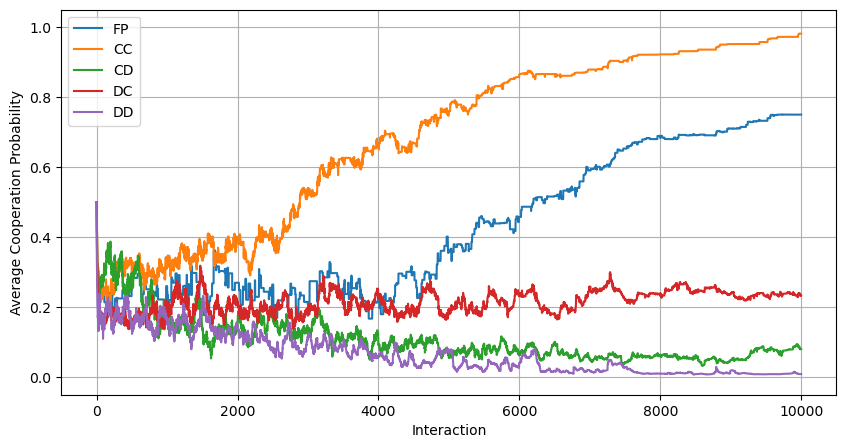

In [13]:
# Create a plot of the results
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.plot(results[0,:],label="FP")  # Plot the results time series
plt.plot(results[1,:],label="CC")  # Plot the results time series
plt.plot(results[2,:],label="CD")  # Plot the results time series
plt.plot(results[3,:],label="DC")  # Plot the results time series
plt.plot(results[4,:],label="DD")  # Plot the results time series
# plt.plot(results,label="Overall",color="black")  # Plot the results time series
plt.xlabel('Interaction')  # Label the x-axis as 'Interaction'
plt.ylabel('Average Cooperation Probability')  # Label the y-axis as 'Average Policy'
plt.grid(True)  # Enable grid for better visibility
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()  # Display the plot